In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss, coint
import statsmodels.api as sm
import requests
import os
import matplotlib.pyplot as plt

In [2]:
def get_top_cryptos(num = 100):
  url = f"https://api.coinmarketcap.com/data-api/v3/cryptocurrency/listing?start=1&limit={num}&sortBy=rank&sortType=desc"
  response = requests.get(url)
  data = response.json()
  symbols = [crypto['symbol'] + "-USD" for crypto in data['data']['cryptoCurrencyList']]
  return symbols


# Part 1 (دریافت دیتا و بررسی مانایی)

In [3]:
start_date = '2023-12-01'
end_date = '2024-12-01'

In [4]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result[1]  # p-value

# Function to perform KPSS test
def kpss_test(series):
    result = kpss(series, regression='c')
    return result[1]  # p-value

# List of top 100 cryptocurrencies by ticker symbols (example list)
cryptos = get_top_cryptos(100)

# Dictionary to store results
stationary_cryptos_adf = []
stationary_cryptos_kpss = []

# Fetch data and perform stationarity tests
for crypto in cryptos:
    try:
        # Fetch historical data
        data = yf.download(crypto, start = start_date, end = end_date, interval='1d')
        close_prices = data['Close'].dropna()

        # Perform ADF test
        adf_pvalue = adf_test(close_prices)
        if adf_pvalue < 0.05:
            stationary_cryptos_adf.append((crypto, adf_pvalue))

        # Perform KPSS test
        kpss_pvalue = kpss_test(close_prices)
        if kpss_pvalue > 0.05:
            stationary_cryptos_kpss.append((crypto, kpss_pvalue))

    except Exception as e:
        print(f"Error fetching data for {crypto}: {e}")


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller 

Error fetching data for PEPE-USD: zero-size array to reduction operation maximum which has no identity


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater 

Error fetching data for POL-USD: zero-size array to reduction operation maximum which has no identity



<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RENDER-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')
[*********************100%***********************]  1 of 1 completed


Error fetching data for RENDER-USD: zero-size array to reduction operation maximum which has no identity


<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TAO-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')
[*********************100%***********************]  1 of 1 completed

Error fetching data for TAO-USD: zero-size array to reduction operation maximum which has no identity



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller

Error fetching data for IMX-USD: zero-size array to reduction operation maximum which has no identity


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOVE-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')
[*********************100%***********************]  1 of 1 completed

Error fetching data for MOVE-USD: zero-size array to reduction operation maximum which has no identity



<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GRT-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')


Error fetching data for GRT-USD: zero-size array to reduction operation maximum which has no identity


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PENGU-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')


Error fetching data for PENGU-USD: zero-size array to reduction operation maximum which has no identity


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[

Error fetching data for BRETT-USD: zero-size array to reduction operation maximum which has no identity


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KAIA-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')


Error fetching data for KAIA-USD: zero-size array to reduction operation maximum which has no identity


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed
[

In [5]:
print(100 * "=")

print("Stationary Cryptos (ADF Test):")
print(30 * "-")
for crypto, pvalue in stationary_cryptos_adf:
    print(f"\n{crypto}: p-value = {pvalue}\n")
    print(30 * "-")

print(100 * "=")

print("Stationary Cryptos (Statistic Test):")
print(30 * "-")

for crypto, pvalue in stationary_cryptos_kpss:
    print(f"\n{crypto}: p-value = {pvalue}\n")
    print(30 * "-")

print(100 * "=")

Stationary Cryptos (ADF Test):
------------------------------

USDT-USD: p-value = 4.182493700190845e-07

------------------------------

USDC-USD: p-value = 4.463544931071262e-06

------------------------------

DAI-USD: p-value = 0.025146064505060645

------------------------------

ARB-USD: p-value = 0.028153719629091942

------------------------------

TIA-USD: p-value = 2.2600445329723208e-30

------------------------------

FDUSD-USD: p-value = 7.697228486457376e-08

------------------------------

BEAM-USD: p-value = 2.6629969392143565e-05

------------------------------
Stationary Cryptos (Statistic Test):
------------------------------

USDT-USD: p-value = 0.1

------------------------------

XRP-USD: p-value = 0.0636677219416962

------------------------------

XLM-USD: p-value = 0.1

------------------------------

LTC-USD: p-value = 0.06156214473780057

------------------------------

USDe-USD: p-value = 0.1

------------------------------

CRO-USD: p-value = 0.1

---------

# Part 2 (محاسبه توان هِرست و نیمه عمر)

In [6]:
def fetch_crypto_data(cryptos, start_date, end_date):
    crypto_data = pd.DataFrame()
    for crypto in cryptos:
        try:
            data = yf.download(crypto, start=start_date, end=end_date, interval='1d')
            if not data.empty:
                crypto_data[crypto] = data['Close']
        except Exception as e:
            print(f"Error fetching data for {crypto}: {e}")
    return crypto_data

In [7]:
def hurst_exponent(ts):
    N = len(ts)
    T = np.arange(1, N+1)
    Y = np.cumsum(ts - np.mean(ts))
    R = np.max(Y) - np.min(Y)
    S = np.std(ts)
    RS = R / S
    H = np.log(RS) / np.log(N)
    return H

In [8]:
def half_life(ts):
    ts_lagged = np.roll(ts, 1)
    ts_lagged[0] = ts_lagged[1]  # Adjust the first element
    delta_ts = ts - ts_lagged
    ts_lagged = sm.add_constant(ts_lagged)

    model = sm.OLS(delta_ts[1:], ts_lagged[1:])
    res = model.fit()
    lambda_ = res.params[1]

    half_life = -np.log(2) / lambda_
    return half_life

In [9]:
crypto_data = fetch_crypto_data(cryptos, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Error fetching data for RUNE-USD: Cannot set a DataFrame with multiple columns to the single column RUNE-USD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRETT-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-12-01 -> 2024-12-01)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KAIA-USD']: YFPrice

In [10]:
stationary_cryptos = []

for crypto in crypto_data.columns:
    series = crypto_data[crypto].dropna()
    if len(series) > 0:
        adf_pvalue = adf_test(series)
        kpss_pvalue = kpss_test(series)

        if adf_pvalue < 0.05 and kpss_pvalue > 0.05:
            stationary_cryptos.append(crypto)

# Calculate Hurst Exponent for stationary cryptocurrencies and sort
hurst_exponents = []

for crypto in stationary_cryptos:
    series = crypto_data[crypto].dropna()
    hurst_value = hurst_exponent(series)
    hurst_exponents.append((crypto, hurst_value))

# Sort cryptocurrencies by Hurst Exponent in ascending order
hurst_exponents_sorted = sorted(hurst_exponents, key=lambda x: x[1])


<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-4-065e3c184ac4>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-4-065e3c184ac4>:8: In

In [11]:
# Display the sorted cryptocurrencies by Hurst Exponent
for crypto, hurst_value in hurst_exponents_sorted:
    print(f"{crypto}: Hurst Exponent = {hurst_value}")

TIA-USD: Hurst Exponent = 0.5062527874848501
ARB-USD: Hurst Exponent = 0.6503314493291842
USDT-USD: Hurst Exponent = 0.7298264799183156


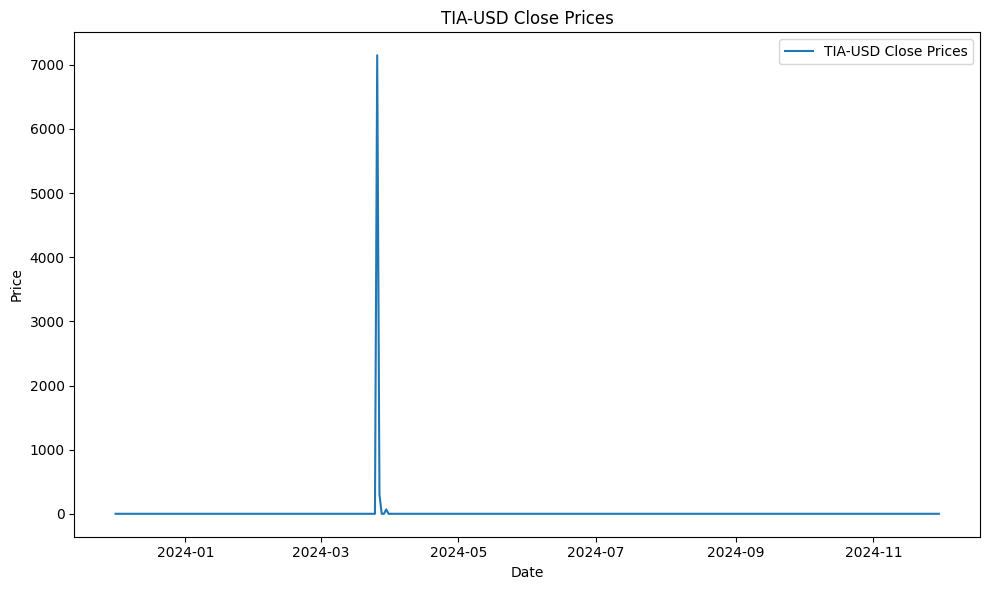

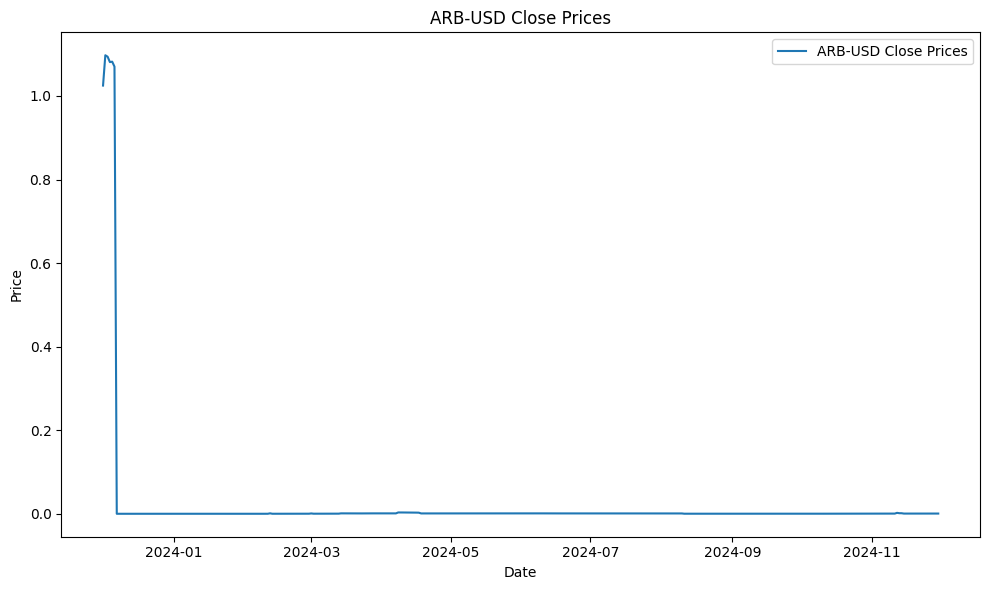

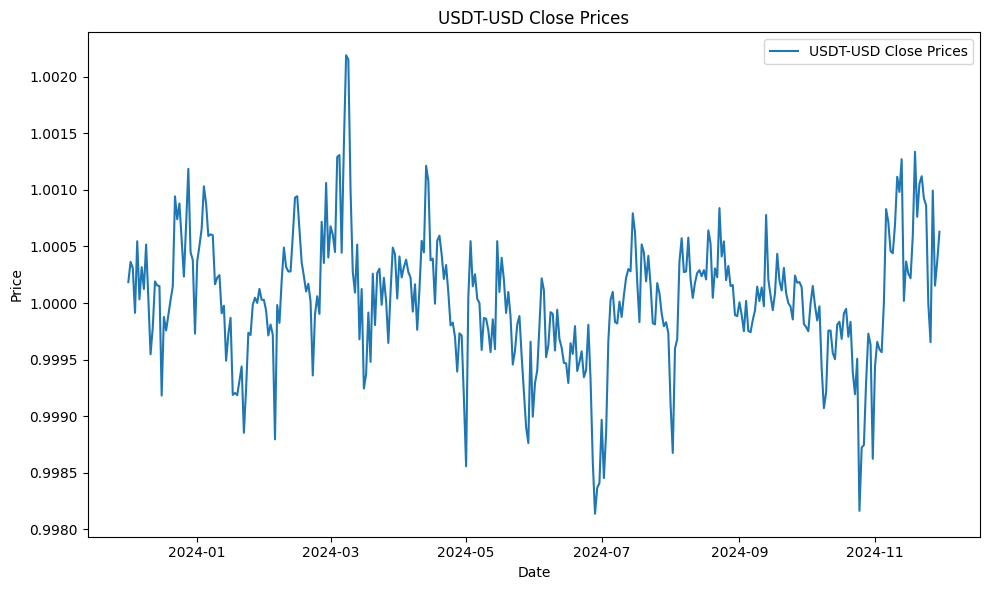

In [12]:
def plot_time_series(crypto, series):
    plt.figure(figsize=(10, 6))
    plt.plot(series, label=f'{crypto} Close Prices')
    plt.title(f'{crypto} Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot time series for stationary cryptocurrencies
for crypto, _ in hurst_exponents_sorted:
    series = crypto_data[crypto].dropna()
    plot_time_series(crypto, series)

# Part 3 (ترکیب سریهای قیمتی نامانا)

In [13]:
# Find cointegrated pairs using CADF test
def find_cointegrated_pairs(crypto_data, non_stationary_cryptos):
    cointegrated_pairs = []
    for i in range(len(non_stationary_cryptos)):
        for j in range(i+1, len(non_stationary_cryptos)):
            crypto_1 = non_stationary_cryptos[i]
            crypto_2 = non_stationary_cryptos[j]
            series_1 = crypto_data[crypto_1].dropna()
            series_2 = crypto_data[crypto_2].dropna()

            if len(series_1) != len(series_2):
              continue

            # Perform cointegration test
            score, p_value, _ = coint(series_1, series_2)

            # If p-value is less than 0.05, the pair is cointegrated
            if p_value < 0.05:
                cointegrated_pairs.append((crypto_1, crypto_2, p_value))

    return cointegrated_pairs

# Apply to your dataset
non_stationary_cryptos = [crypto for crypto in crypto_data.columns if crypto not in stationary_cryptos]
cointegrated_pairs = find_cointegrated_pairs(crypto_data, non_stationary_cryptos)

# Show cointegrated pairs
for pair in cointegrated_pairs:
    print(f"Cointegrated pair: {pair[0]} and {pair[1]} with p-value: {pair[2]}")


Cointegrated pair: BTC-USD and SOL-USD with p-value: 0.011188517371246584
Cointegrated pair: BTC-USD and LEO-USD with p-value: 0.008726339078319172
Cointegrated pair: BNB-USD and BEAM-USD with p-value: 0.018737143802043114
Cointegrated pair: BNB-USD and JUP-USD with p-value: 0.005570055899300808
Cointegrated pair: SOL-USD and LEO-USD with p-value: 0.001404598511517876
Cointegrated pair: SOL-USD and BGB-USD with p-value: 0.04331549447924906
Cointegrated pair: SOL-USD and OM-USD with p-value: 0.033875490968771106
Cointegrated pair: SOL-USD and BONK-USD with p-value: 0.0066040316066378855
Cointegrated pair: USDC-USD and ADA-USD with p-value: 2.835367747046896e-05
Cointegrated pair: USDC-USD and TRX-USD with p-value: 8.430483788506523e-08
Cointegrated pair: USDC-USD and AVAX-USD with p-value: 1.3585740498747062e-05
Cointegrated pair: USDC-USD and LINK-USD with p-value: 2.7051924412994888e-05
Cointegrated pair: USDC-USD and TON-USD with p-value: 7.101220036017175e-06
Cointegrated pair: USDC

In [14]:

def compute_ols_coefficients(series_1, series_2):
    X = sm.add_constant(series_1)  # Add constant for the intercept term
    model = sm.OLS(series_2, X).fit()  # Perform OLS regression
    return model.params  # Return the coefficients

# Calculate coefficients for cointegrated pairs
def calculate_cointegrated_series(crypto_data, cointegrated_pairs):
    combined_series = []

    for pair in cointegrated_pairs:
        crypto_1, crypto_2, _ = pair
        series_1 = crypto_data[crypto_1].dropna()
        series_2 = crypto_data[crypto_2].dropna()

        # Get OLS coefficients
        ols_coeffs = compute_ols_coefficients(series_1, series_2)

        # Create the combined stationary series
        combined_series_pair = ols_coeffs[0] + ols_coeffs[1] * series_1
        combined_series.append((crypto_1, crypto_2, ols_coeffs, combined_series_pair))

    return combined_series

combined_series = calculate_cointegrated_series(crypto_data, cointegrated_pairs)

# Display results
for crypto_1, crypto_2, coeffs, combined in combined_series:
    print(f"Pair: {crypto_1} and {crypto_2}")
    print(f"Coefficients: {coeffs}")


<ipython-input-14-5c9054b7d0b9>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined_series_pair = ols_coeffs[0] + ols_coeffs[1] * series_1
<ipython-input-14-5c9054b7d0b9>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined_series_pair = ols_coeffs[0] + ols_coeffs[1] * series_1
<ipython-input-14-5c9054b7d0b9>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined_series_pair = ols_coeffs[0] + ols_coeffs[1] * series_

Pair: BTC-USD and SOL-USD
Coefficients: const     -36.212229
BTC-USD     0.002951
dtype: float64
Pair: BTC-USD and LEO-USD
Coefficients: const      0.652716
BTC-USD    0.000079
dtype: float64
Pair: BNB-USD and BEAM-USD
Coefficients: const      0.167497
BNB-USD   -0.000194
dtype: float64
Pair: BNB-USD and JUP-USD
Coefficients: const      0.007051
BNB-USD   -0.000010
dtype: float64
Pair: SOL-USD and LEO-USD
Coefficients: const      1.909308
SOL-USD    0.024948
dtype: float64
Pair: SOL-USD and BGB-USD
Coefficients: const      0.195445
SOL-USD    0.005541
dtype: float64
Pair: SOL-USD and OM-USD
Coefficients: const     -1.382632
SOL-USD    0.015432
dtype: float64
Pair: SOL-USD and BONK-USD
Coefficients: const     -4.428119e-06
SOL-USD    1.836420e-07
dtype: float64
Pair: USDC-USD and ADA-USD
Coefficients: const      -91.723603
USDC-USD    92.212111
dtype: float64
Pair: USDC-USD and TRX-USD
Coefficients: const       68.993132
USDC-USD   -68.859053
dtype: float64
Pair: USDC-USD and AVAX-USD
C

In [18]:
# Calculate Hurst Exponent for combined series
def calculate_hurst_for_combined(combined_series):
    hurst_values = []
    for crypto_1, crypto_2, coeffs, combined in combined_series:
        hurst_value = hurst_exponent(combined)
        hurst_values.append((crypto_1, crypto_2, hurst_value))

    return sorted(hurst_values, key=lambda x: x[2])

# Get the sorted pairs by Hurst Exponent
sorted_hurst_pairs = calculate_hurst_for_combined(combined_series)


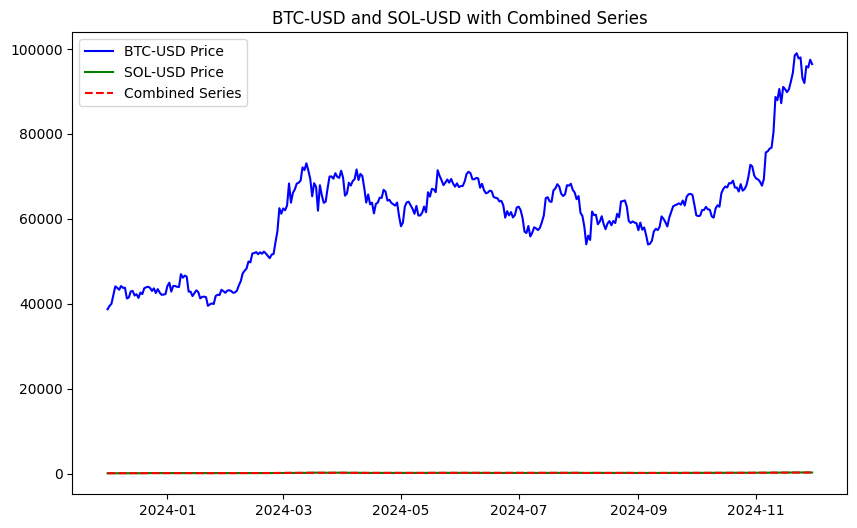

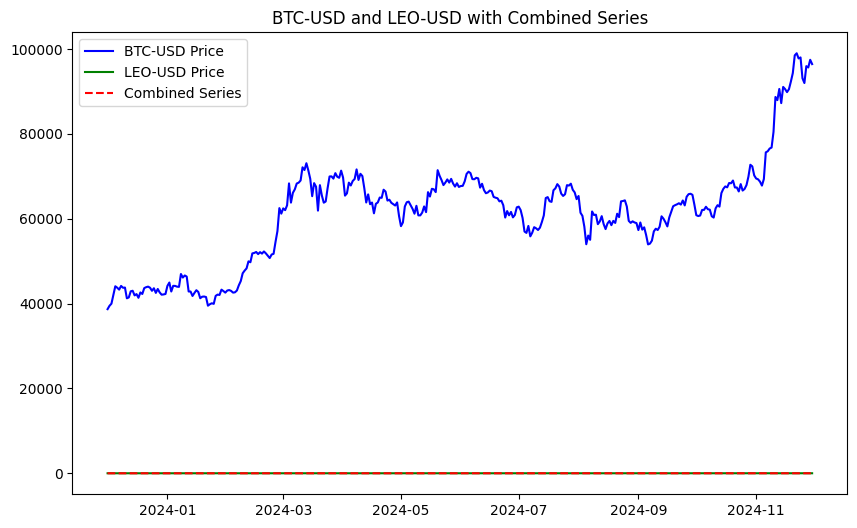

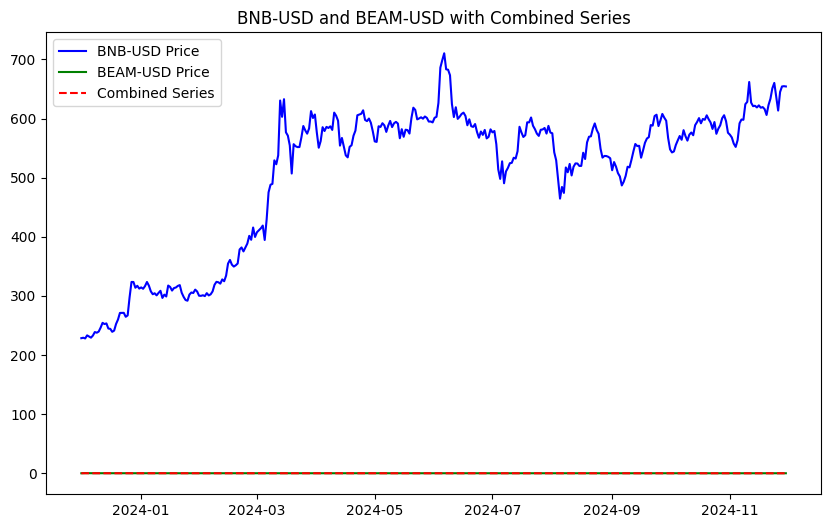

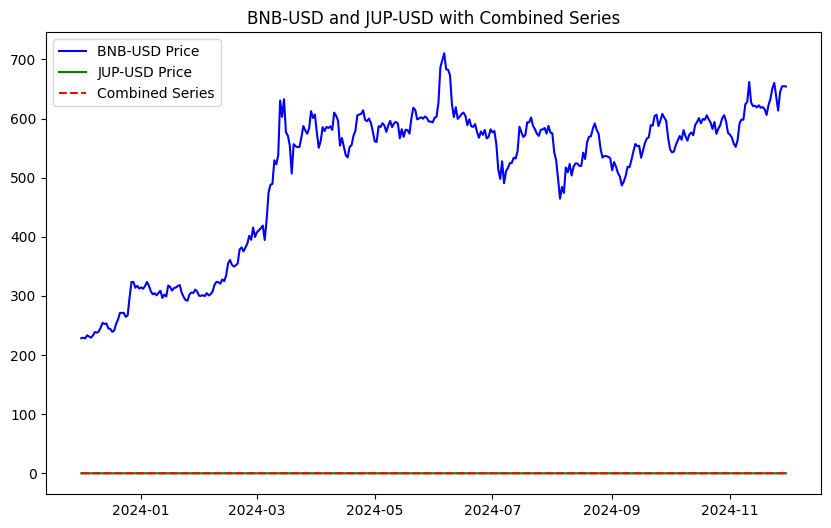

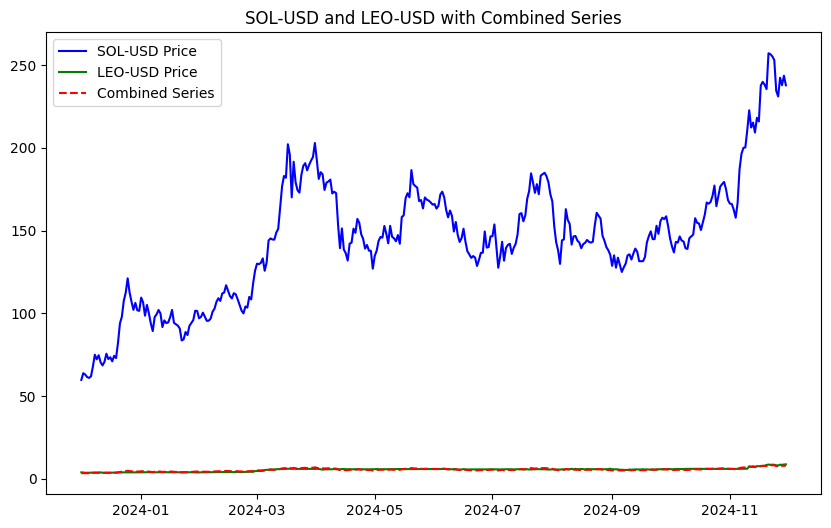

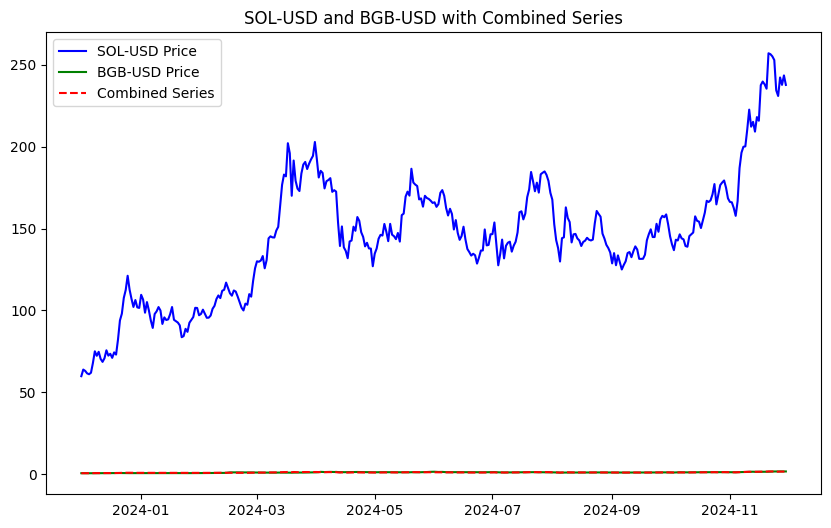

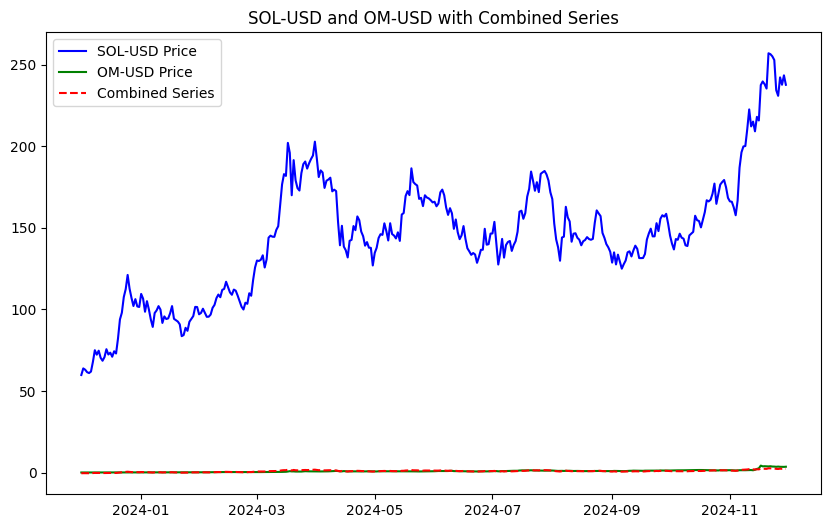

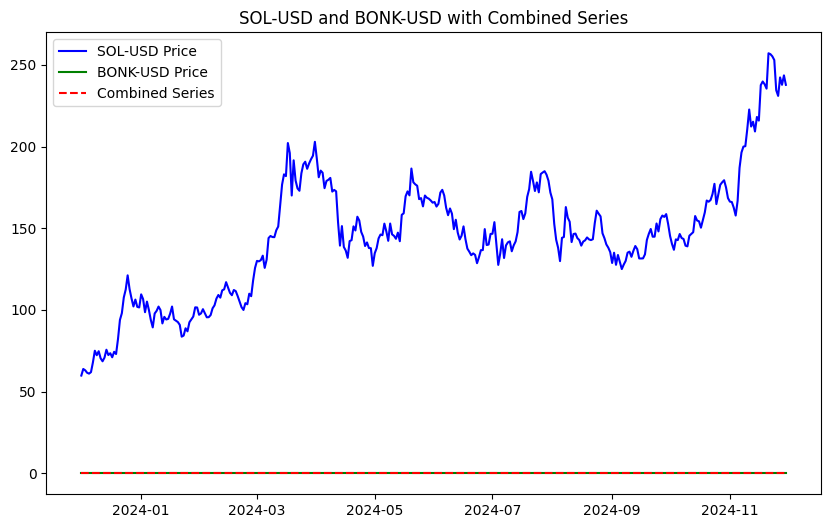

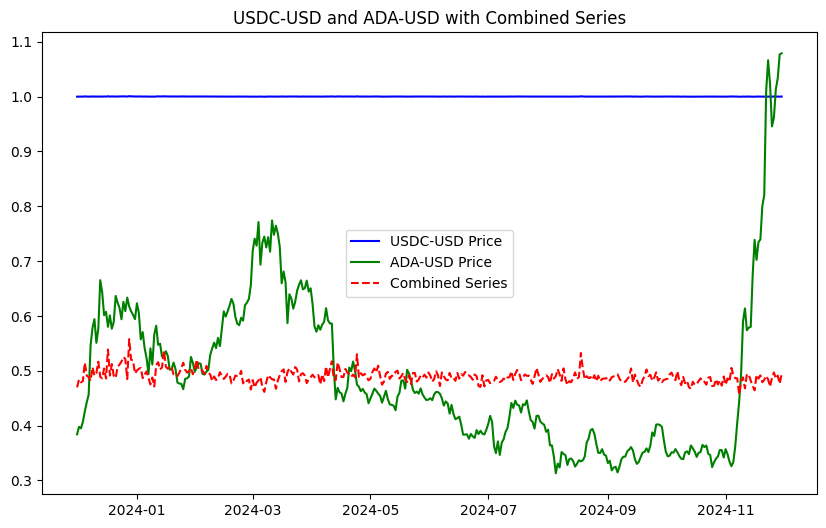

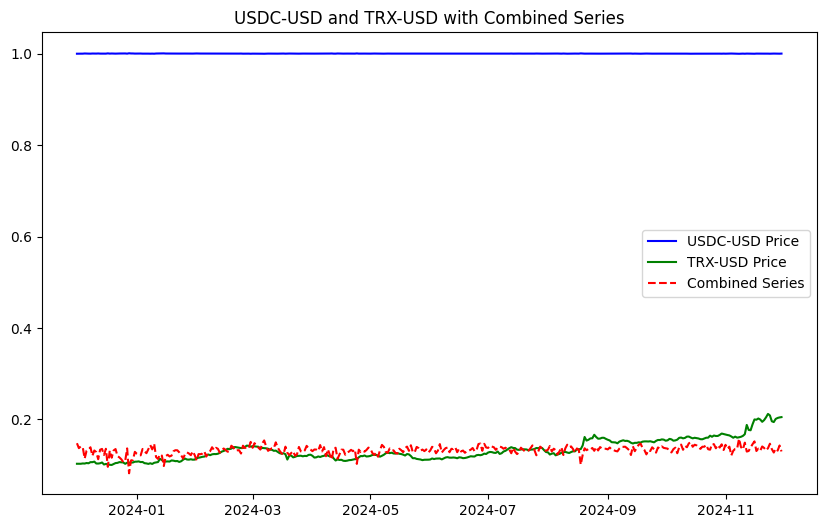

In [24]:
import matplotlib.pyplot as plt

def plot_pairs_and_combined(combined_series):
    for crypto_1, crypto_2, coeffs, combined in combined_series[:10]:
        series_1 = crypto_data[crypto_1].dropna()
        series_2 = crypto_data[crypto_2].dropna()

        plt.figure(figsize=(10, 6))
        plt.plot(series_1, label=f'{crypto_1} Price', color='blue')
        plt.plot(series_2, label=f'{crypto_2} Price', color='green')
        plt.plot(combined, label='Combined Series', color='red', linestyle='dashed')
        plt.title(f'{crypto_1} and {crypto_2} with Combined Series')
        plt.legend(loc='best')
        plt.show()

# Plot top 10 pairs by Hurst Exponent (lowest first)
# for crypto_1, crypto_2, _ in sorted_hurst_pairs[:10]:
plot_pairs_and_combined(combined_series)


# Part 4 (استراتژی معاملاتی)

In [39]:
# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(series, look_back):
    span = look_back if look_back >= 1 else 1
    return series.ewm(span=span, adjust=False).mean()

# Function to calculate Standard Deviation (SD)
def calculate_sd(series, look_back):
    return series.rolling(window=look_back).std()

# Function to calculate the look-back period based on half-life
def get_look_back(half_life):
    look_back = int(np.ceil(half_life))
    if look_back < 20:
        look_back = int(np.ceil(20 / half_life) * half_life)
    return look_back


In [35]:
def trading_strategy(combined_series, half_life_series):
    all_positions = []  # To track positions for all pairs
    ema_dict = {}       # To store EMA for each combined series
    sd_dict = {}        # To store SD for each combined series

    for crypto_1, crypto_2, coeffs, combined in combined_series:
        half_life_value = half_life_series[(crypto_1, crypto_2)]  # Use half-life for combined series
        look_back = get_look_back(half_life_value)  # Calculate look-back period

        # Calculate EMA and SD for the combined series
        ema = calculate_ema(combined, look_back)
        sd = calculate_sd(combined, look_back)

        ema_dict[(crypto_1, crypto_2)] = ema
        sd_dict[(crypto_1, crypto_2)] = sd

        # Initialize variables for position size
        position = 0  # 1 for Buy, -1 for Sell, 0 for No position
        positions = []  # Track positions for this pair

        # Trading strategy loop
        for i in range(len(combined)):
            price = combined[i]
            ema_value = ema[i]
            sd_value = sd[i]

            # Entry Sell position logic
            if price > ema_value + 2 * sd_value and position == 0:
                position = -0.5  # Sell half position
            elif price > ema_value + 3 * sd_value and position == -0.5:
                position = -1  # Sell another half position

            # Entry Buy position logic
            elif price < ema_value - 2 * sd_value and position == 0:
                position = 0.5  # Buy half position
            elif price < ema_value - 3 * sd_value and position == 0.5:
                position = 1  # Buy another half position

            # Exit Sell position logic
            if position == -1 and price < ema_value + sd_value:
                position = 0  # Close Sell position

            # Exit Buy position logic
            if position == 1 and price > ema_value - sd_value:
                position = 0  # Close Buy position

            positions.append((crypto_1, crypto_2, price, position))  # Track position

        all_positions.extend(positions)
    return all_positions, ema_dict, sd_dict


In [82]:
def plot_trading_strategy(crypto_1, crypto_2, combined, ema, sd, positions):
    plt.figure(figsize=(30, 30))
    plt.plot(combined, label=f'Combined Series ({crypto_1}, {crypto_2})', color='blue')
    plt.plot(ema, label=f'EMA ({crypto_1}, {crypto_2})', color='orange')
    plt.fill_between(range(len(combined)), ema + 2*sd, ema + 3*sd, color='red', alpha=0.3)
    plt.fill_between(range(len(combined)), ema - 2*sd, ema - 3*sd, color='green', alpha=0.3)
    plt.show()

    # Plot positions
    for i, (crypto_1, crypto_2, price, position) in enumerate(positions):
        # plt.figure(figsize=(10, 6))
        if position == -1:  # Sell position
            plt.plot(i, price, 'ro', label='Sell Position')
        elif position == 1:  # Buy position
            plt.plot(i, price, 'go', label='Buy Position')
        plt.show()

    plt.title(f'Trading Strategy for {crypto_1} and {crypto_2}')
    plt.legend(loc='best')




In [45]:
half_life_series = {}
for crypto_1, crypto_2, coeffs, combined in combined_series:
    half_life_value = half_life(combined)
    half_life_series[(crypto_1, crypto_2)] = half_life_value



<ipython-input-8-5a56867d50d0>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda_ = res.params[1]


In [72]:
positions, ema_dict, sd_dict = trading_strategy(combined_series, half_life_series)

<ipython-input-35-24ae0cb148de>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = combined[i]
<ipython-input-35-24ae0cb148de>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ema_value = ema[i]
<ipython-input-35-24ae0cb148de>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd_value = sd[i]


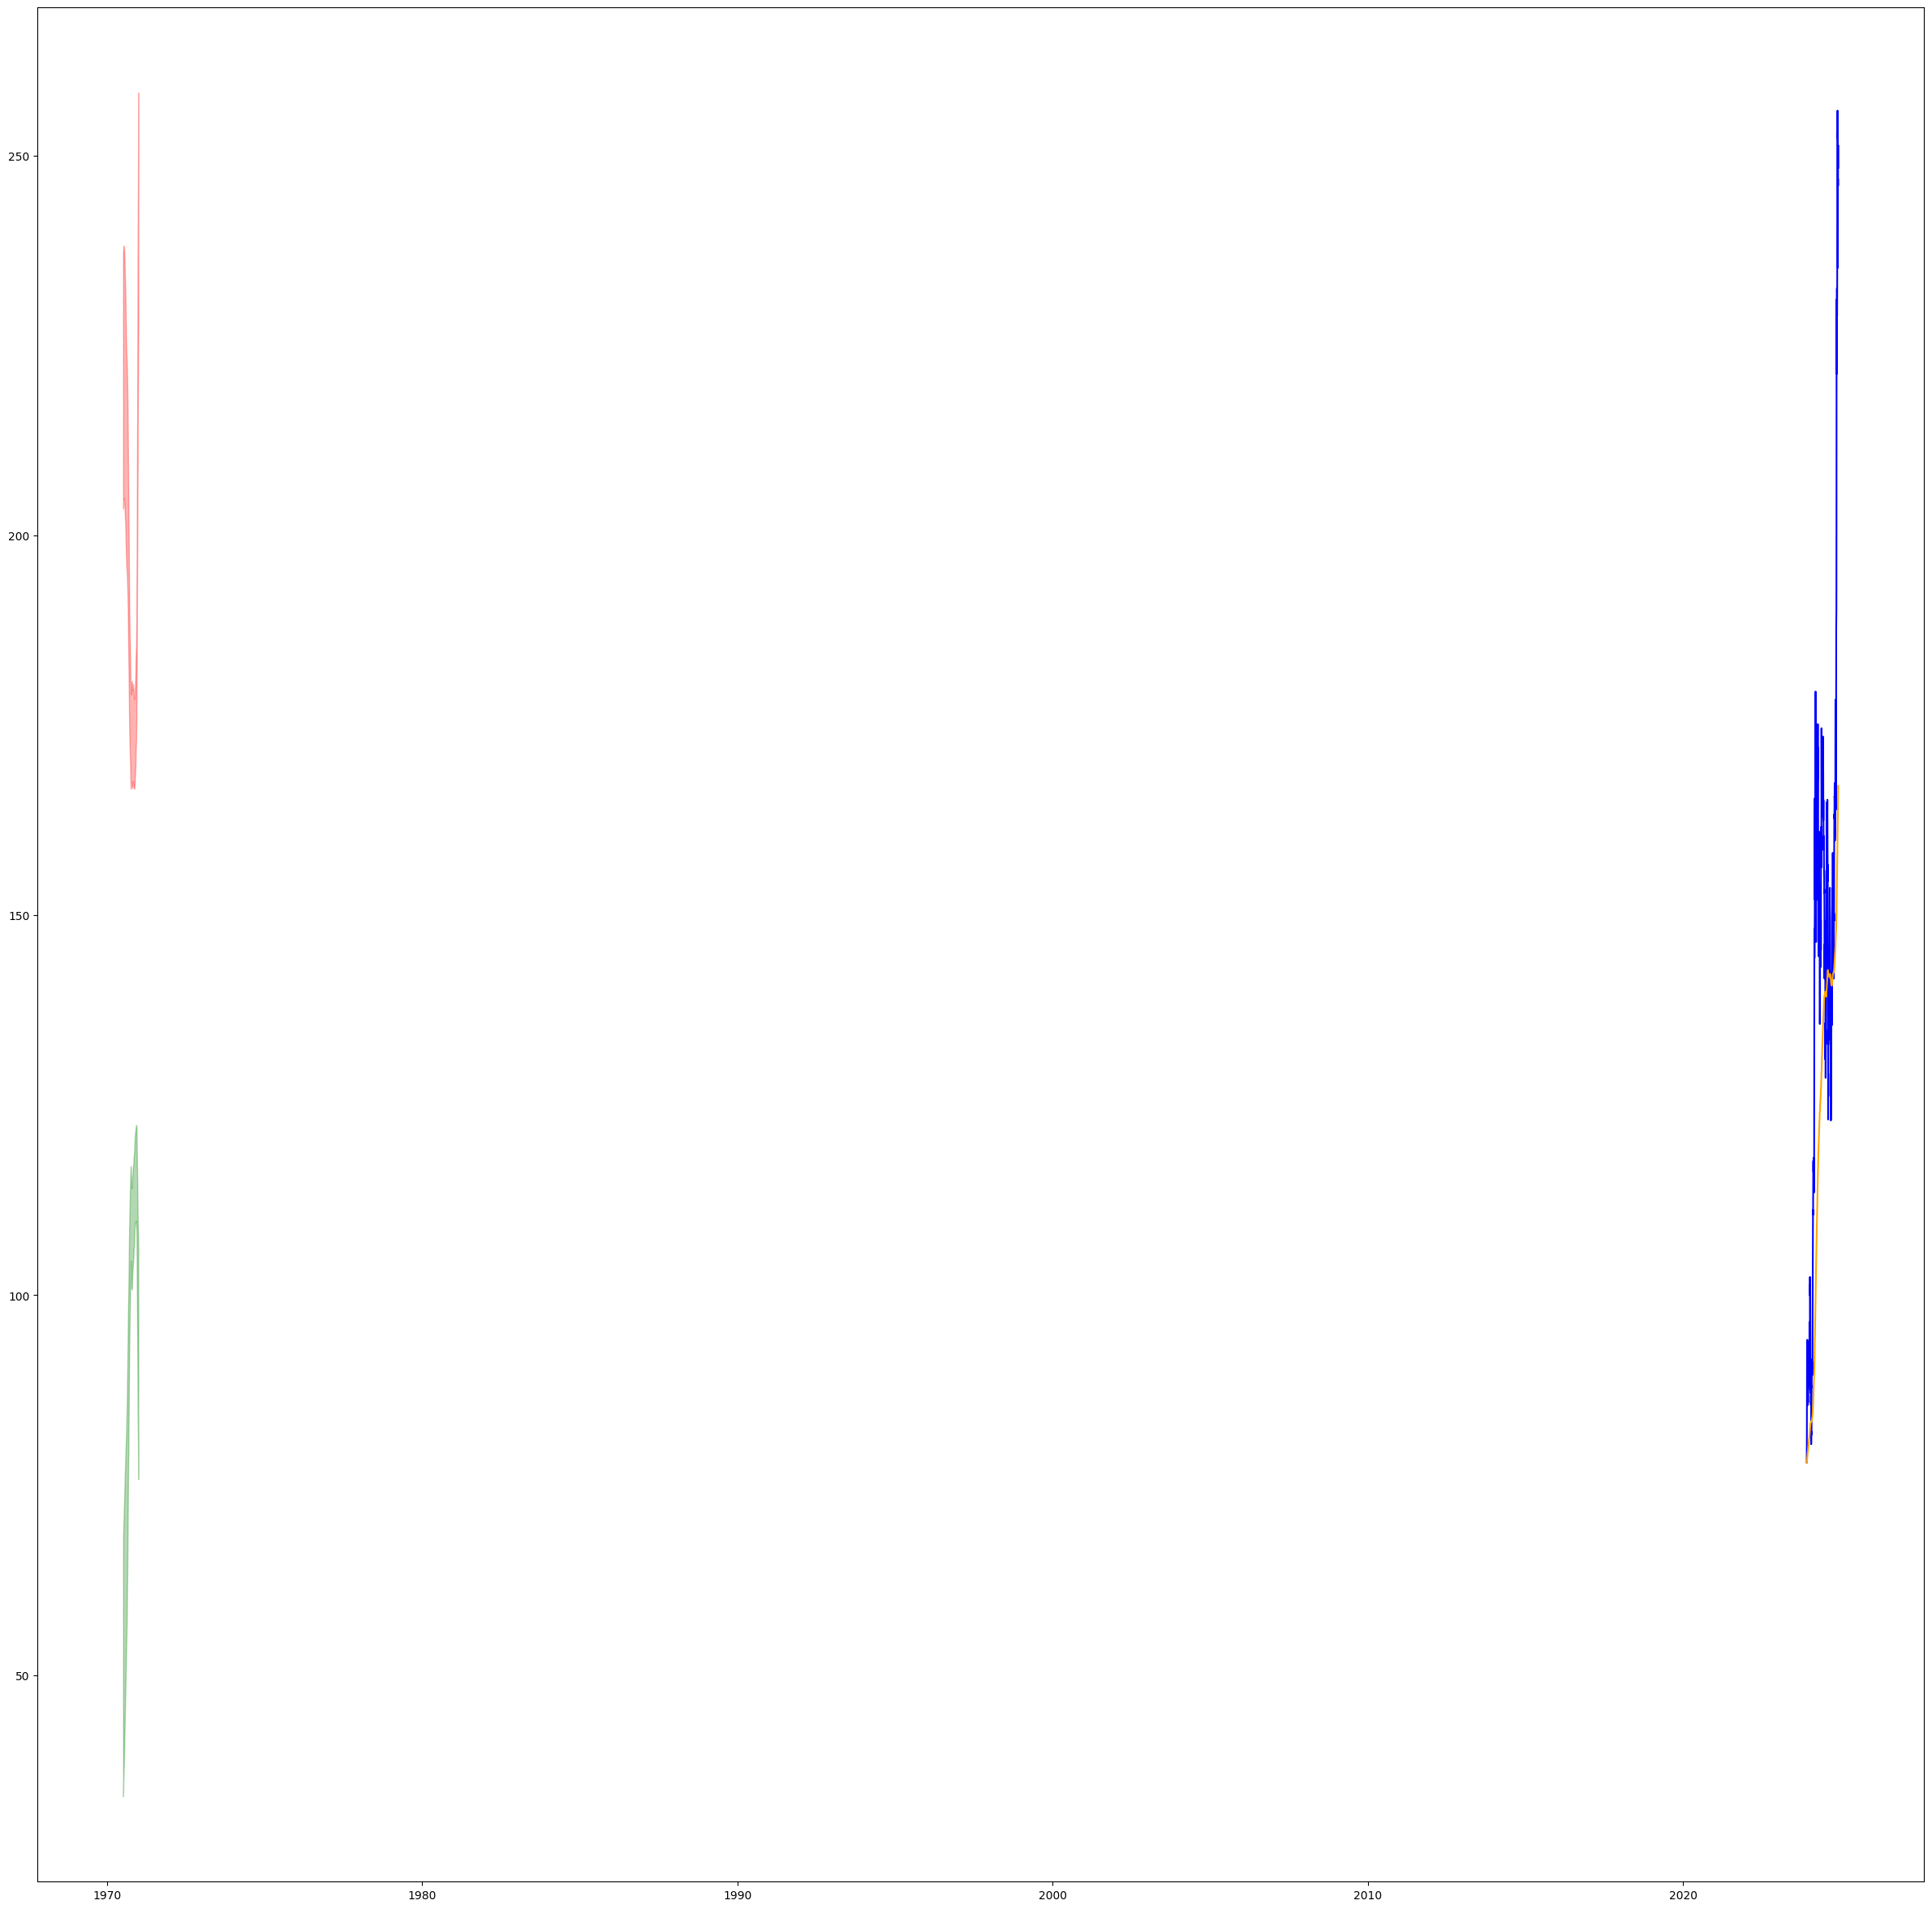

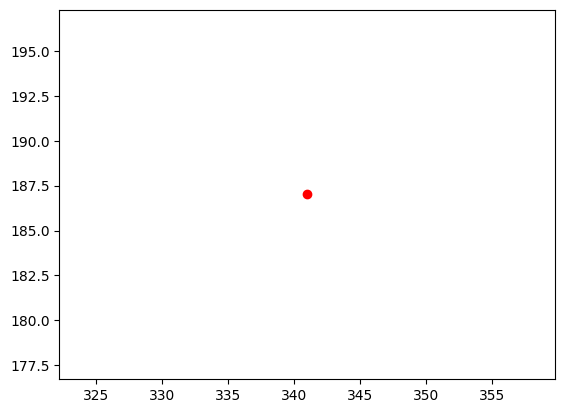

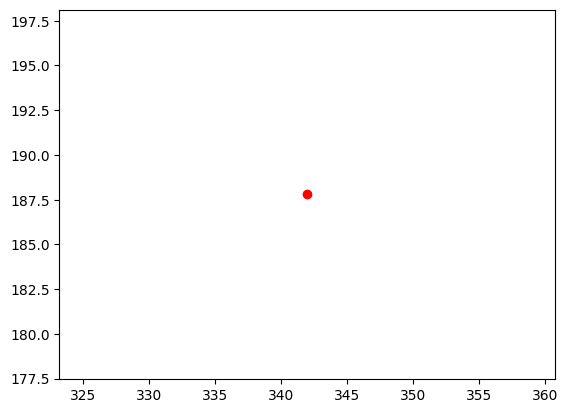

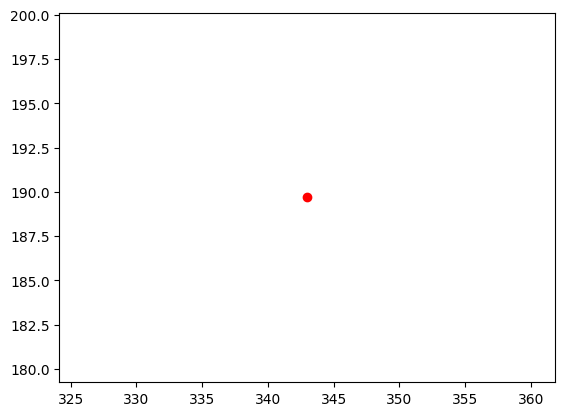

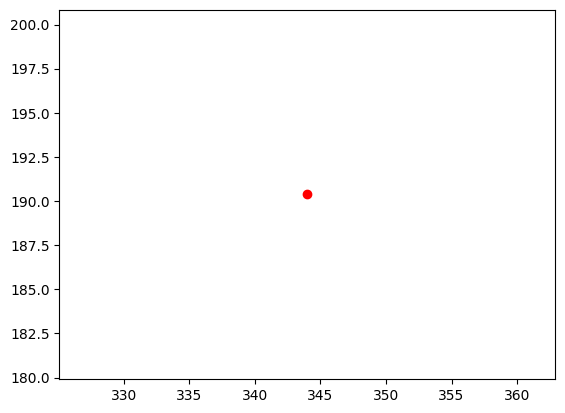

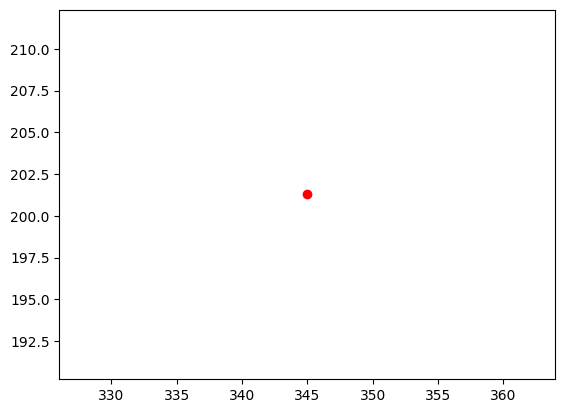

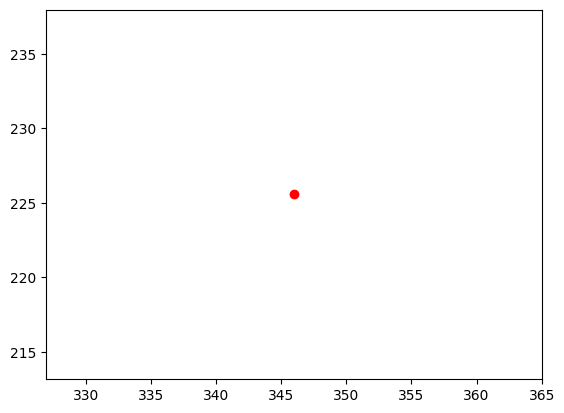

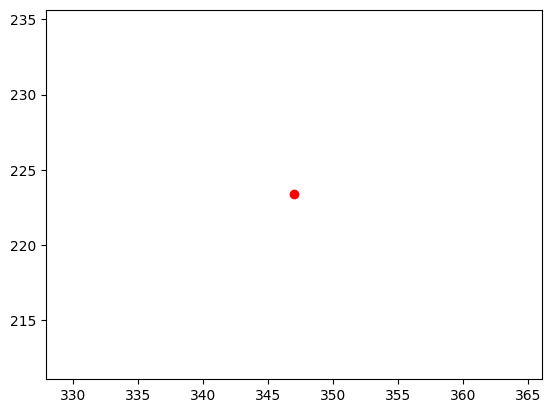

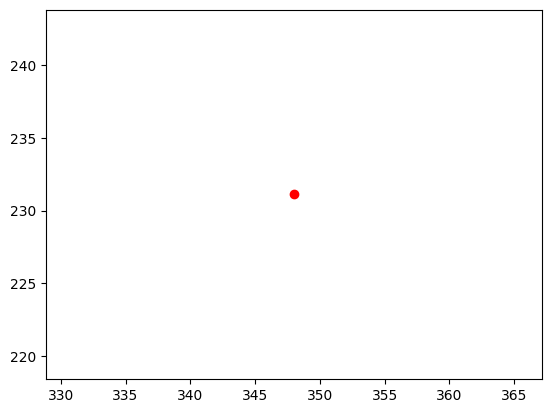

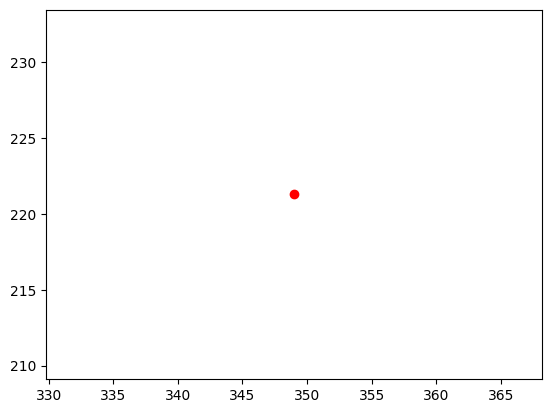

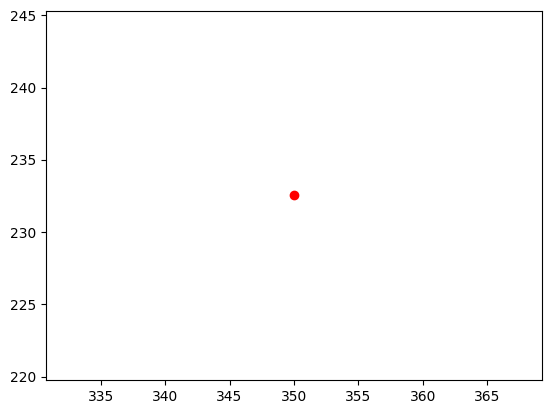

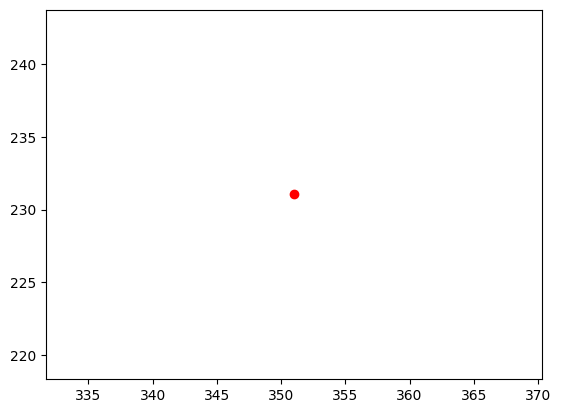

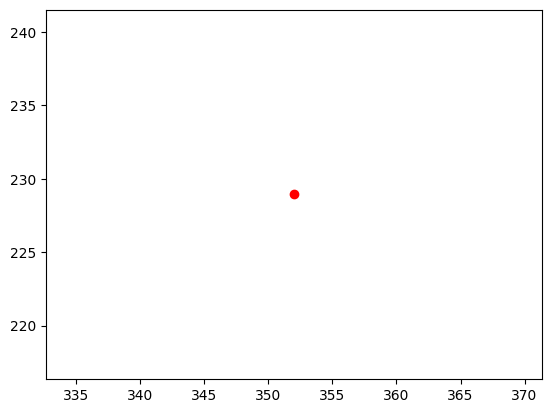

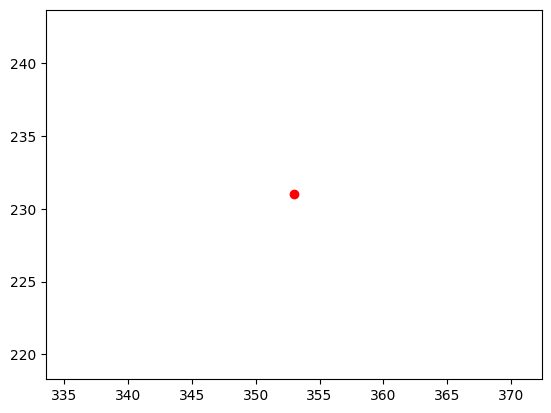

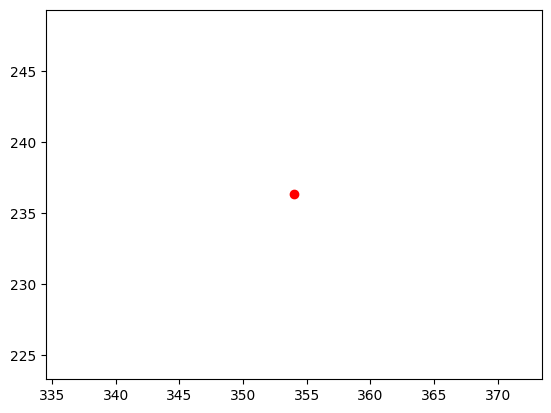

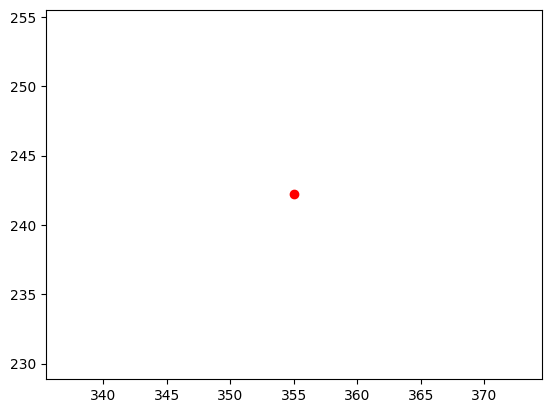

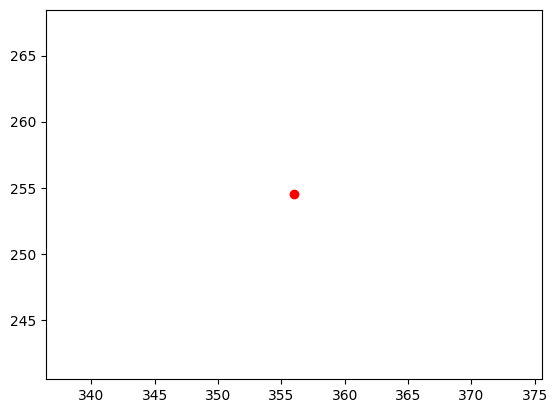

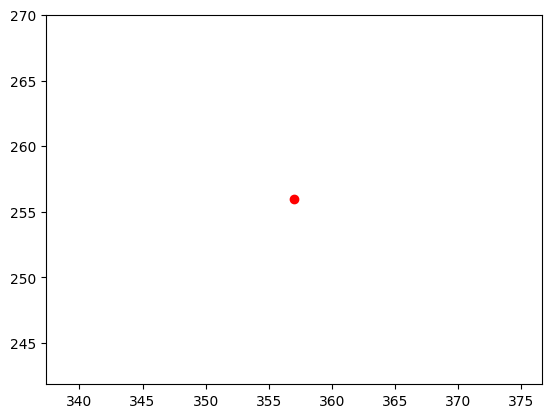

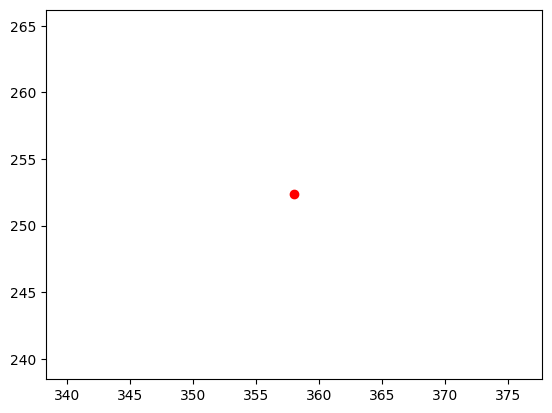

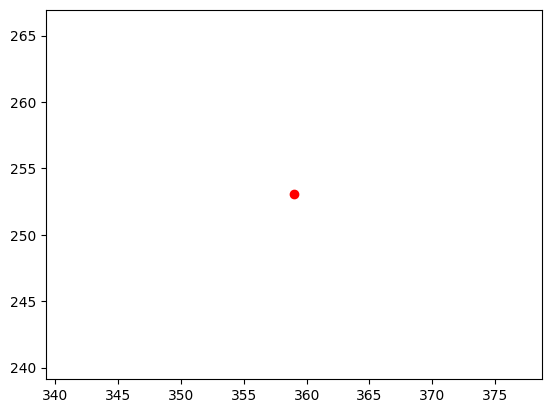

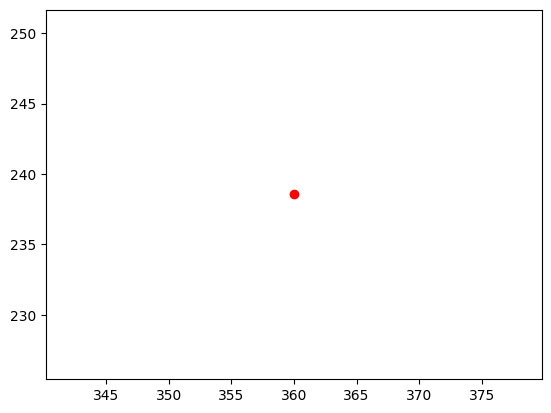

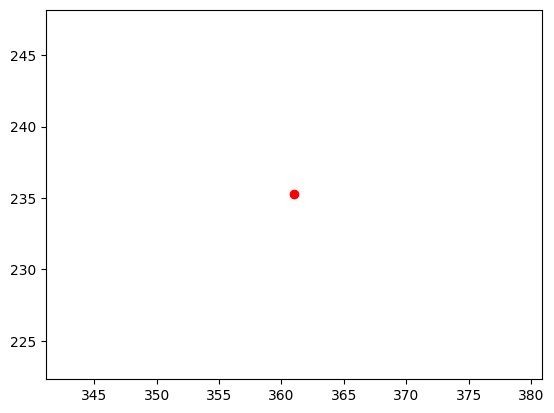

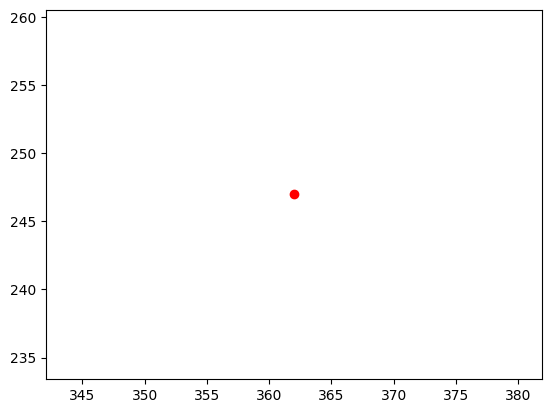

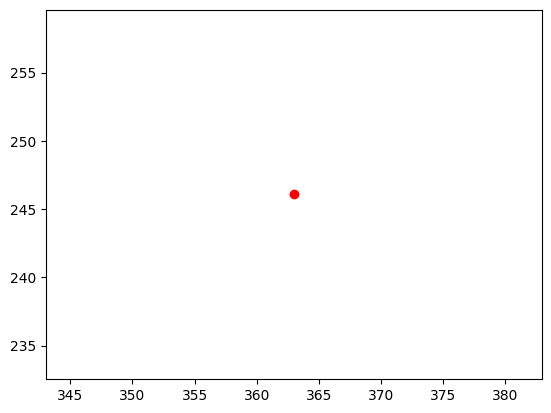

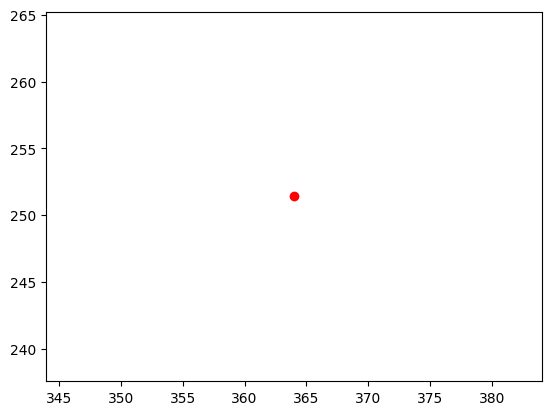

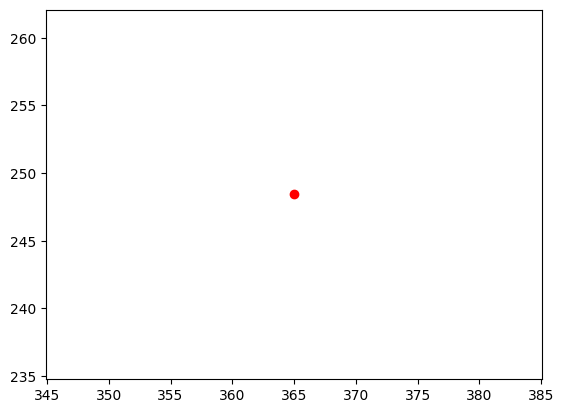

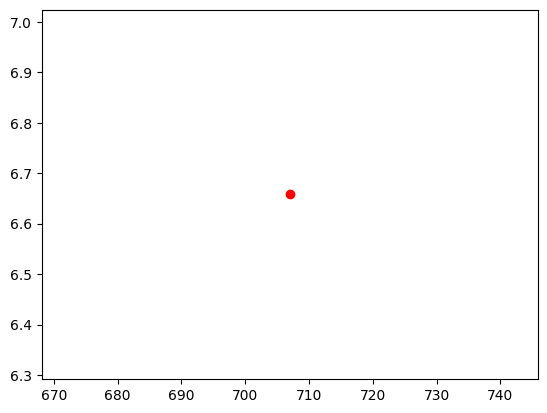

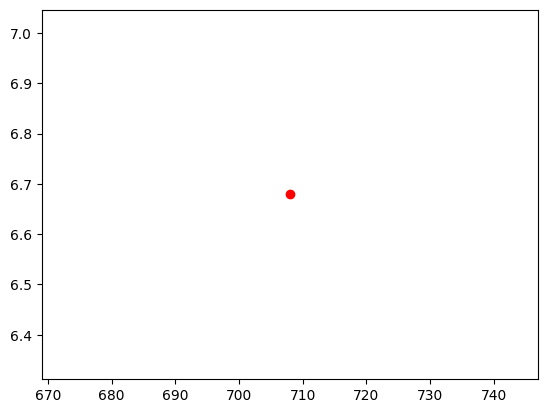

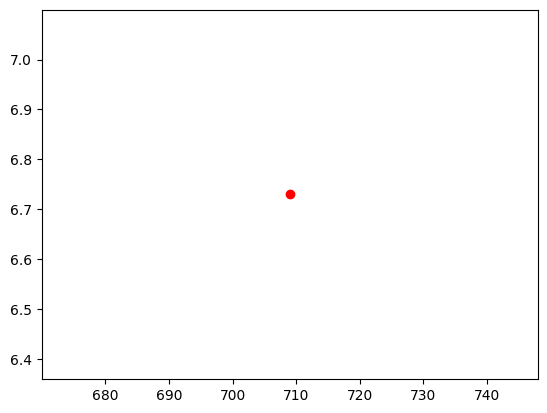

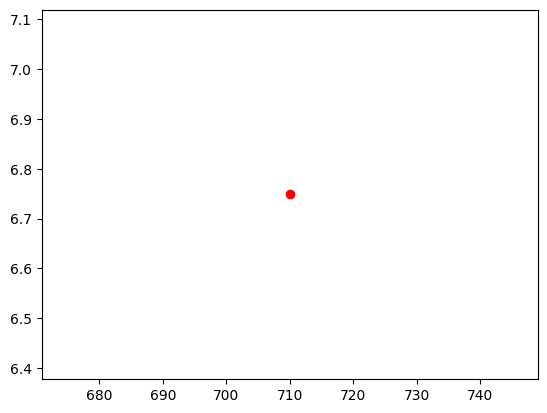

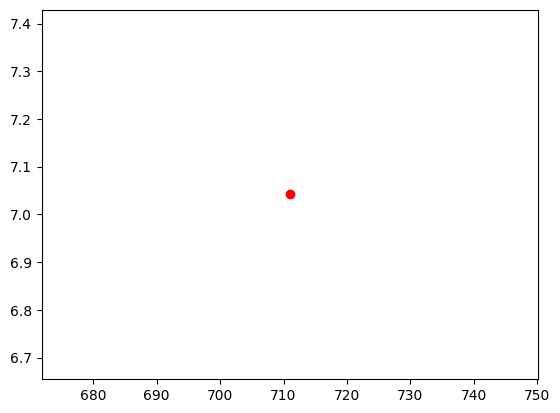

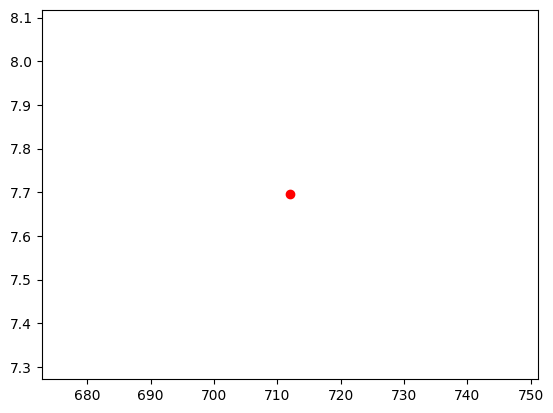

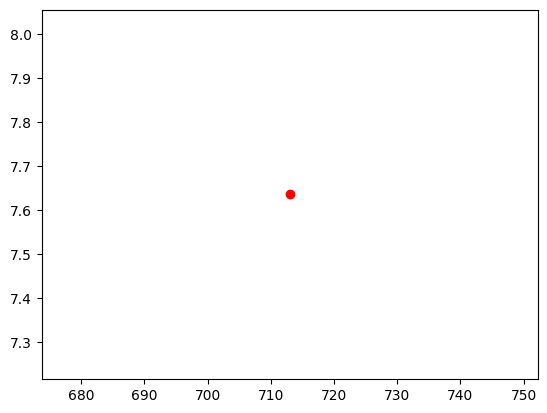

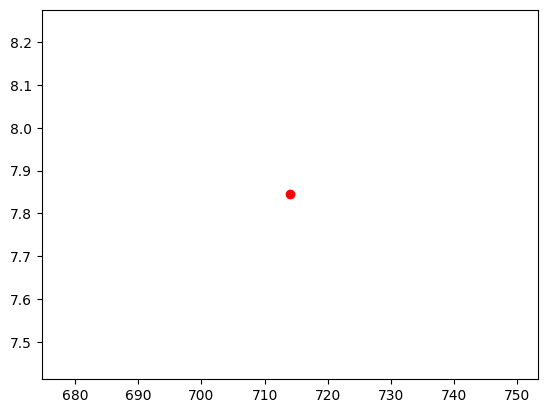

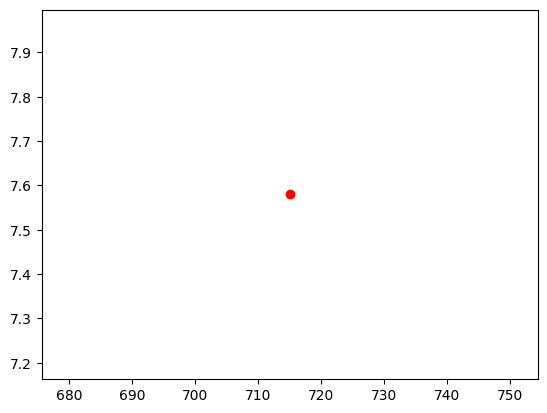

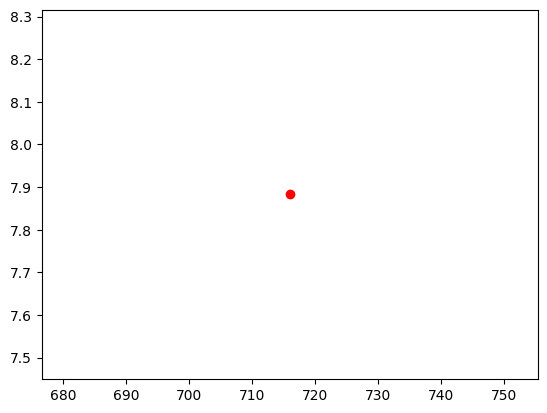

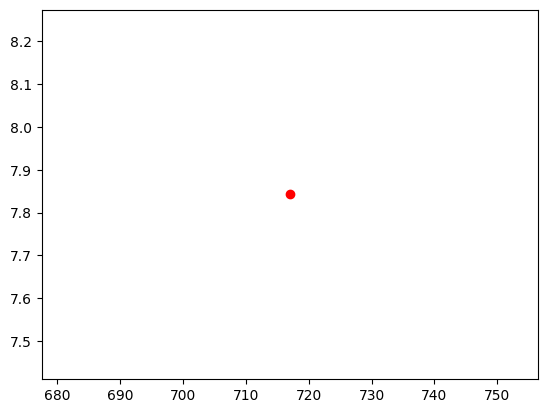

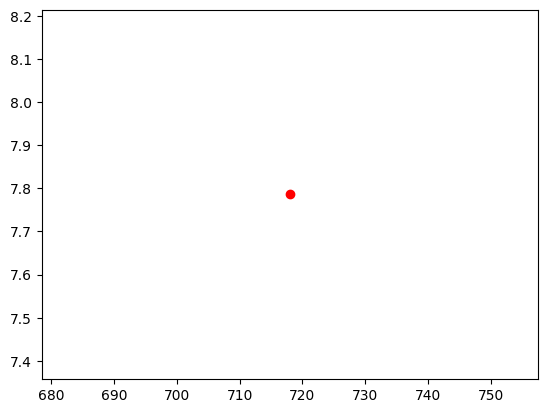

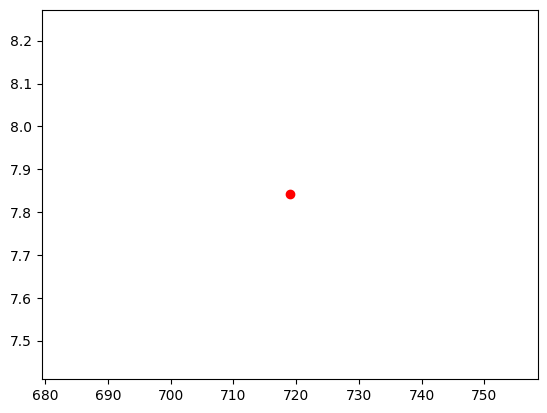

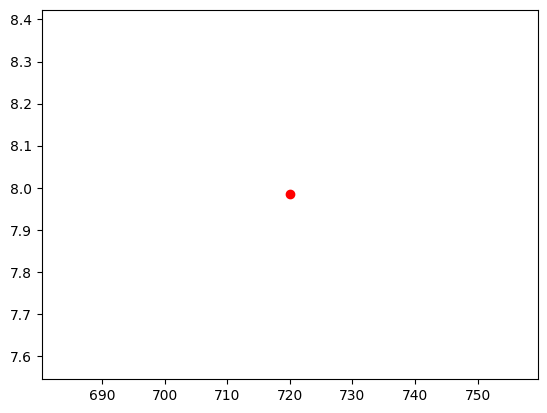

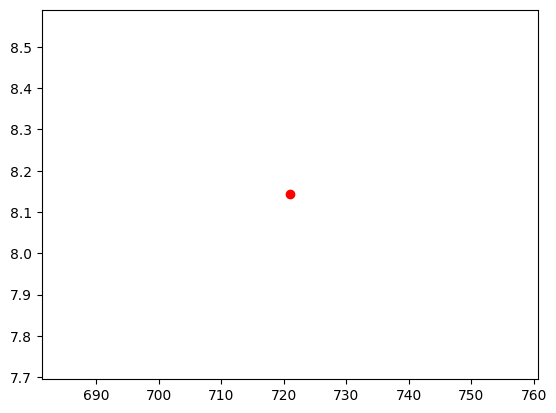

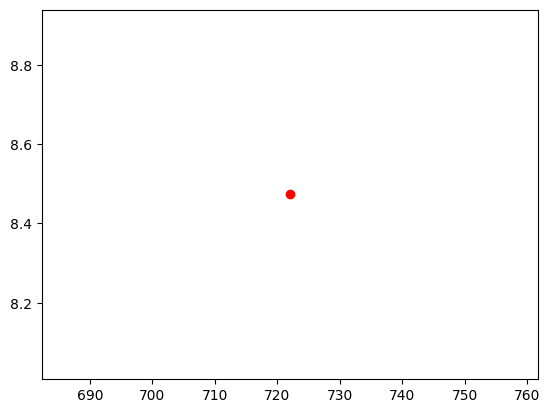

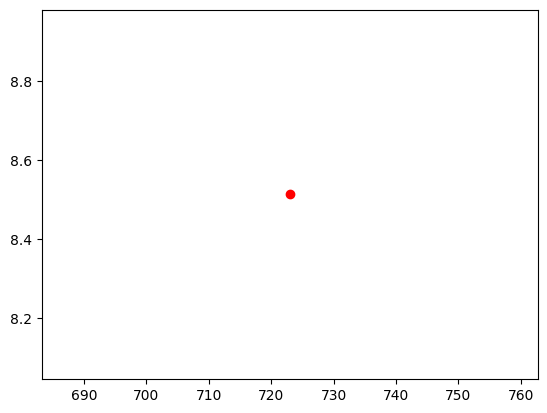

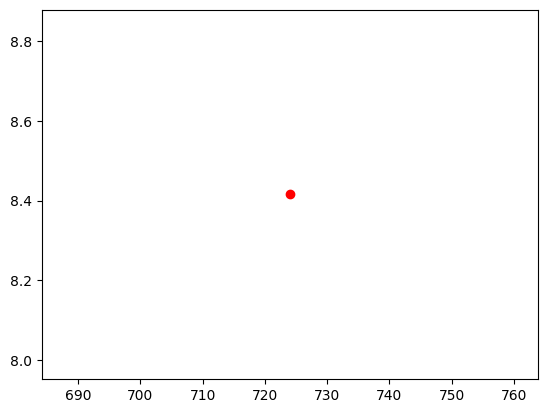

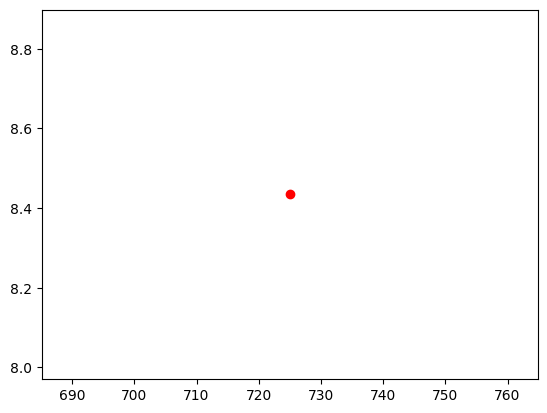

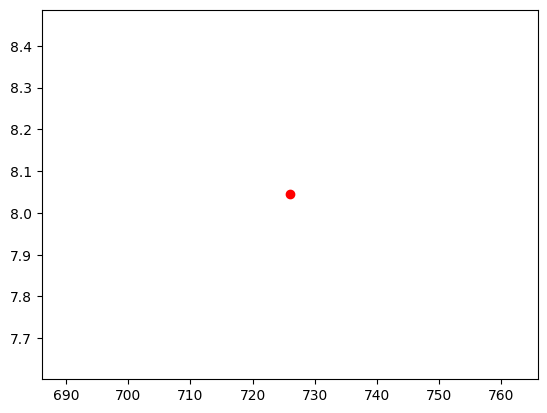

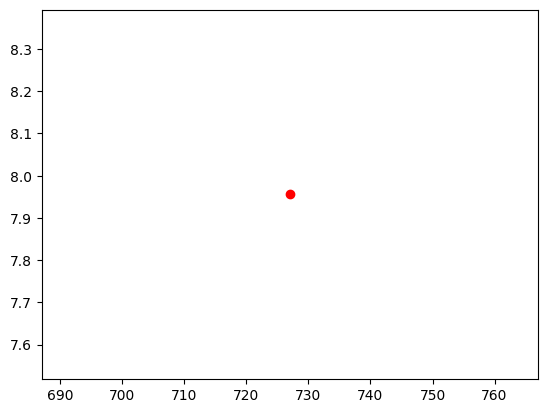

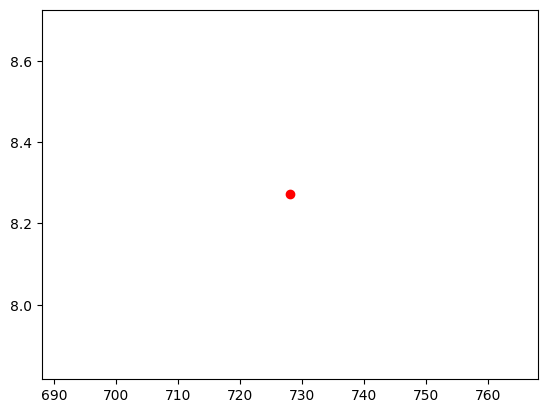

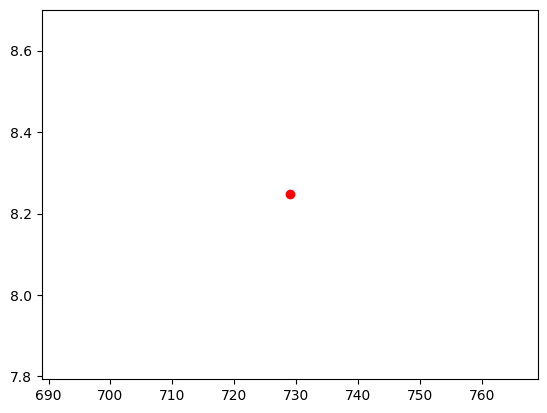

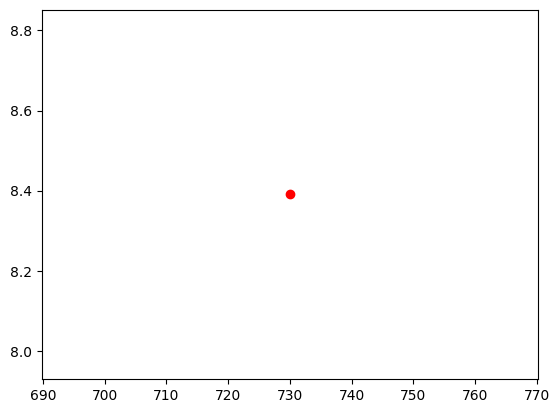

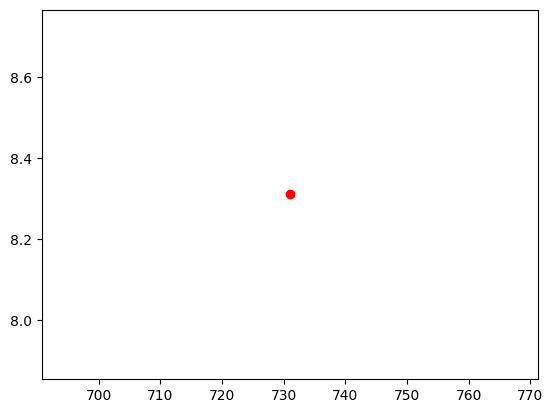

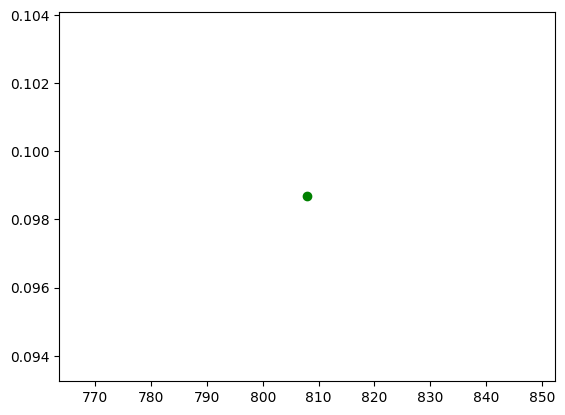

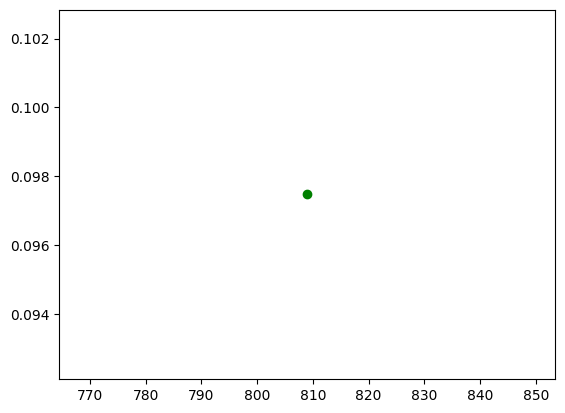

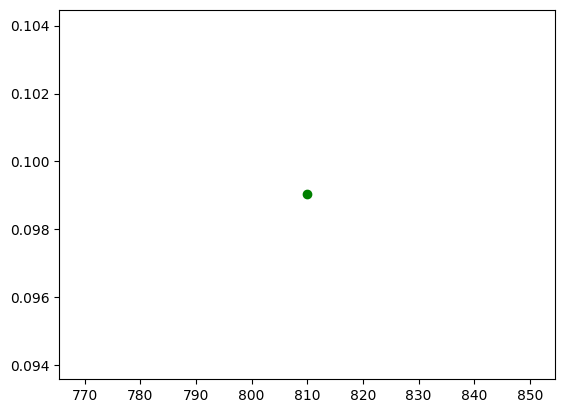

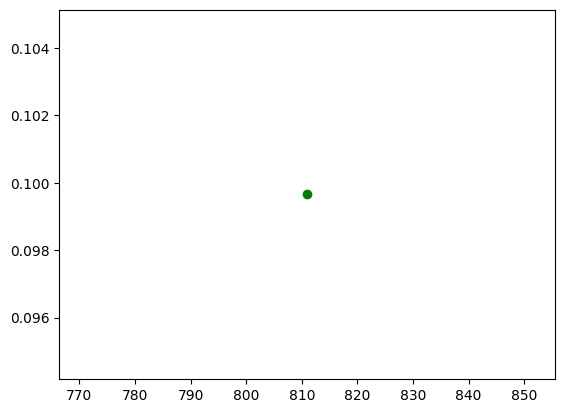

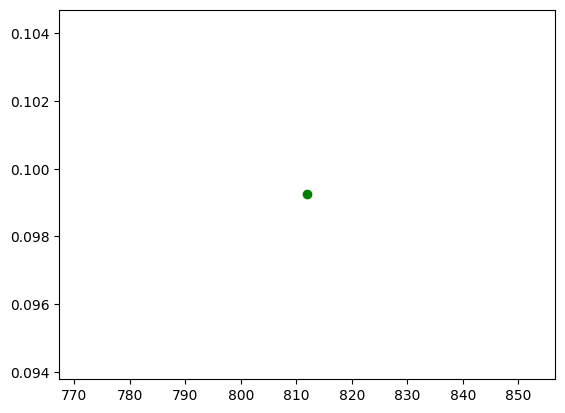

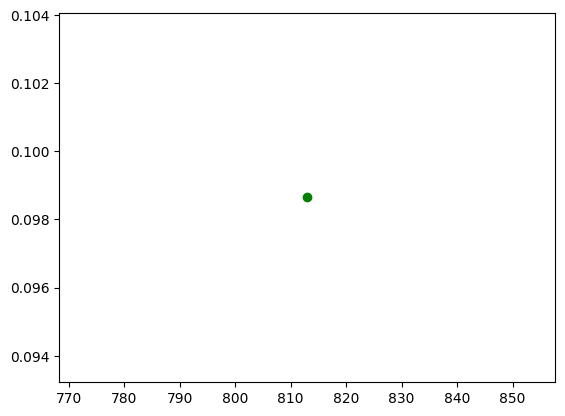

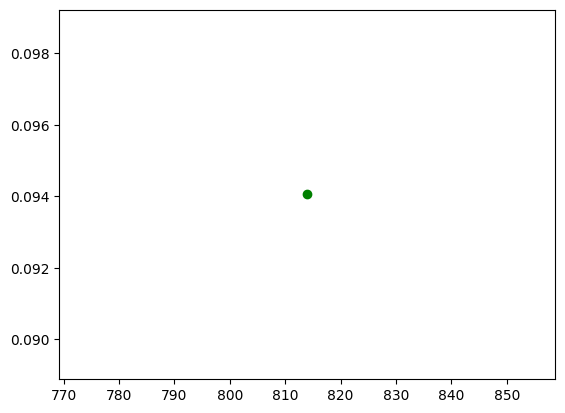

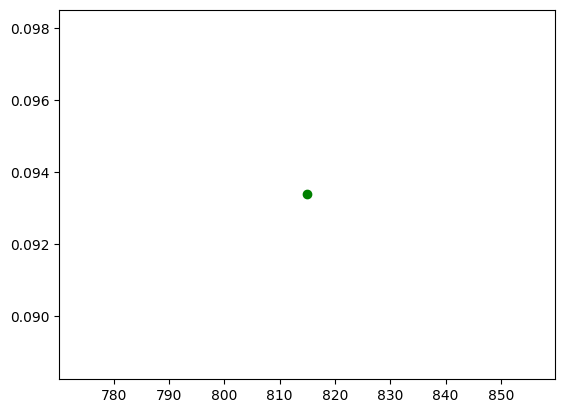

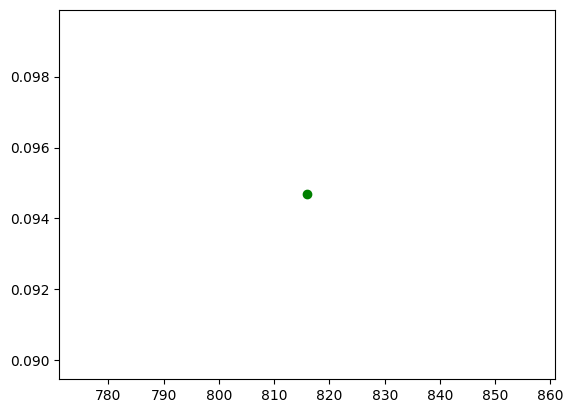

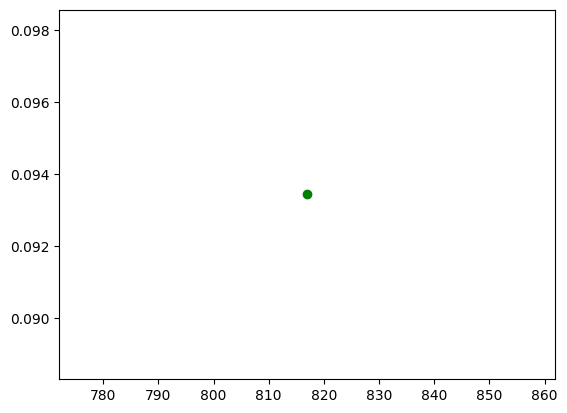

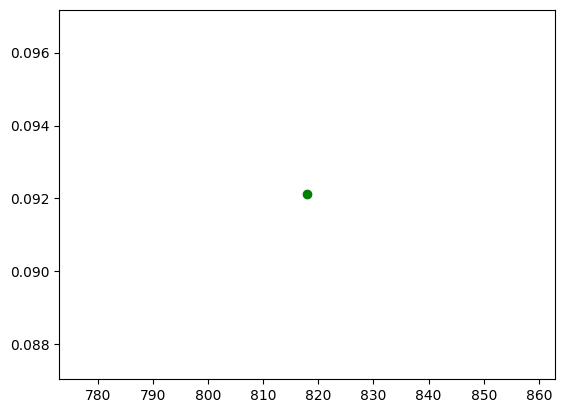

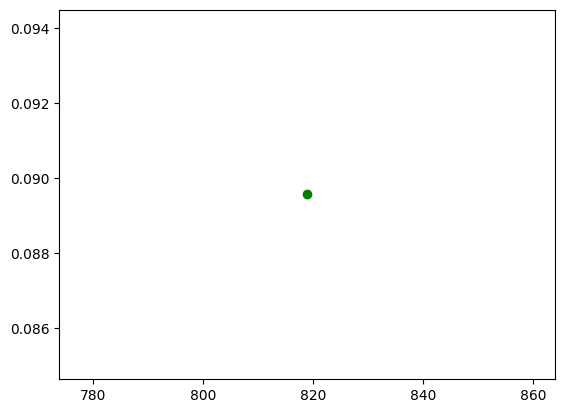

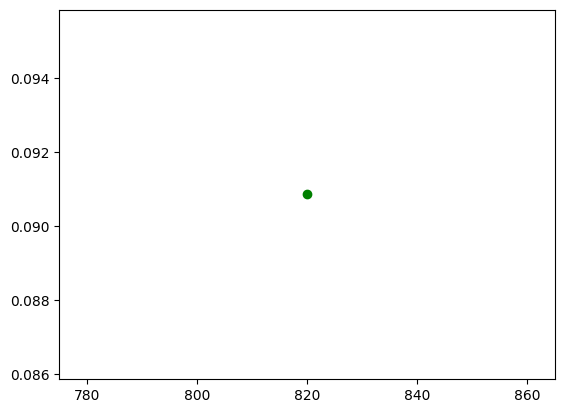

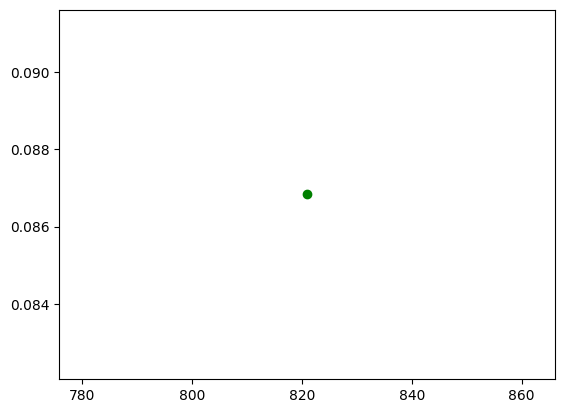

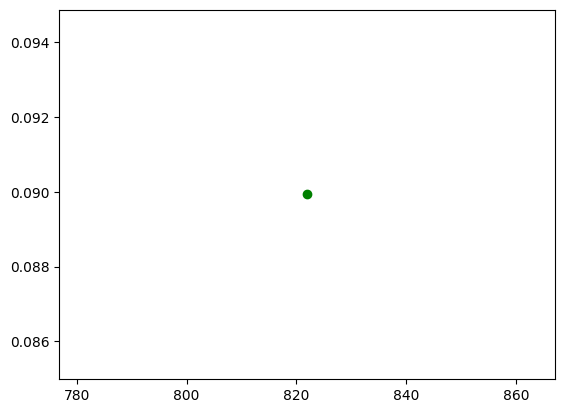

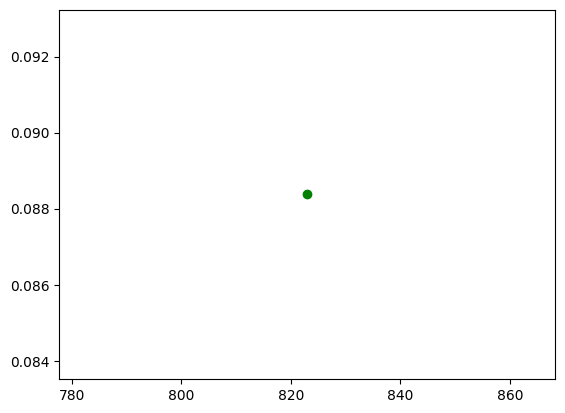

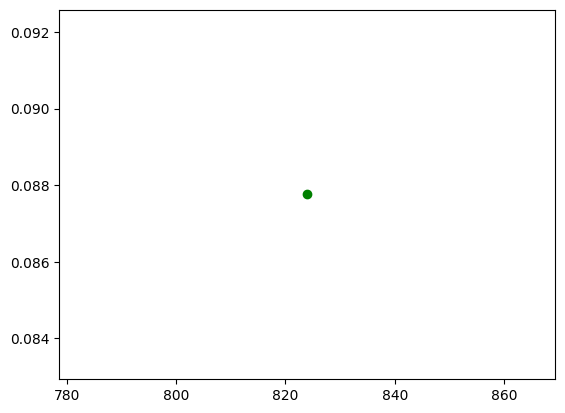

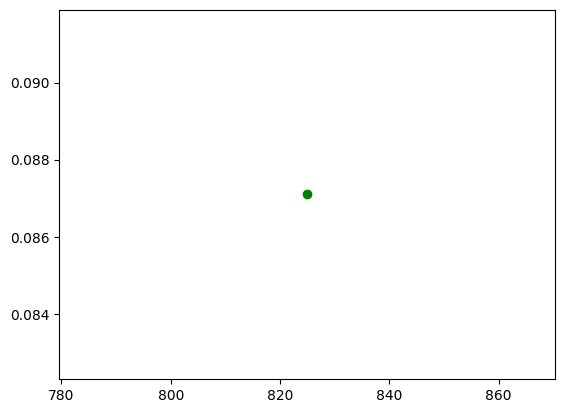

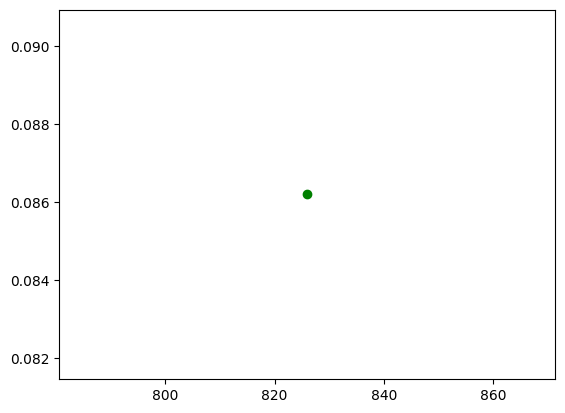

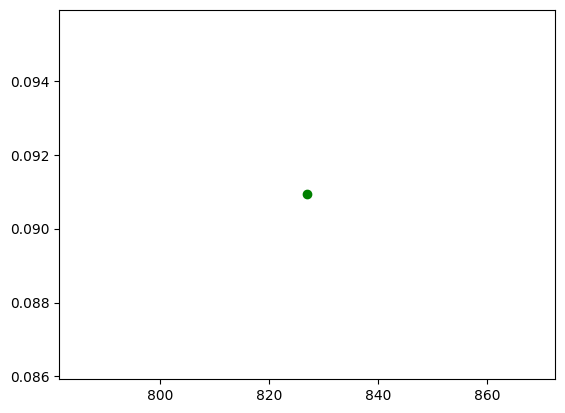

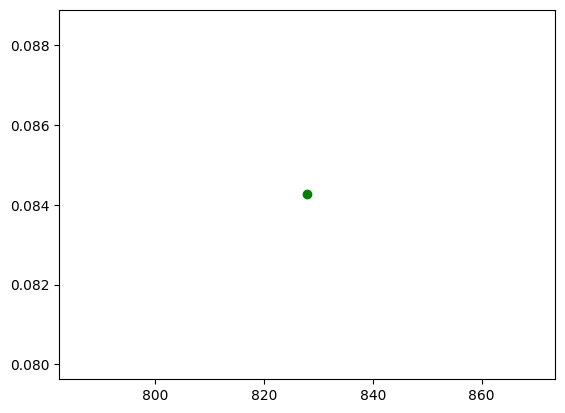

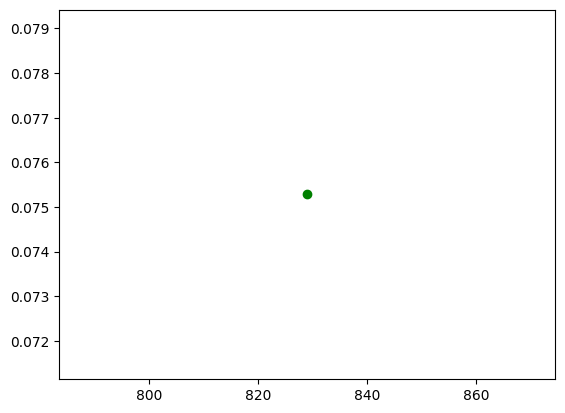

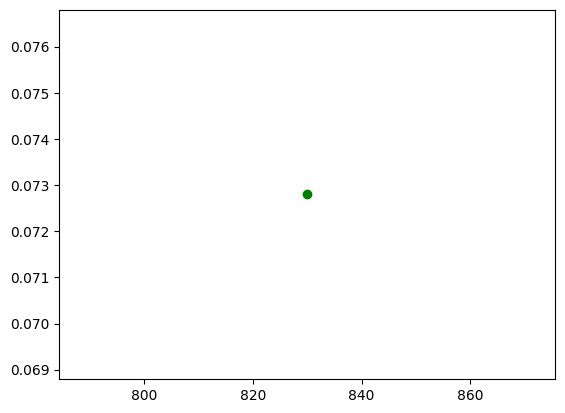

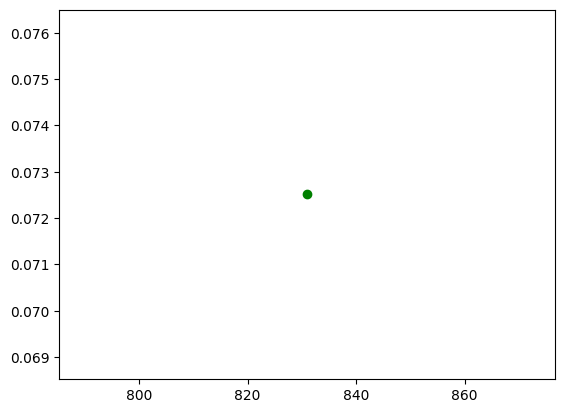

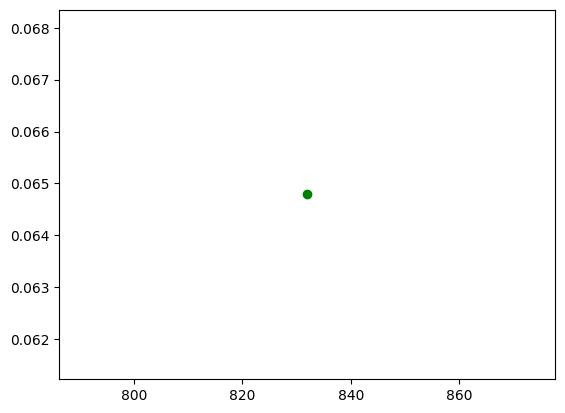

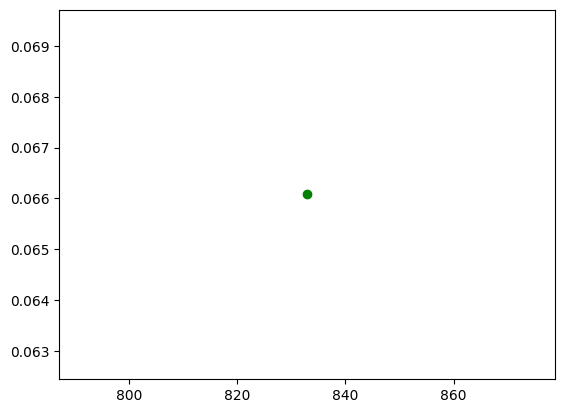

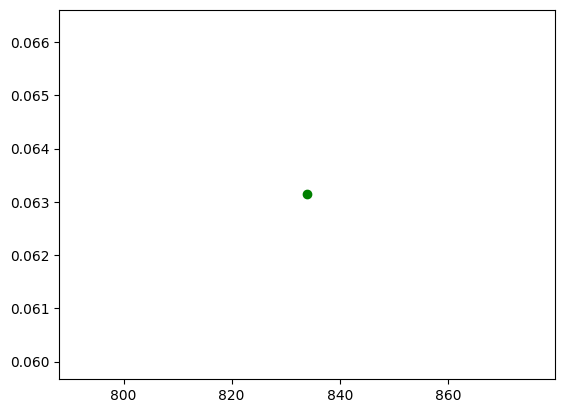

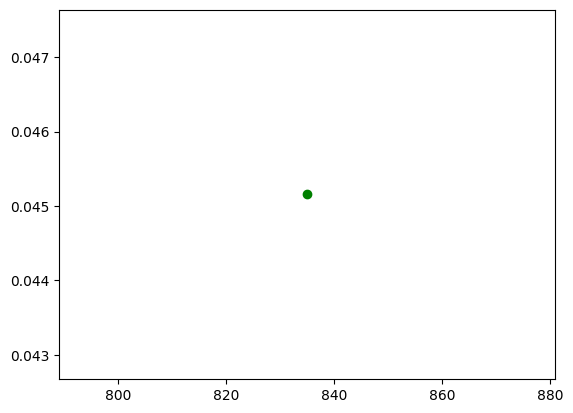

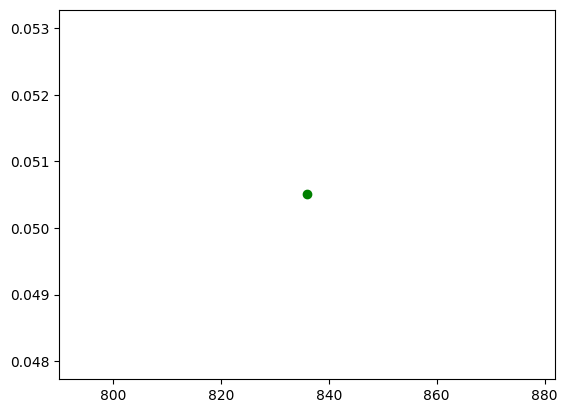

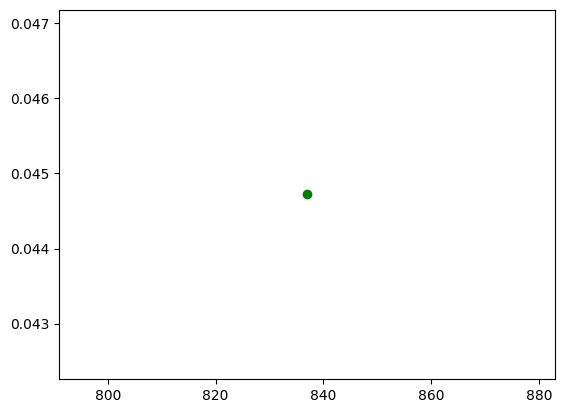

KeyboardInterrupt: 

In [83]:
# Plotting for a specific pair (e.g., 'BTC' and 'SOL')
crypto_1, crypto_2 = 'BTC-USD', 'SOL-USD'
combined = combined_series[0][3]  # Example combined series for BTC and SOL
ema = ema_dict[(crypto_1, crypto_2)]
sd = sd_dict[(crypto_1, crypto_2)]

plot_trading_strategy(crypto_1, crypto_2, combined, ema, sd, positions)

# Part 5 (پیاده سازی و ارزیابی)

In [65]:
def plot_equity_curve(crypto_1, crypto_2, series, positions):
    returns = series.pct_change().shift(-1).fillna(0)
    equity_curve = (1 + positions.shift(1) * returns).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(equity_curve, label='Equity Curve')
    plt.title(f'{crypto_1}, {crypto_2} Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.legend()
    plt.show()

    return equity_curve

In [61]:
def calculate_sharpe_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    return sharpe_ratio


In [62]:
def simulate_trading_strategy(series, look_back):
    ema = calculate_ema(series, look_back)
    sd = calculate_sd(series, look_back)

    positions = pd.Series(index=series.index).fillna(0)
    for i in range(len(series)):
        if series[i] > ema[i] + 2 * sd[i]:
            positions[i] = -0.5
        elif series[i] > ema[i] + 3 * sd[i]:
            positions[i] = -1
        elif series[i] < ema[i] - 2 * sd[i]:
            positions[i] = 0.5
        elif series[i] < ema[i] - 3 * sd[i]:
            positions[i] = 1
        elif series[i] < ema[i] + sd[i] and positions[i-1] < 0:
            positions[i] = 0
        elif series[i] > ema[i] - sd[i] and positions[i-1] > 0:
            positions[i] = 0

    return positions


<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

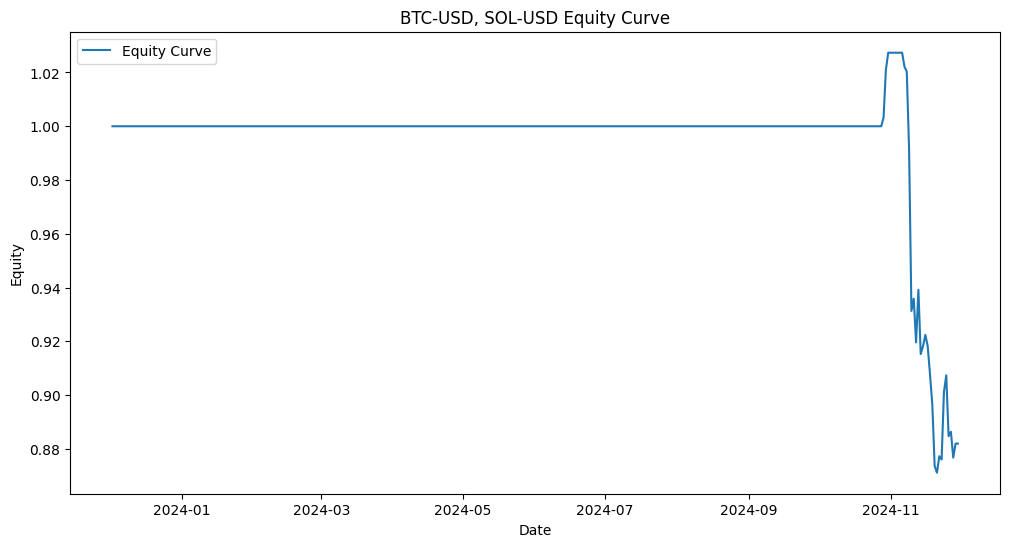

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

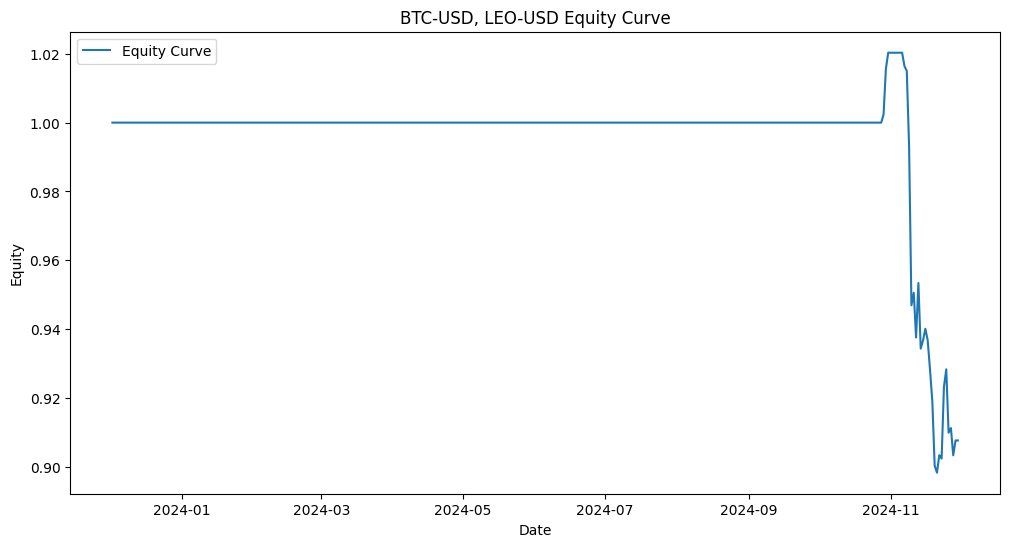

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

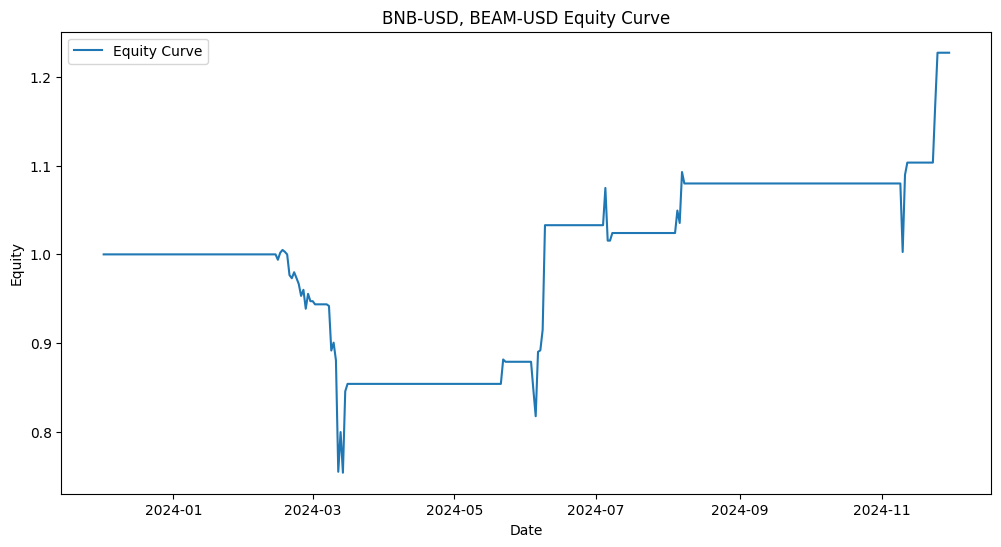

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

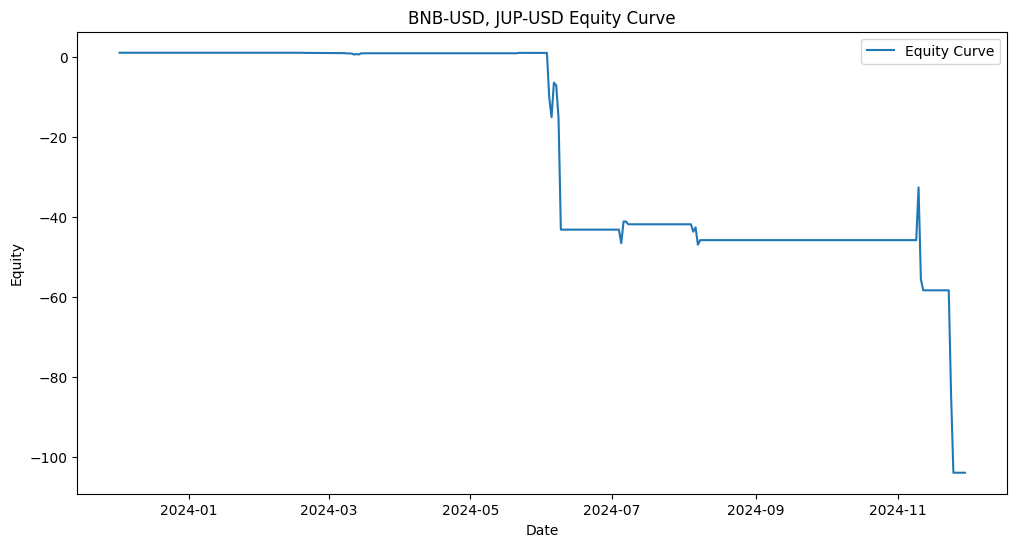

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

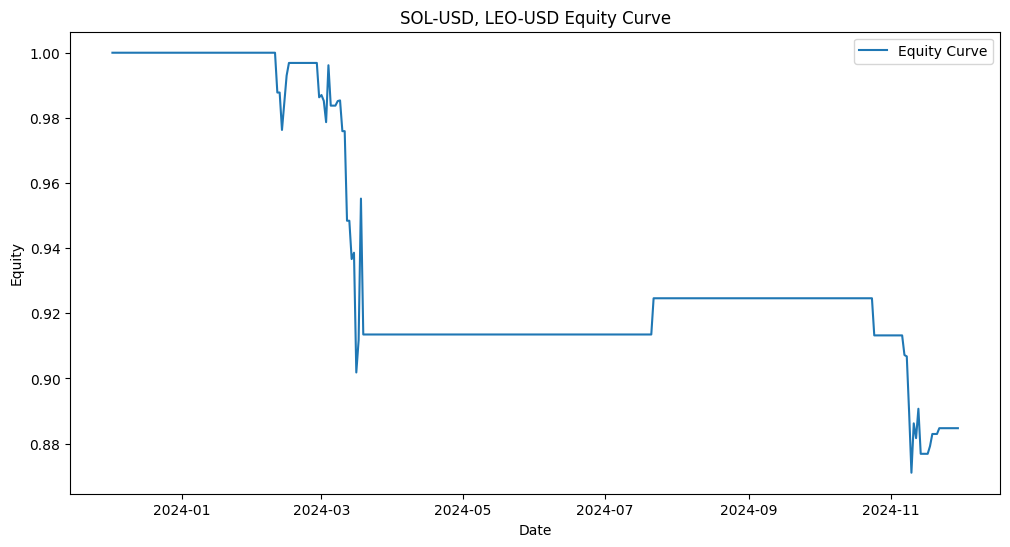

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

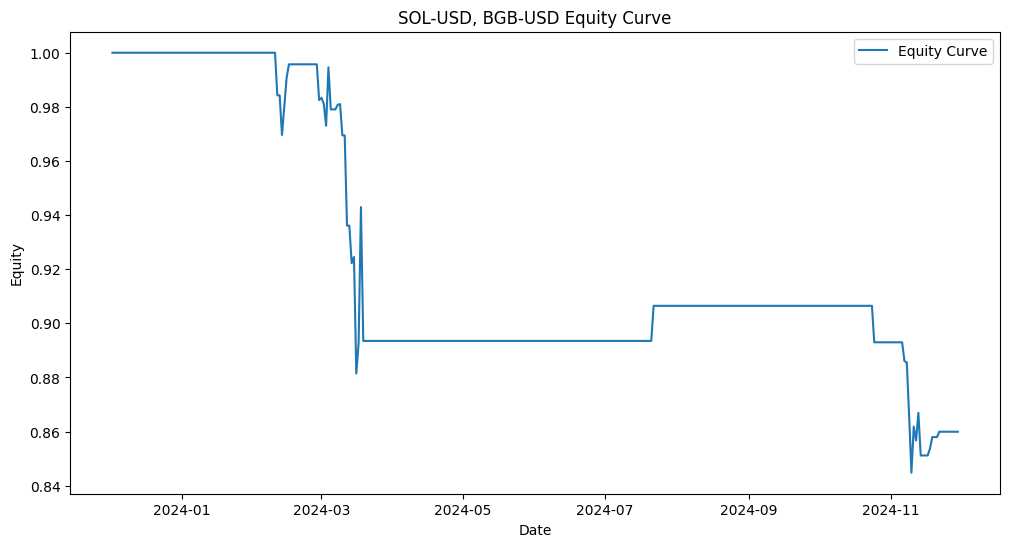

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

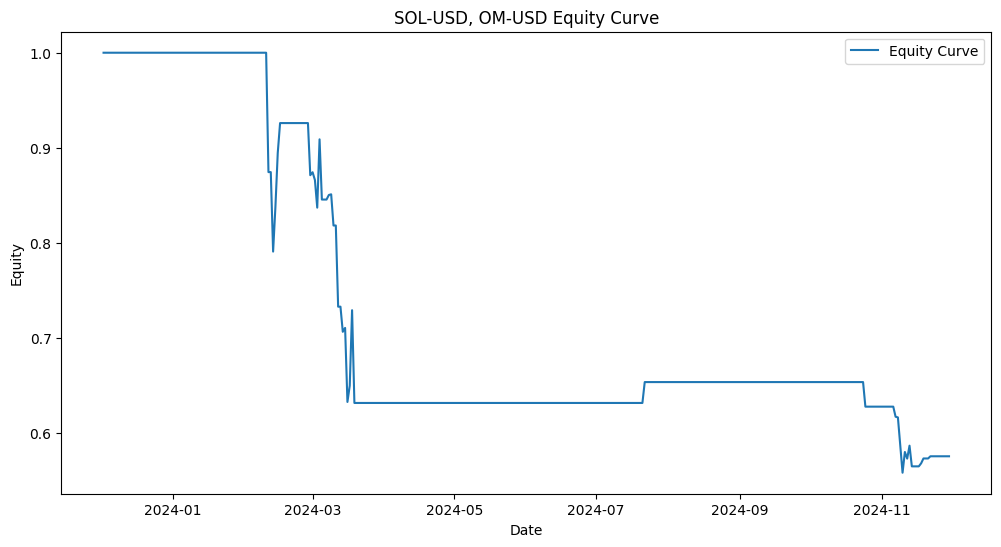

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

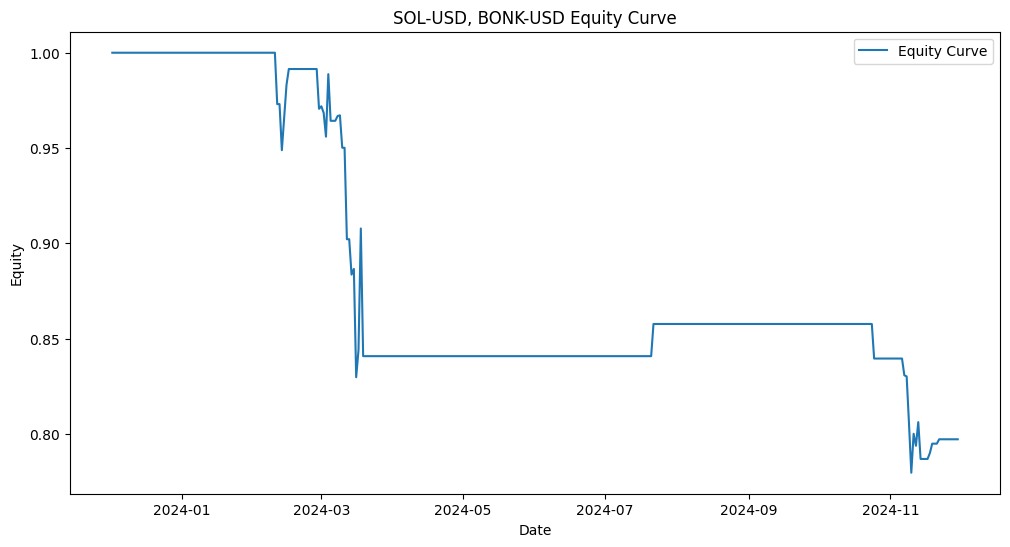

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

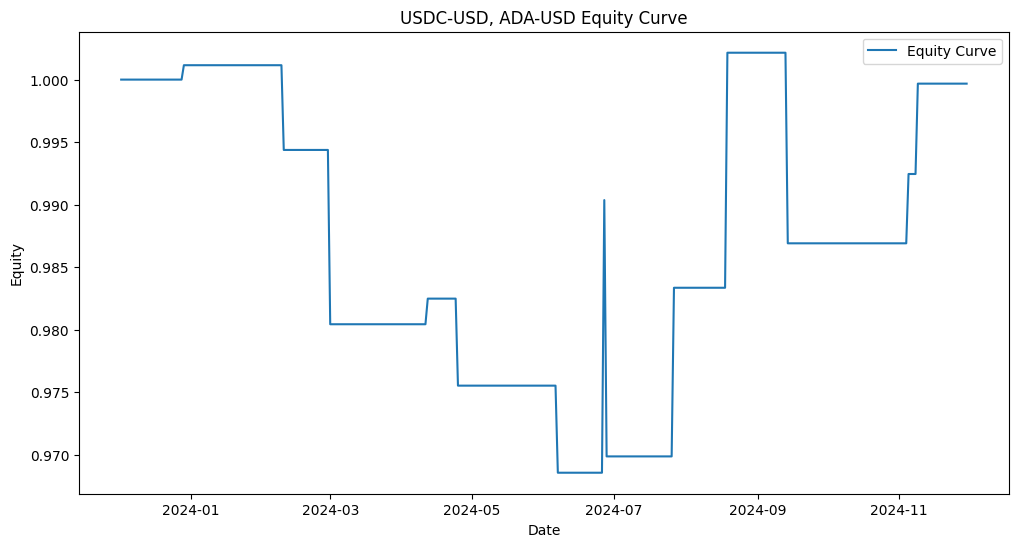

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

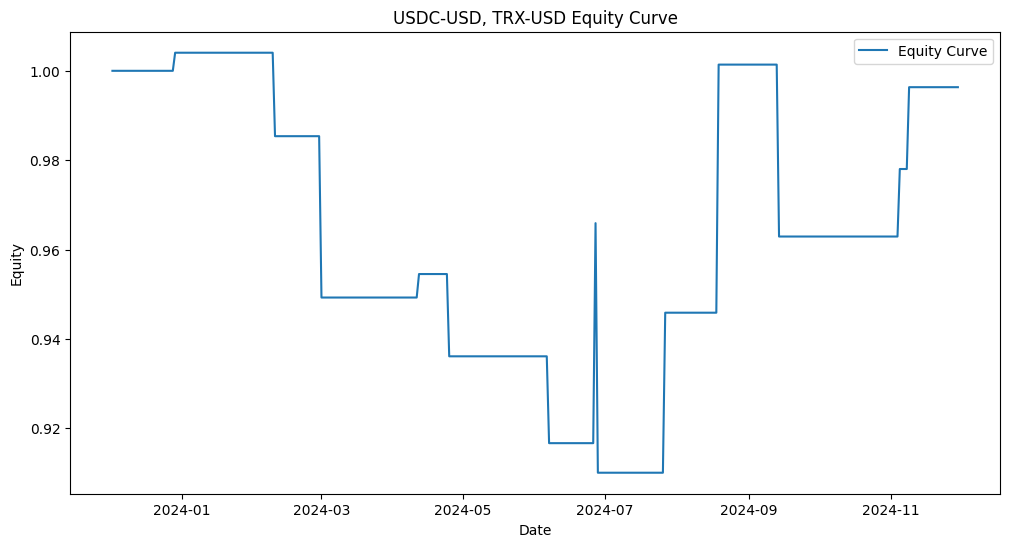

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

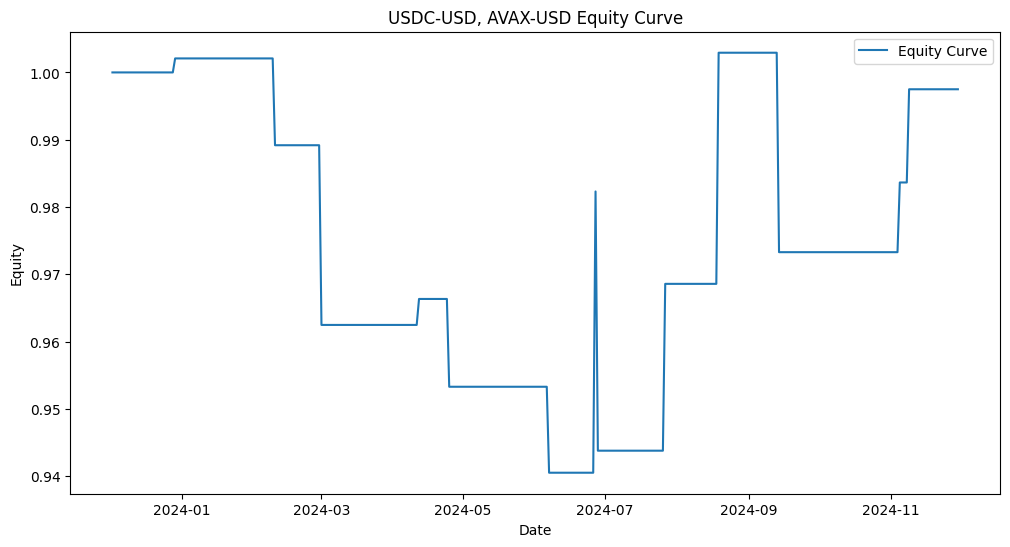

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

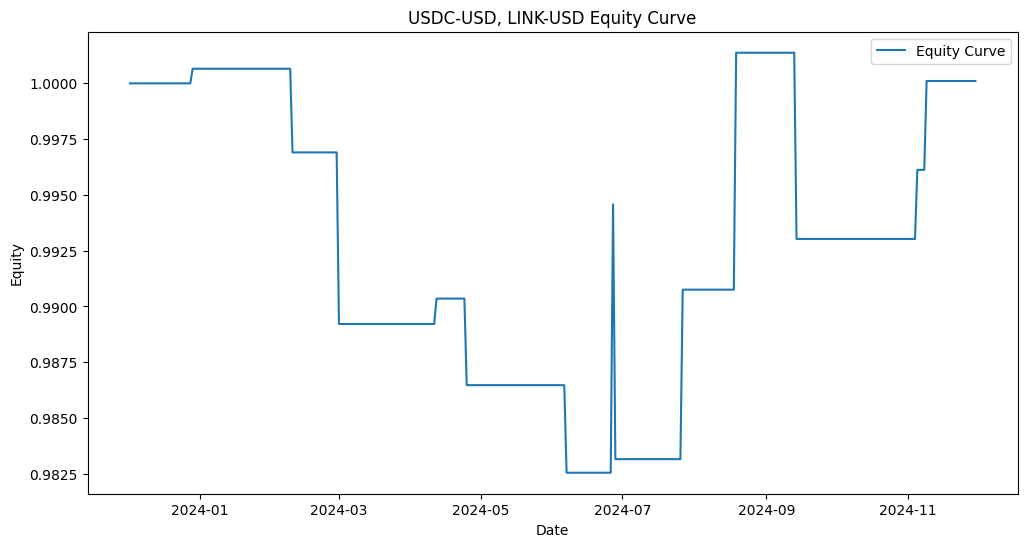

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

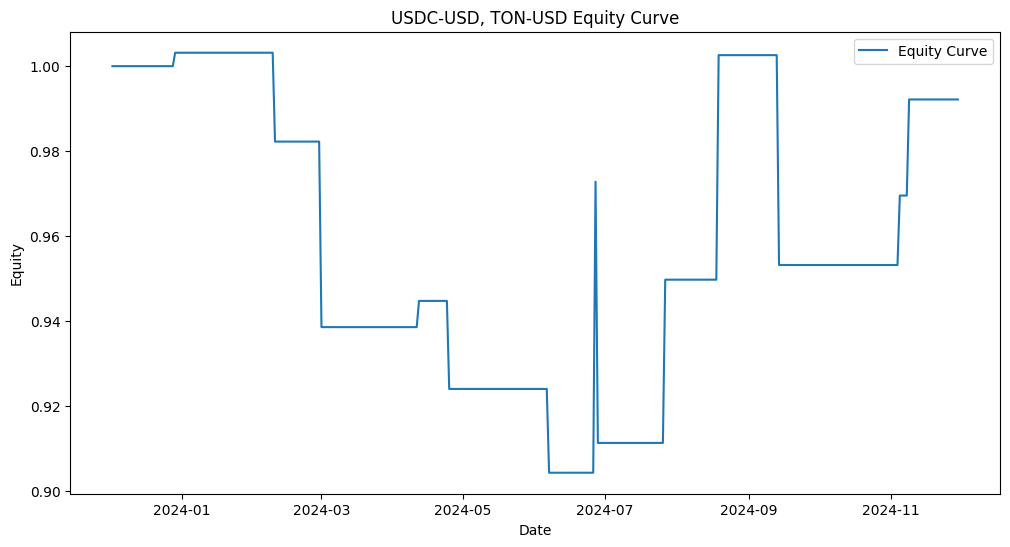

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

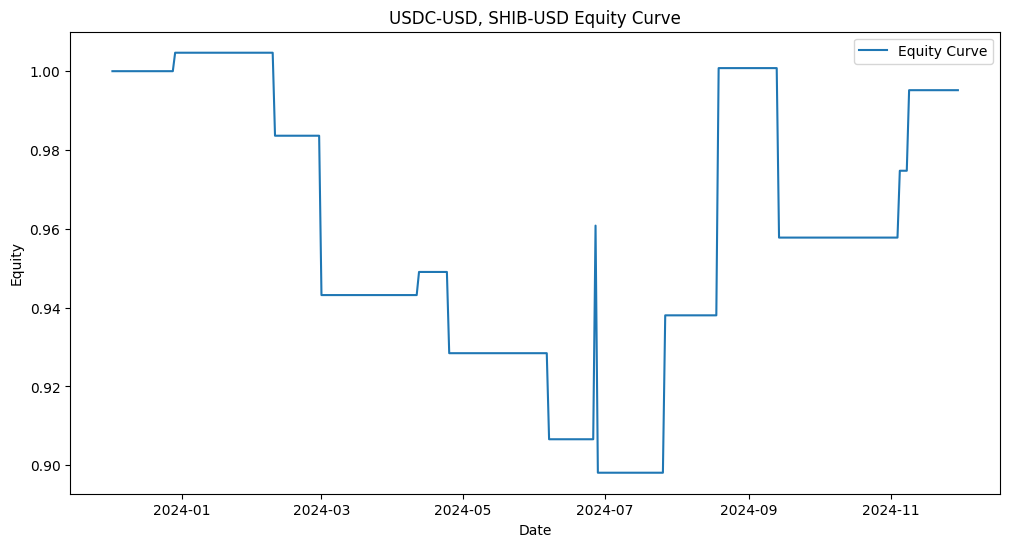

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

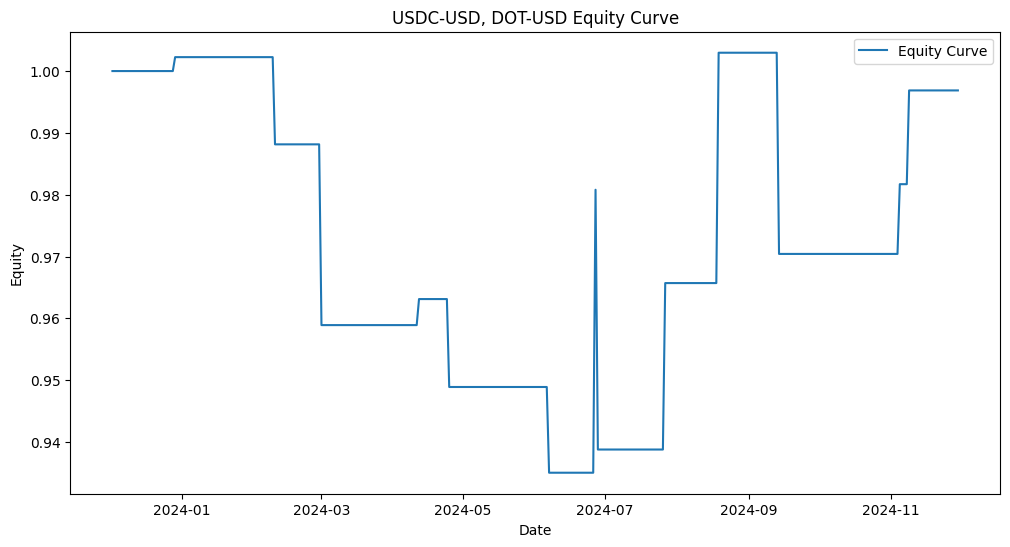

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

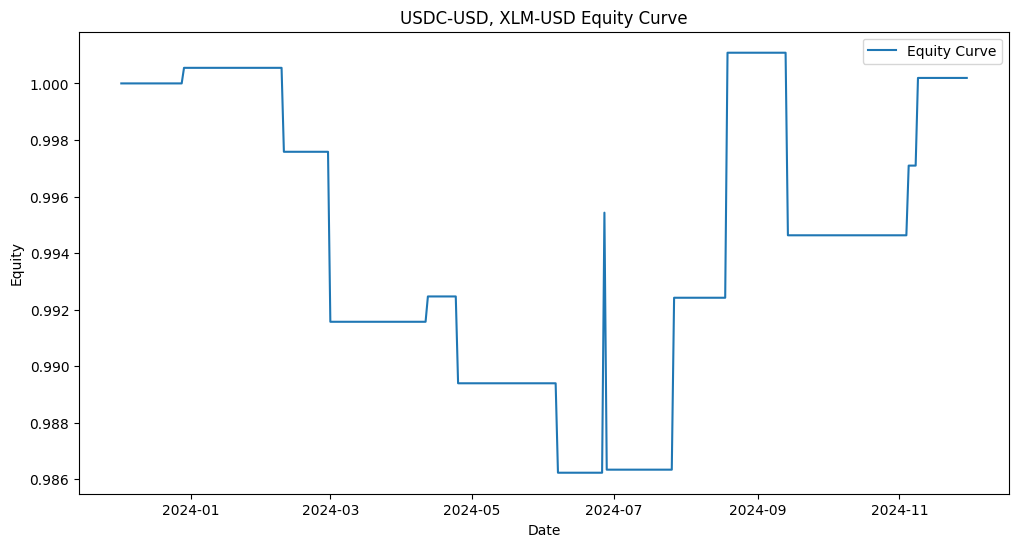

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

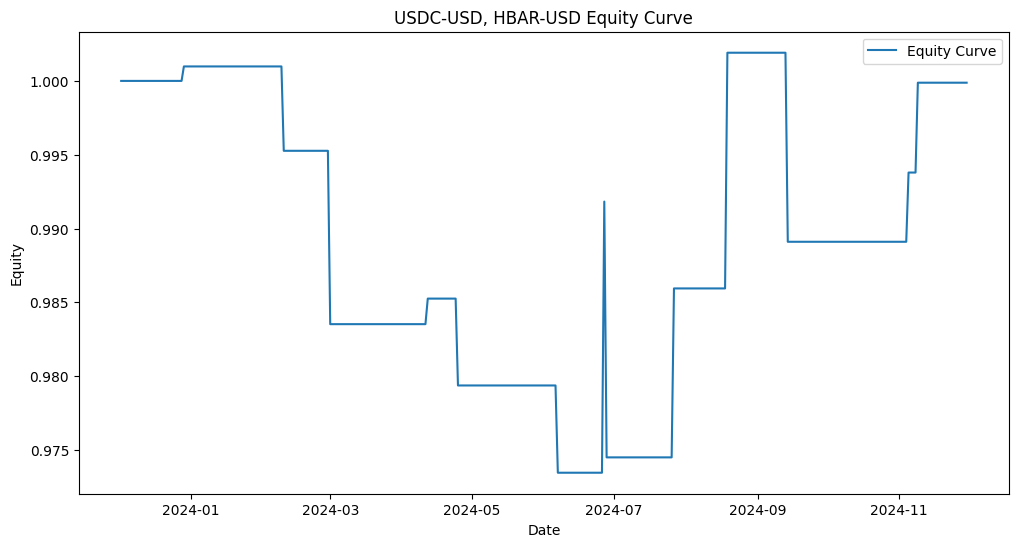

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

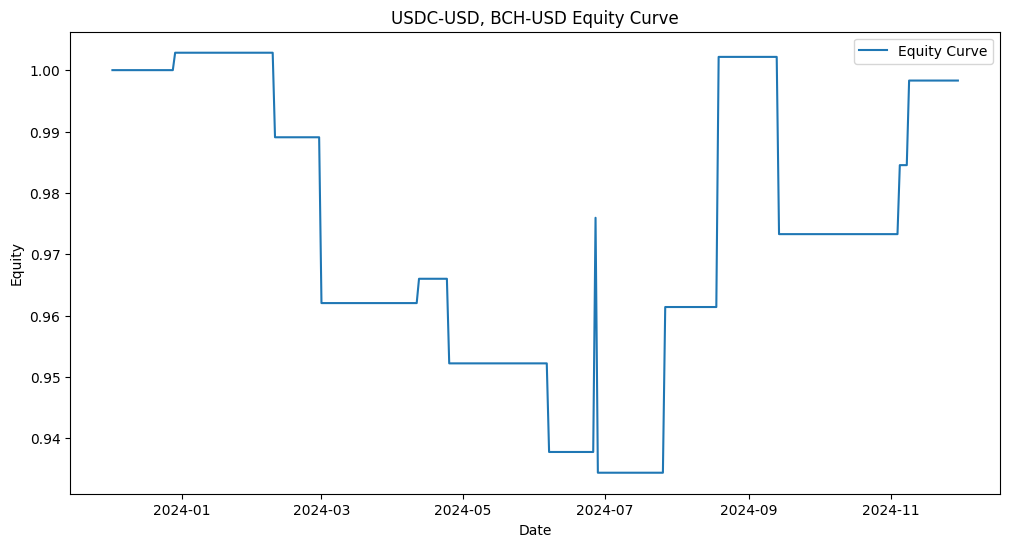

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

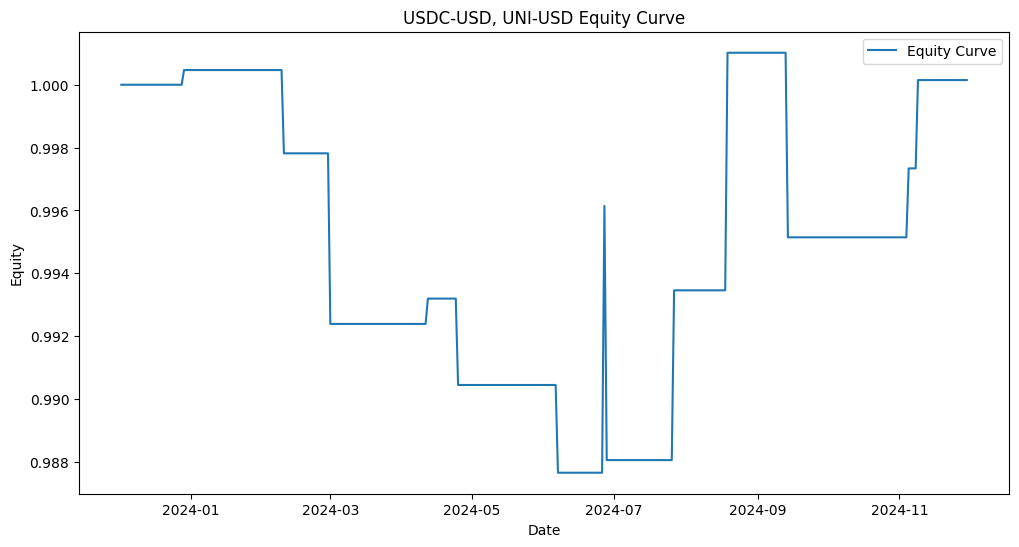

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

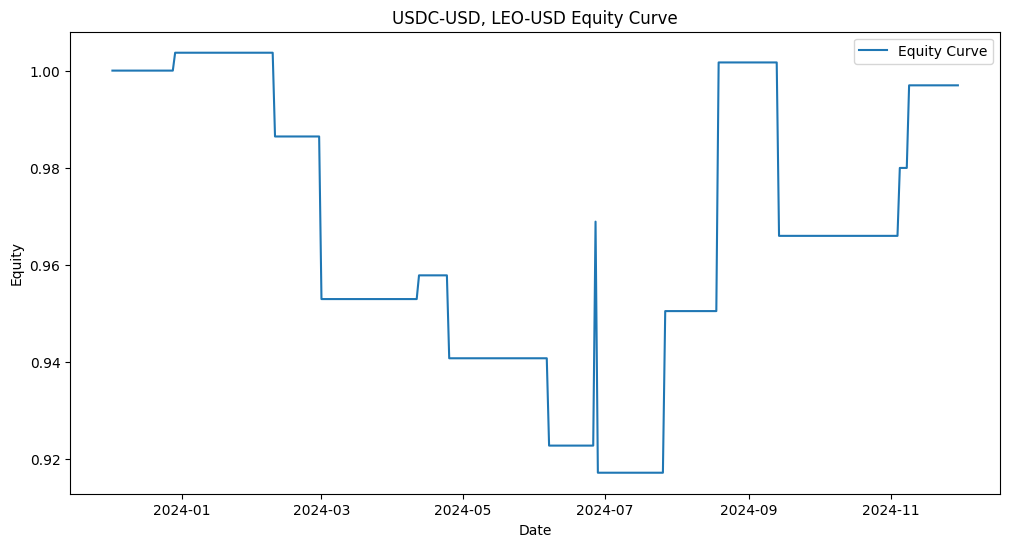

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

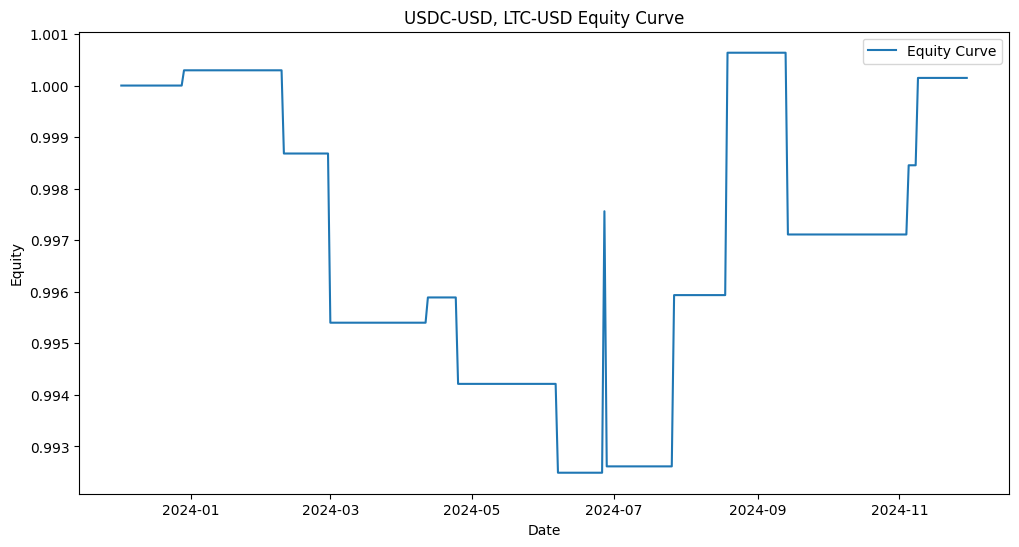

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

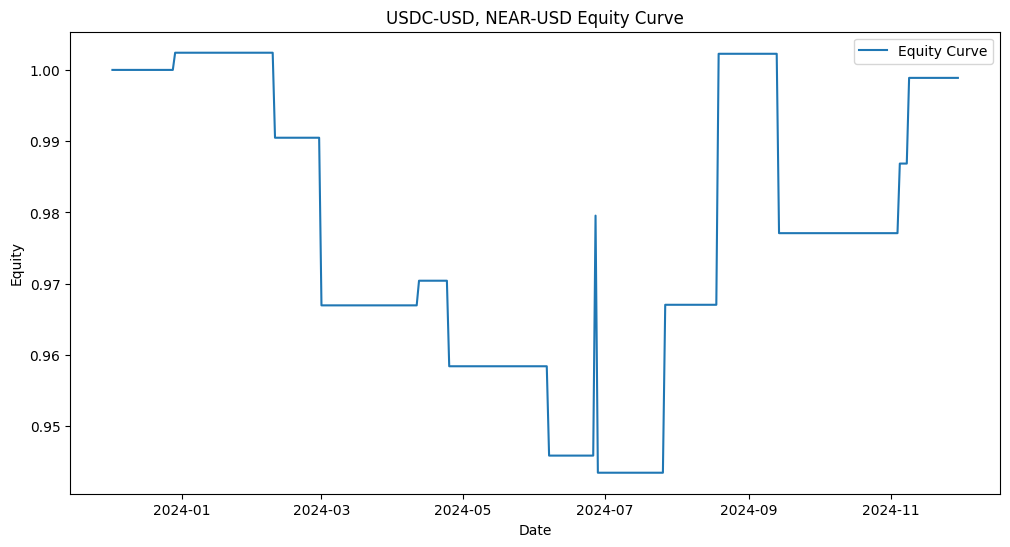

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

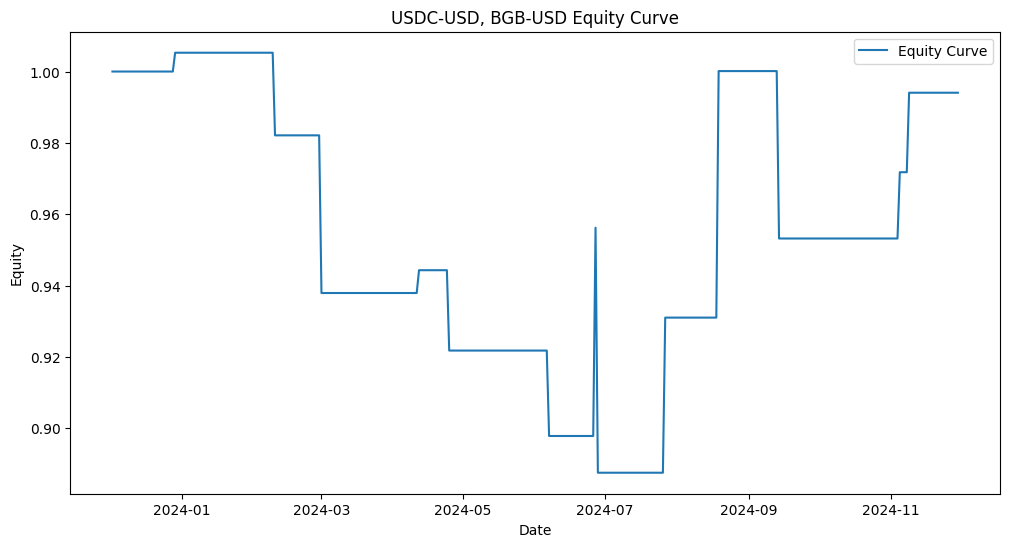

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

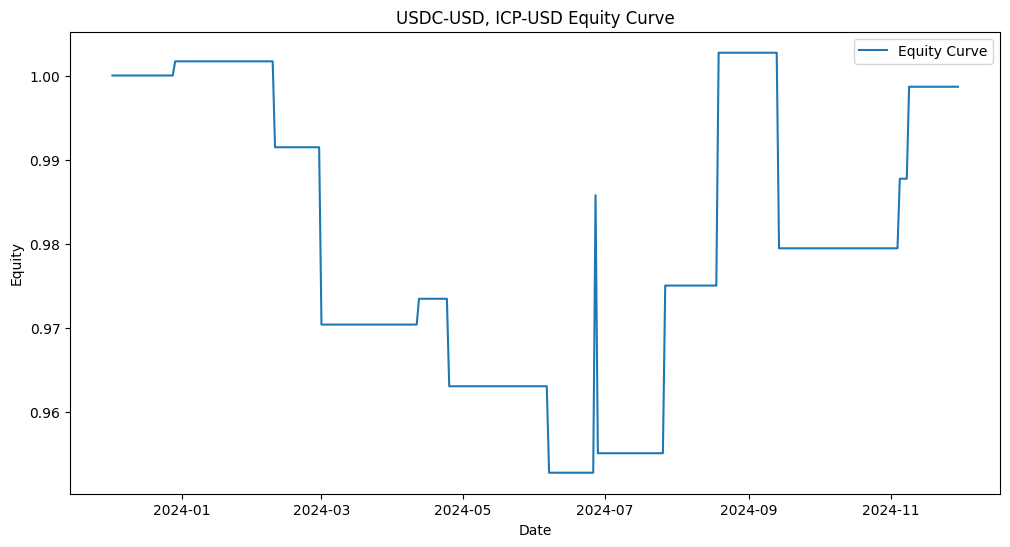

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

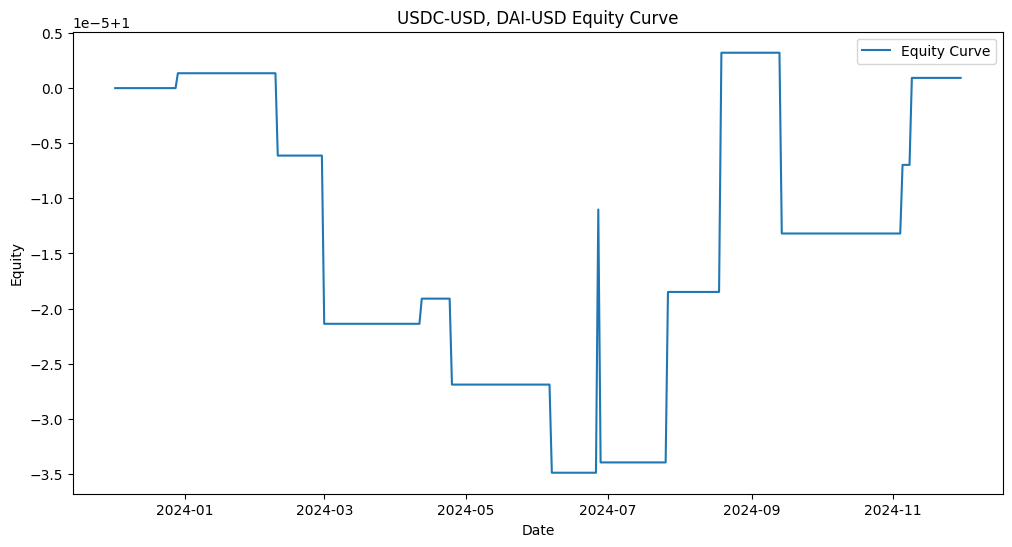

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

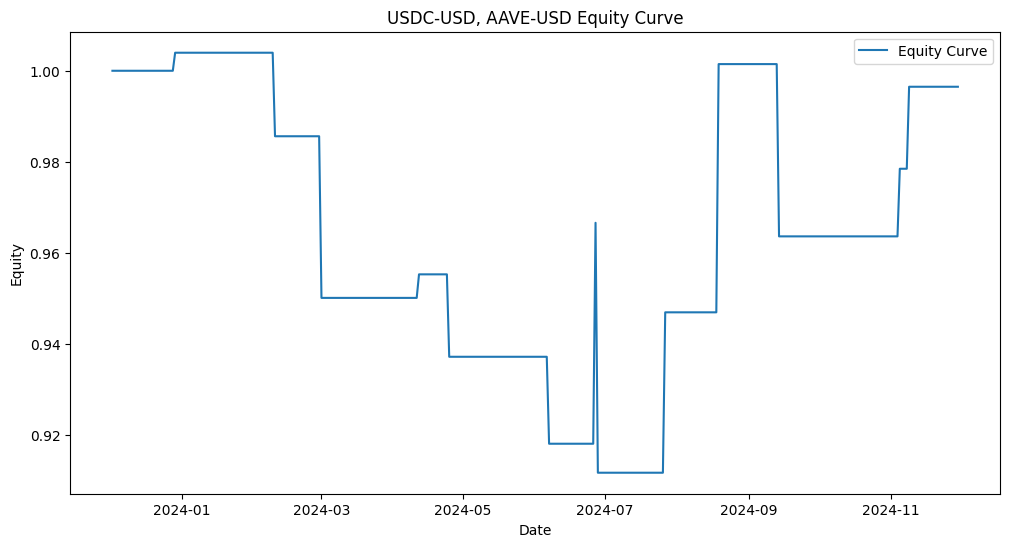

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

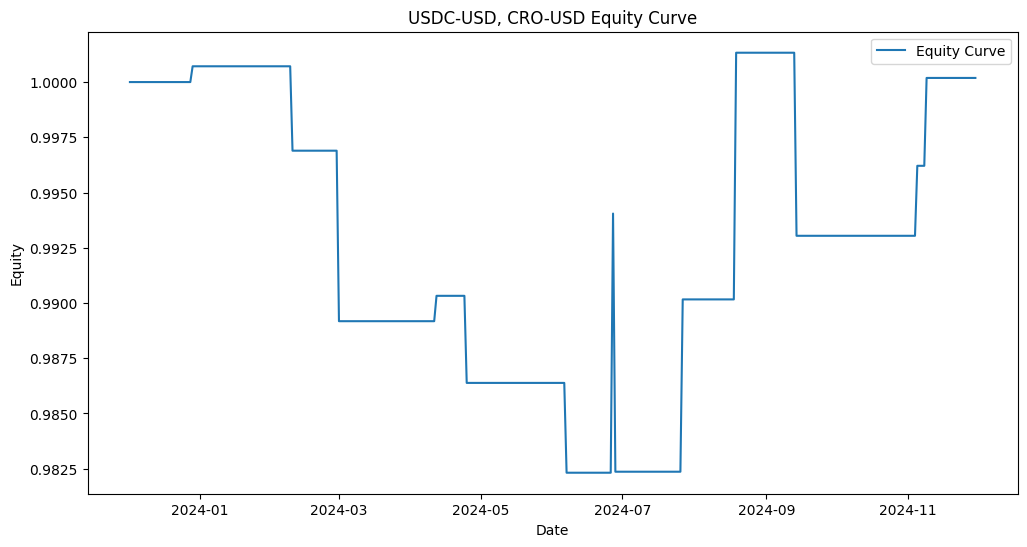

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

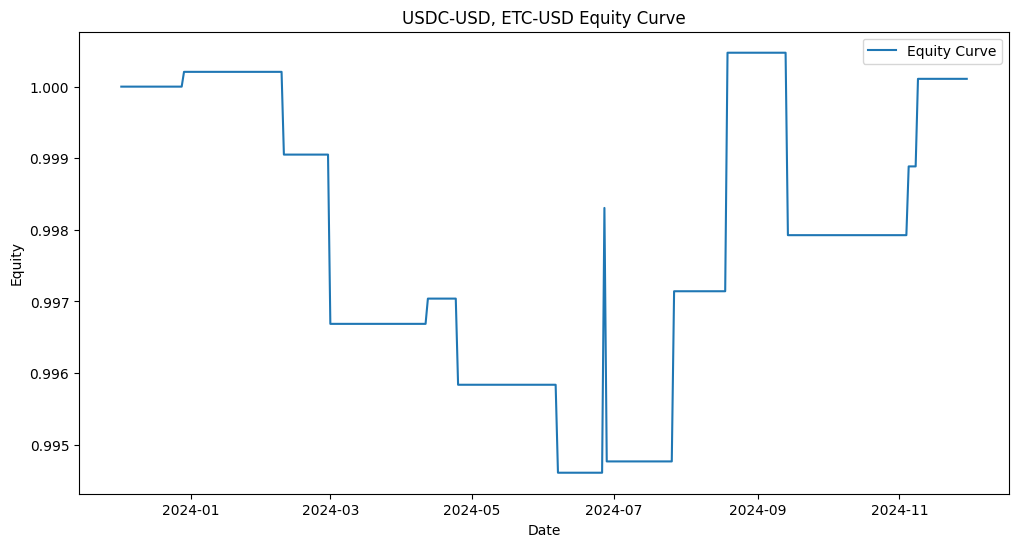

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

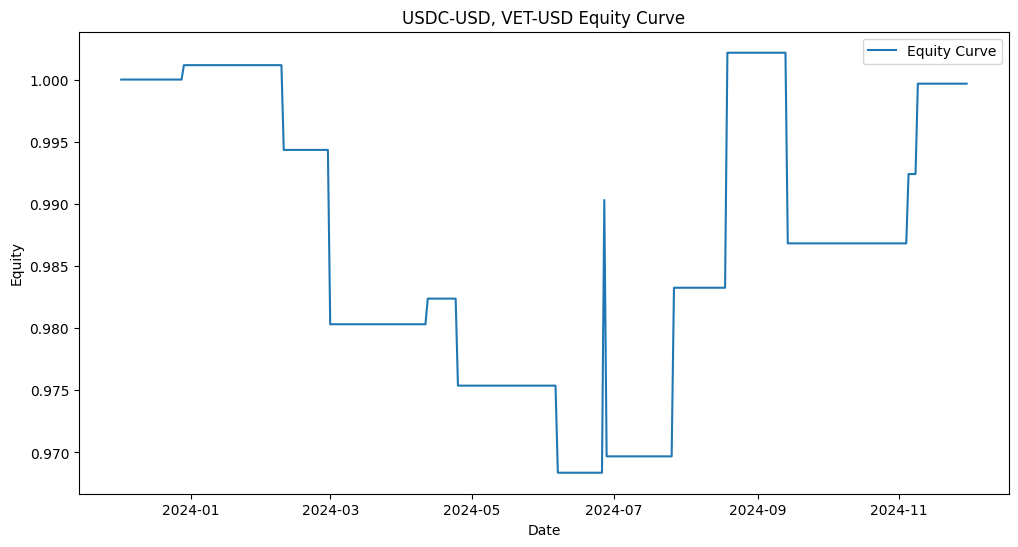

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

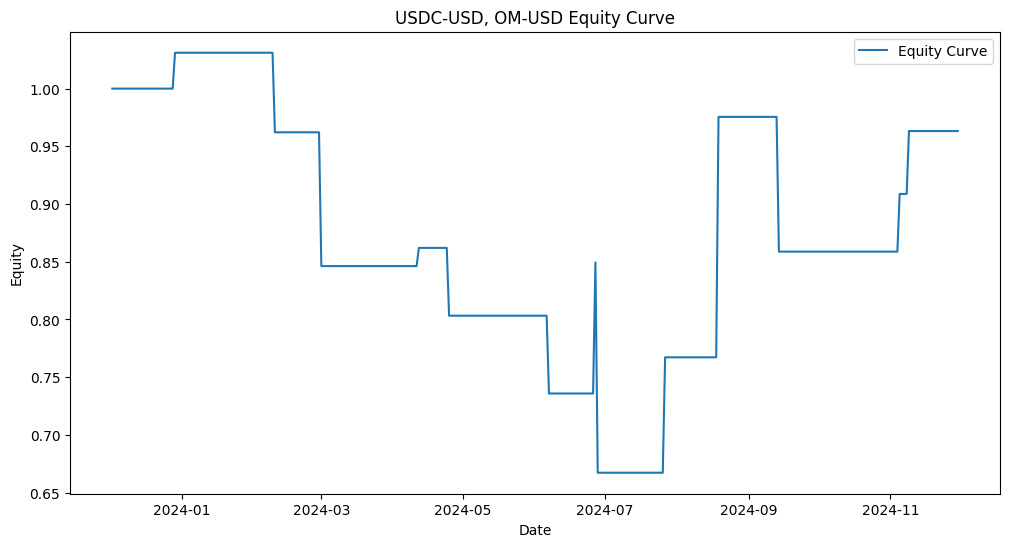

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

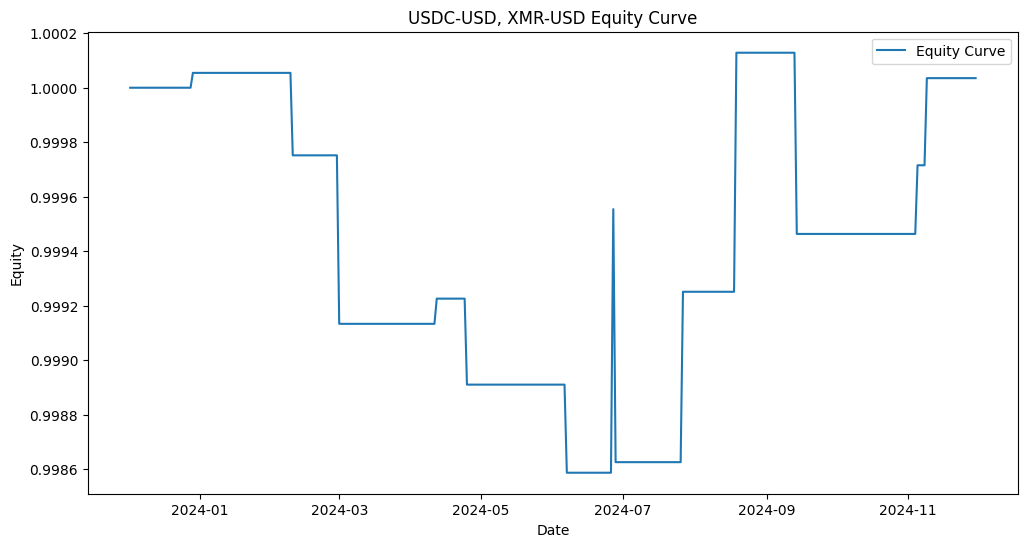

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

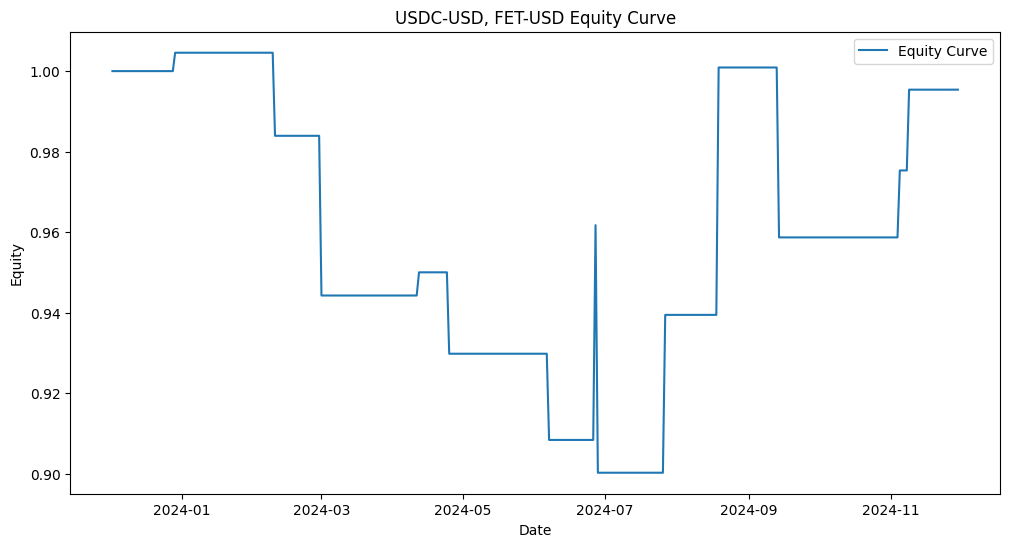

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

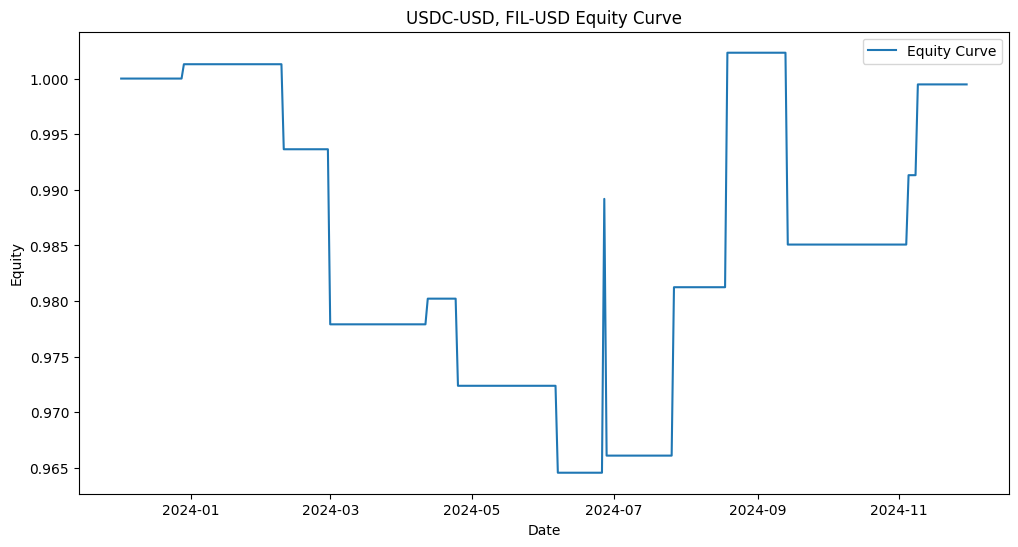

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

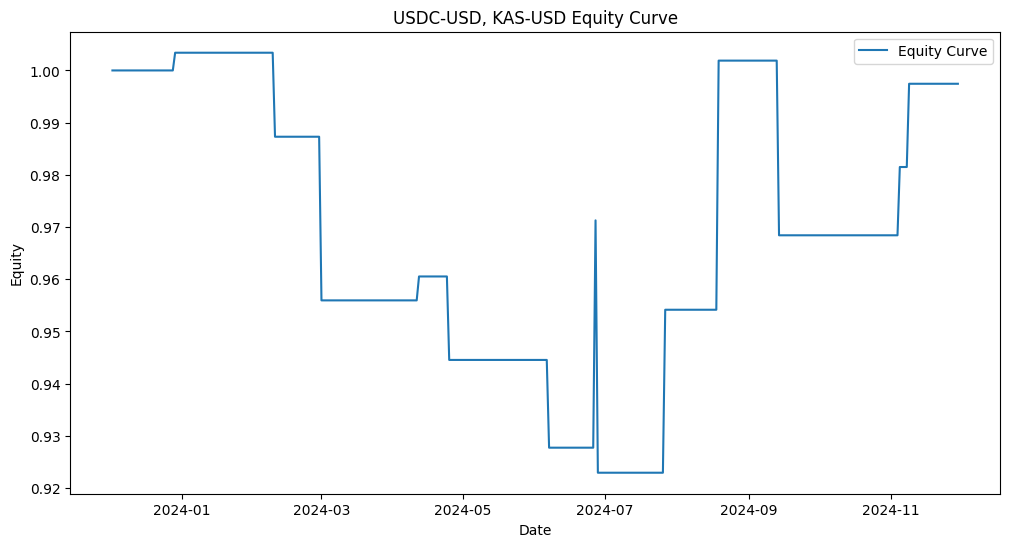

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

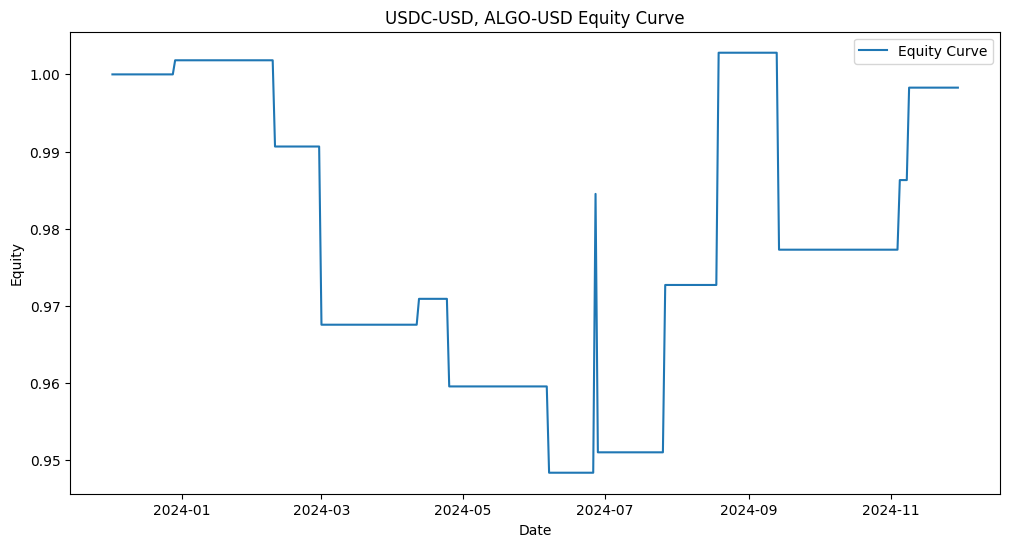

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

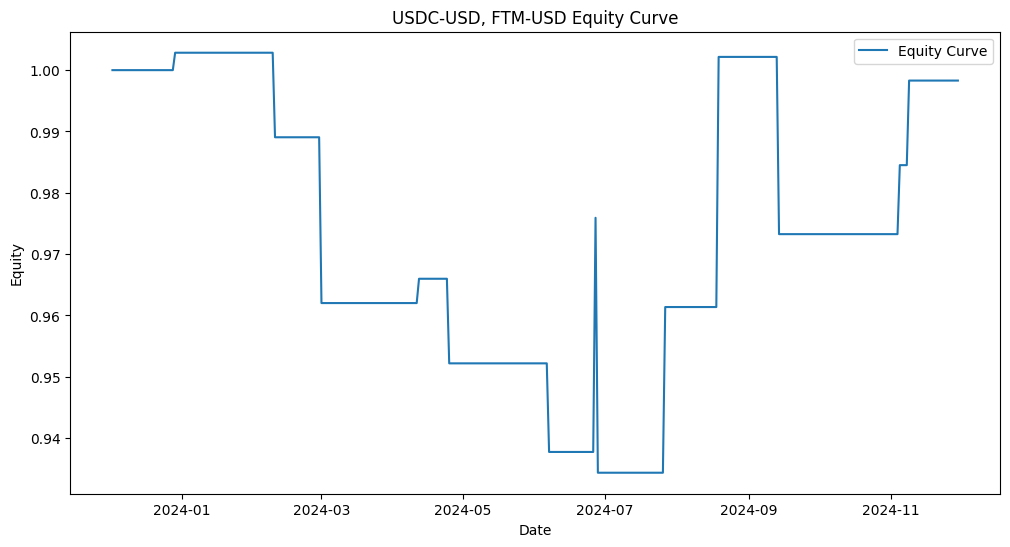

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

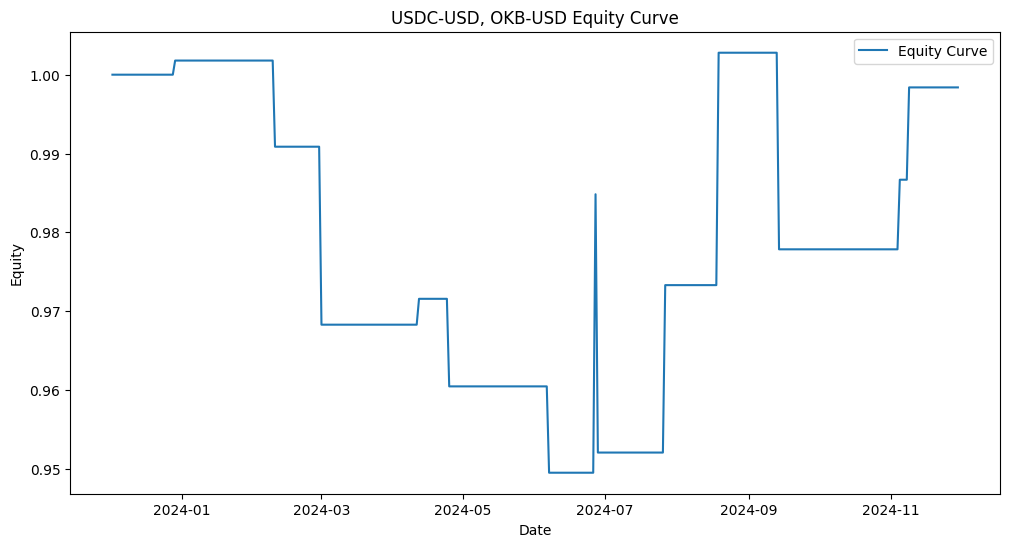

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

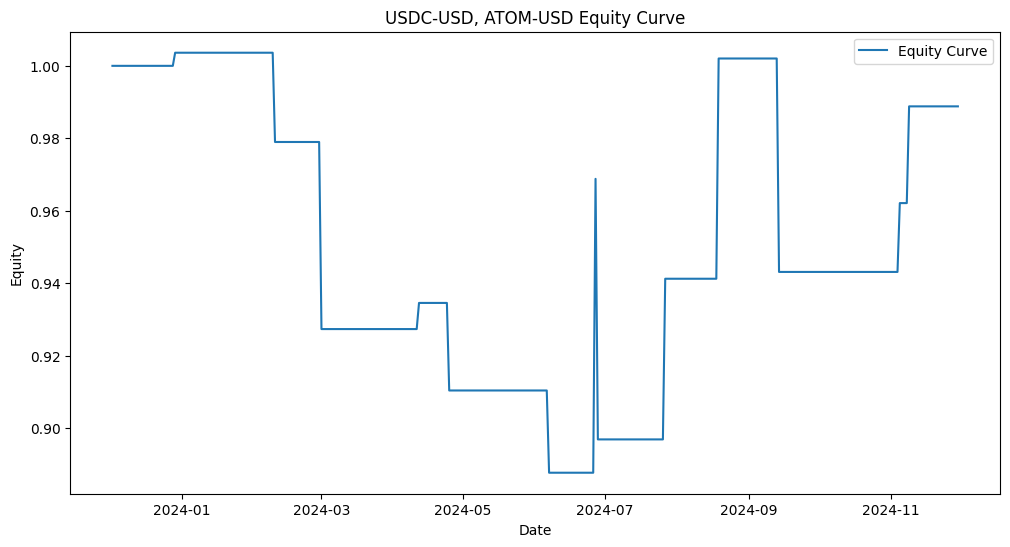

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

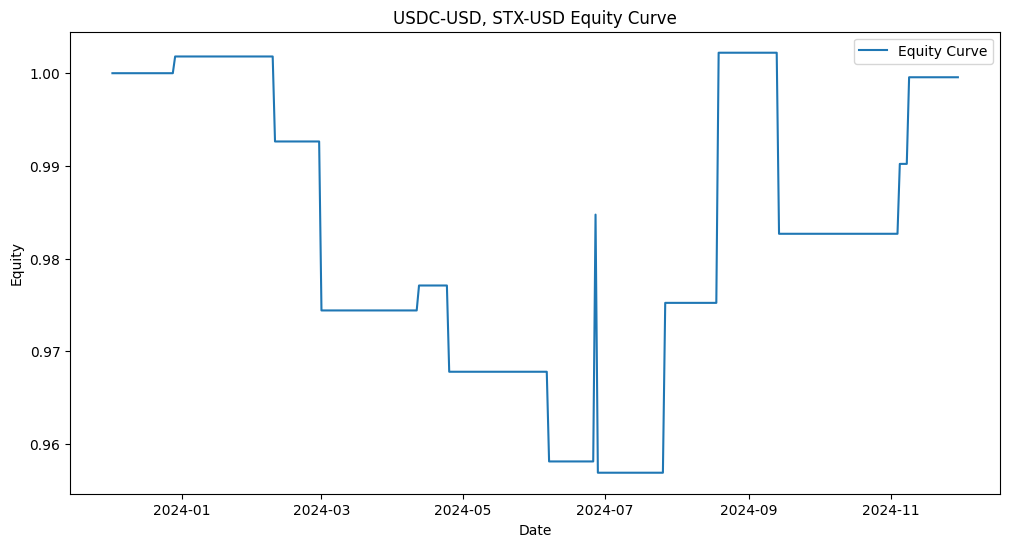

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

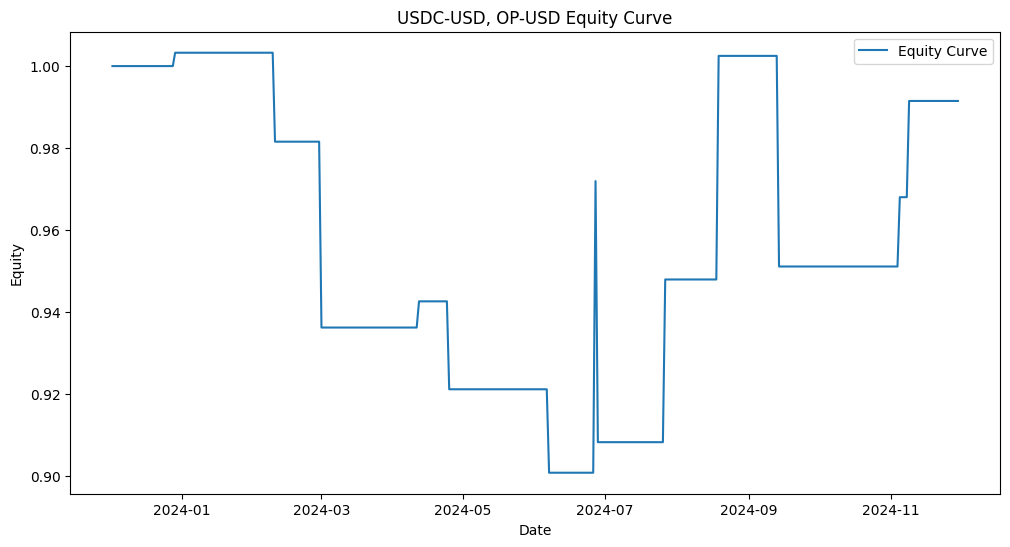

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

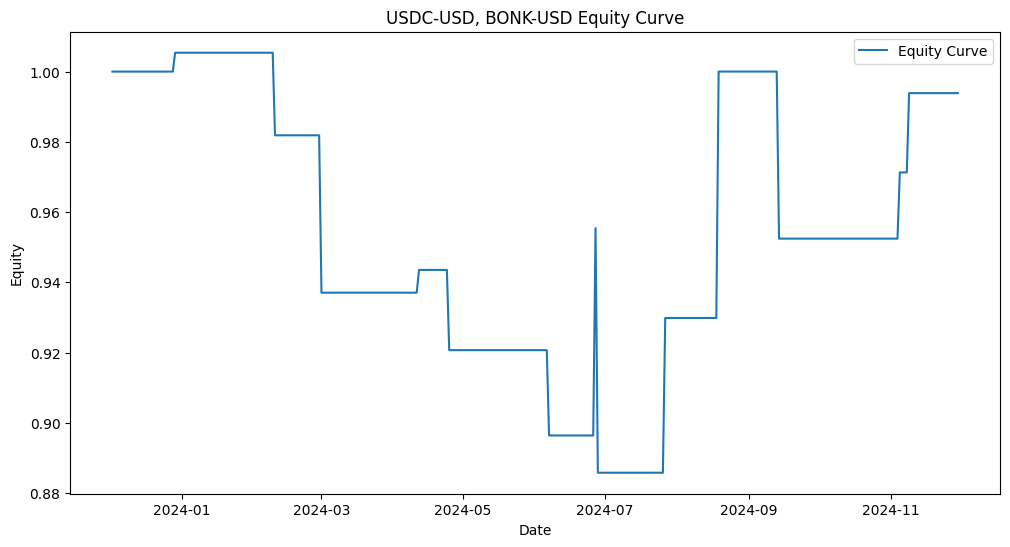

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

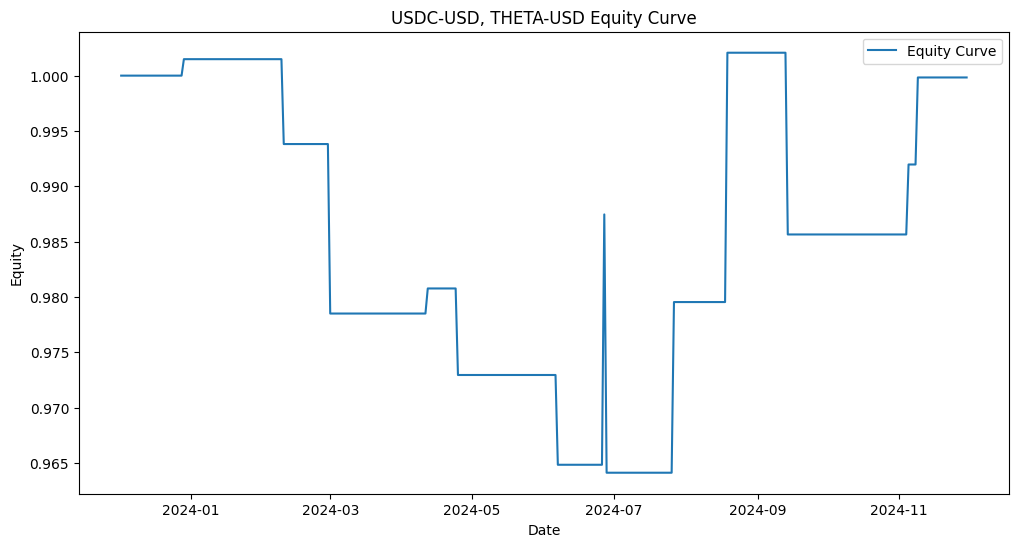

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

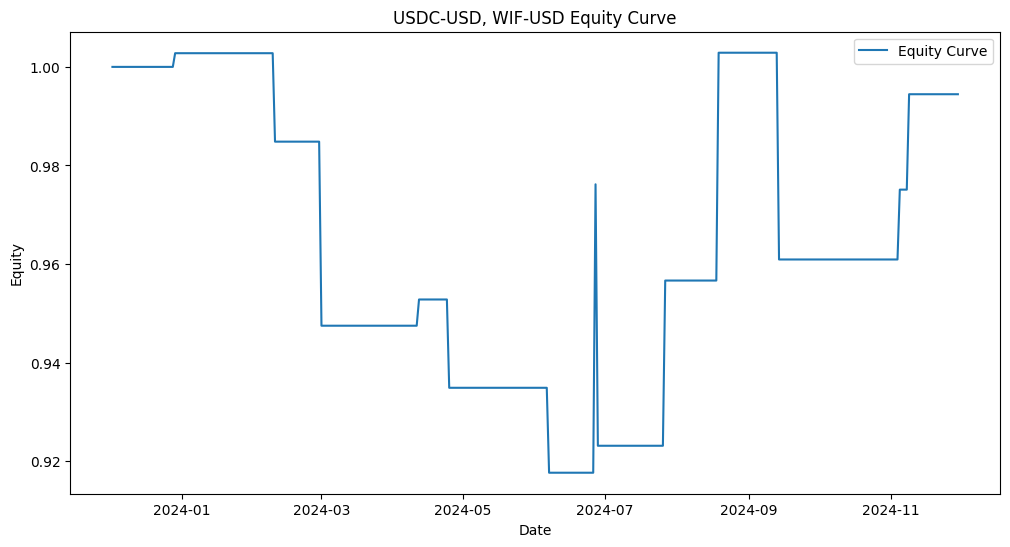

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

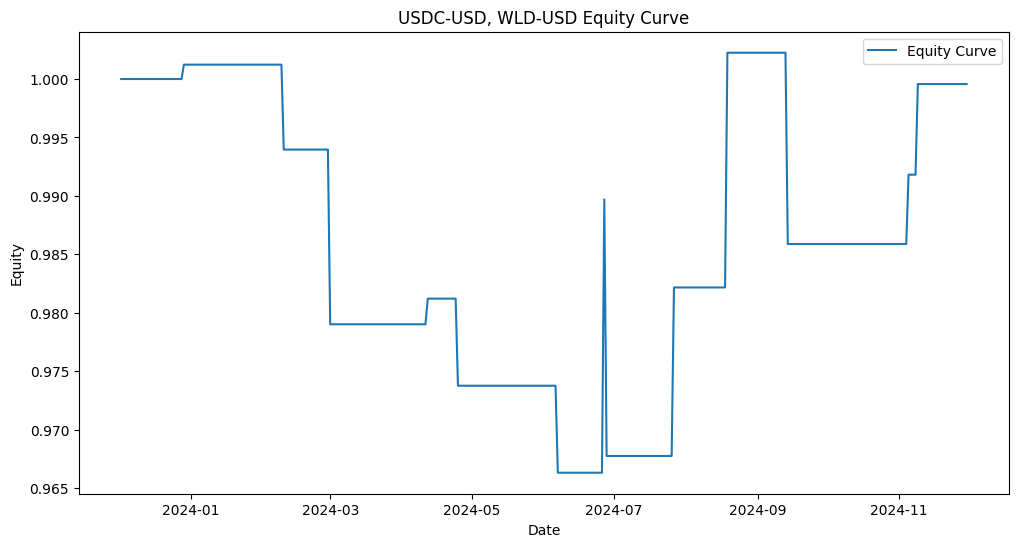

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

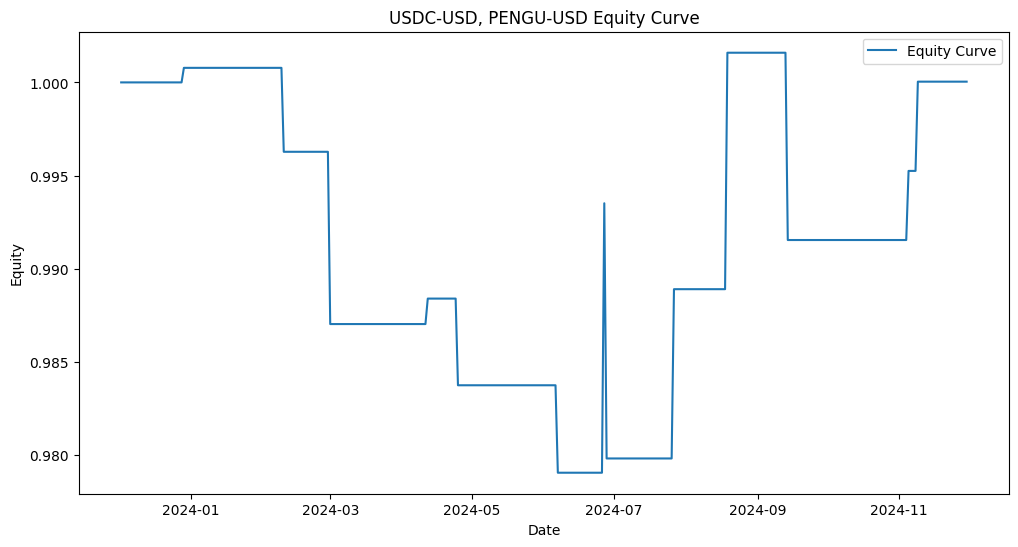

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

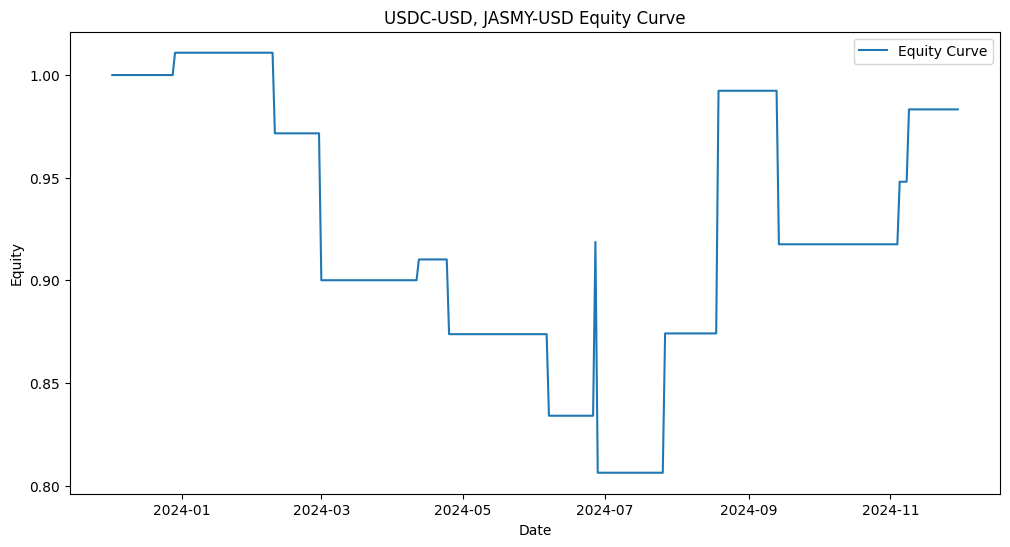

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

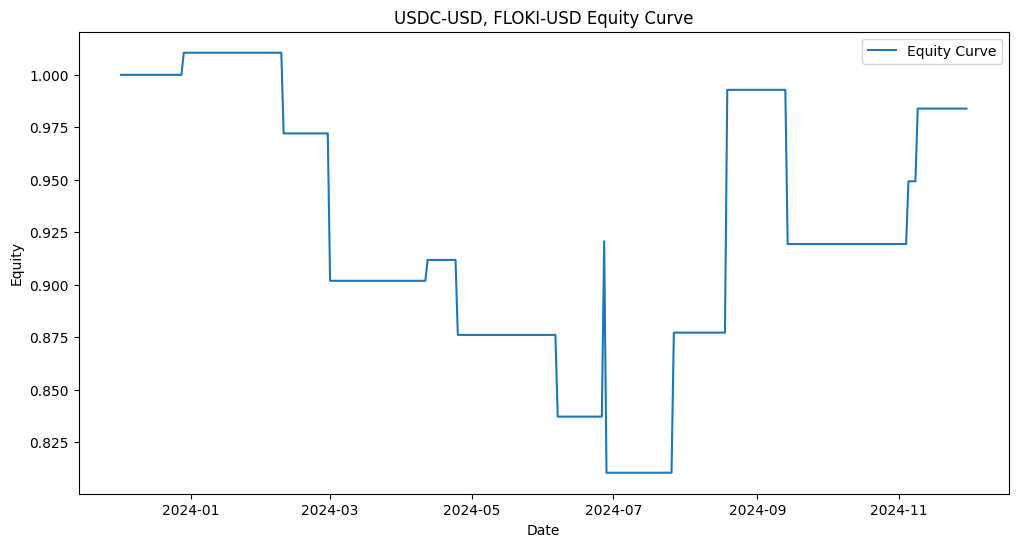

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

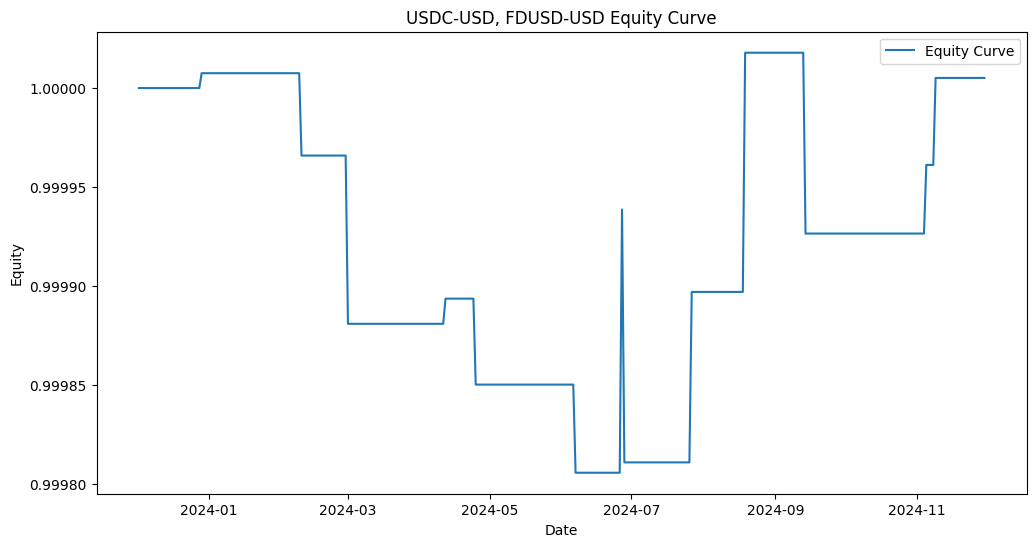

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

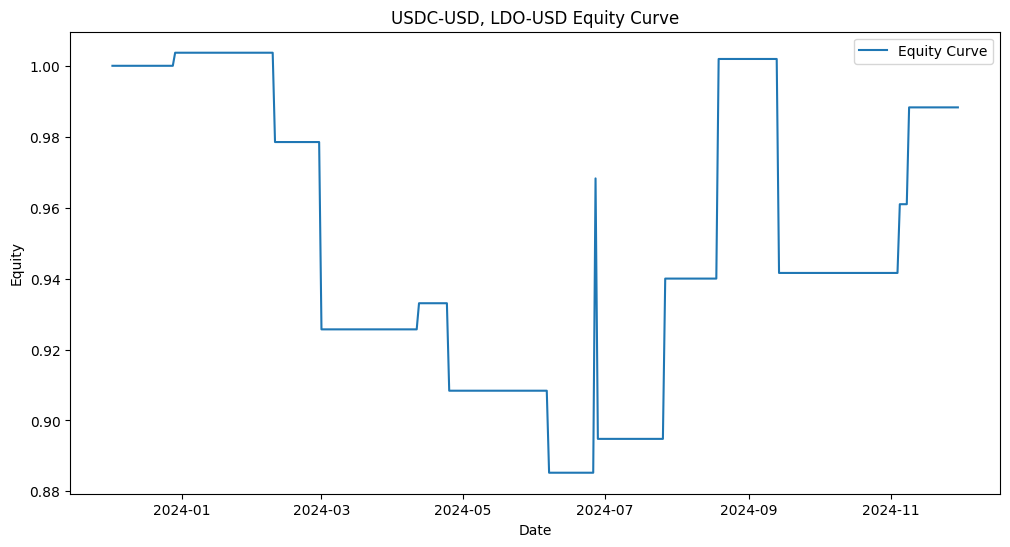

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

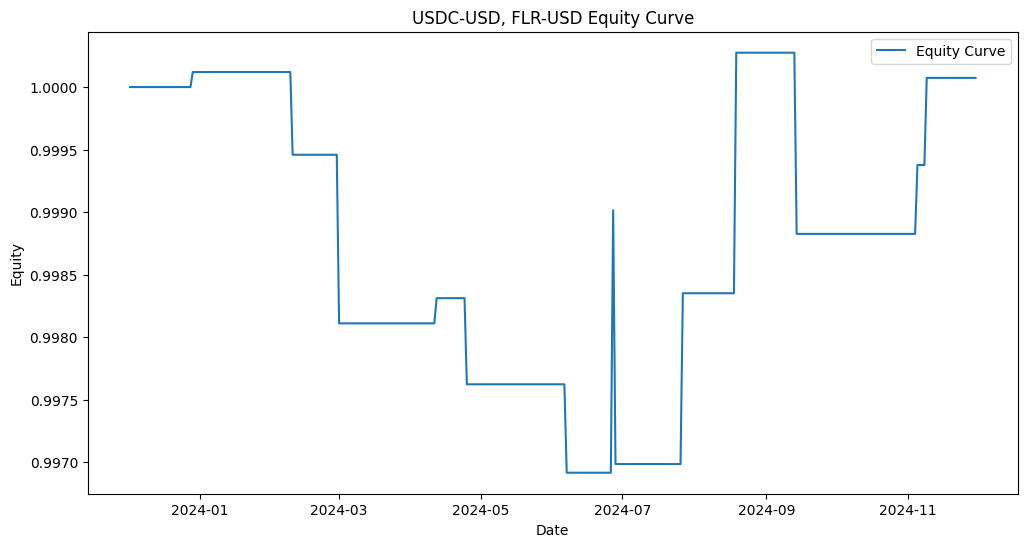

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

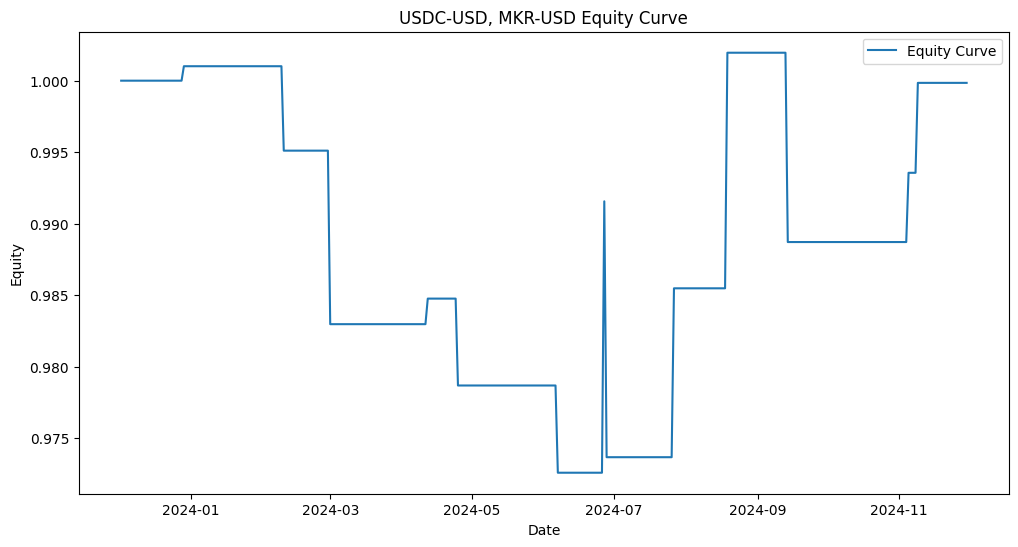

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

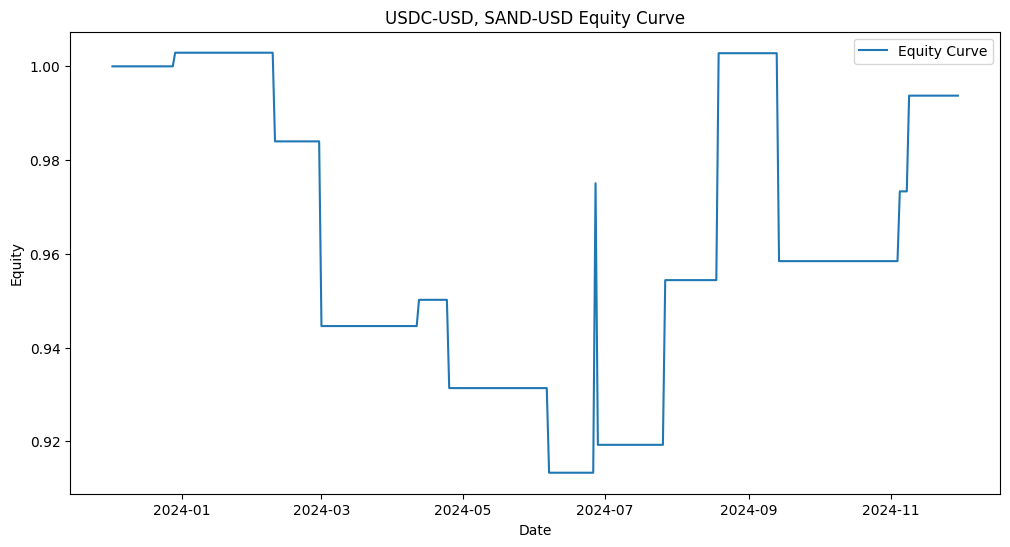

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

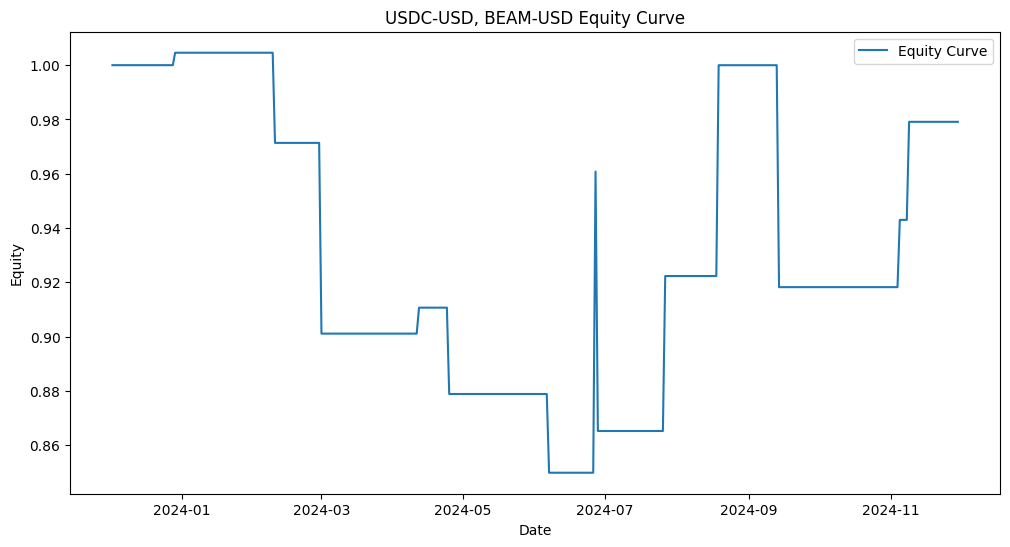

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

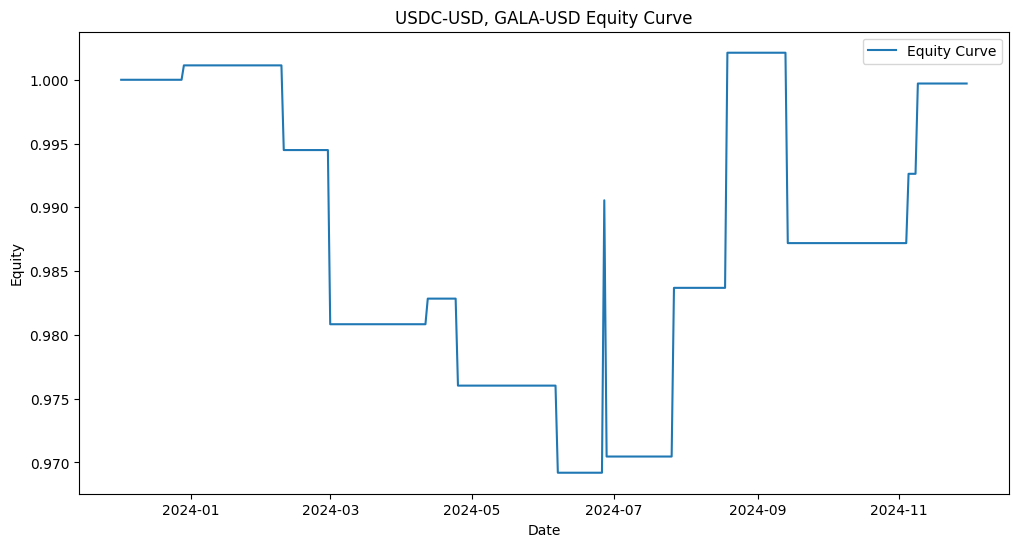

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

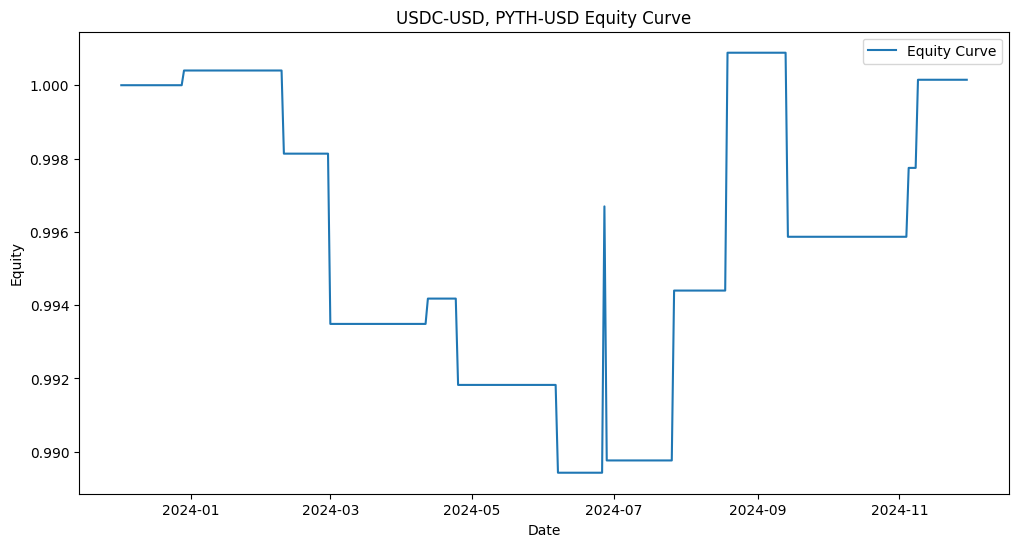

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

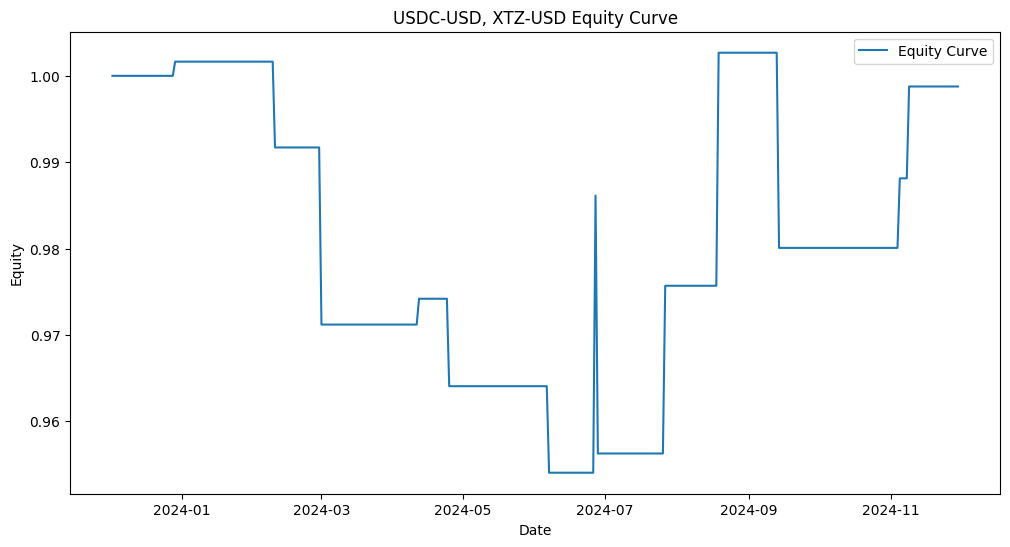

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

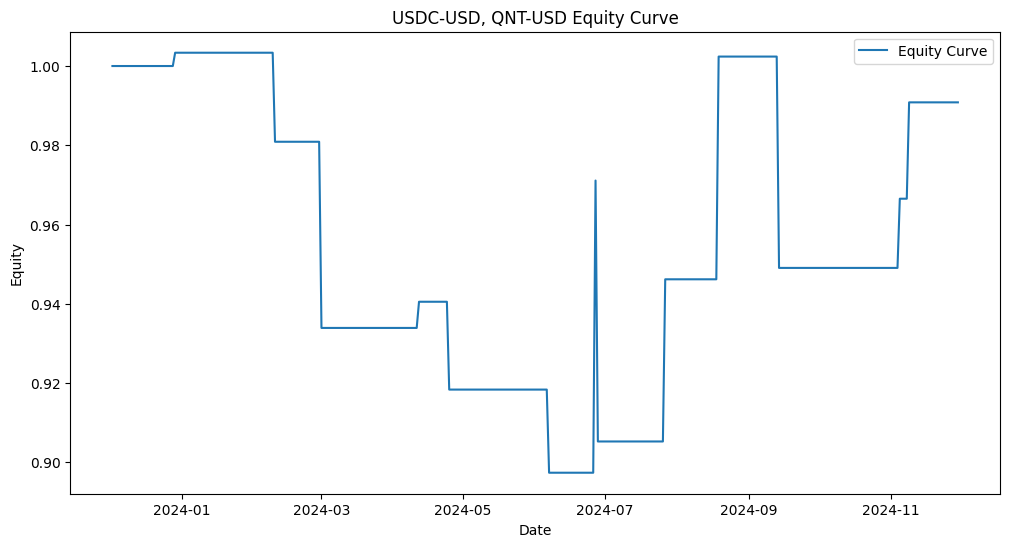

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

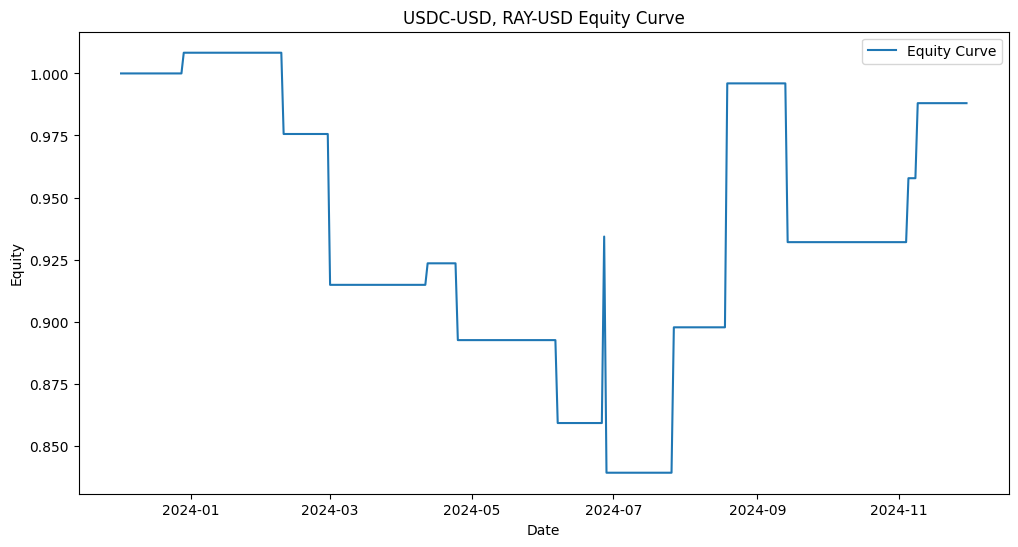

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

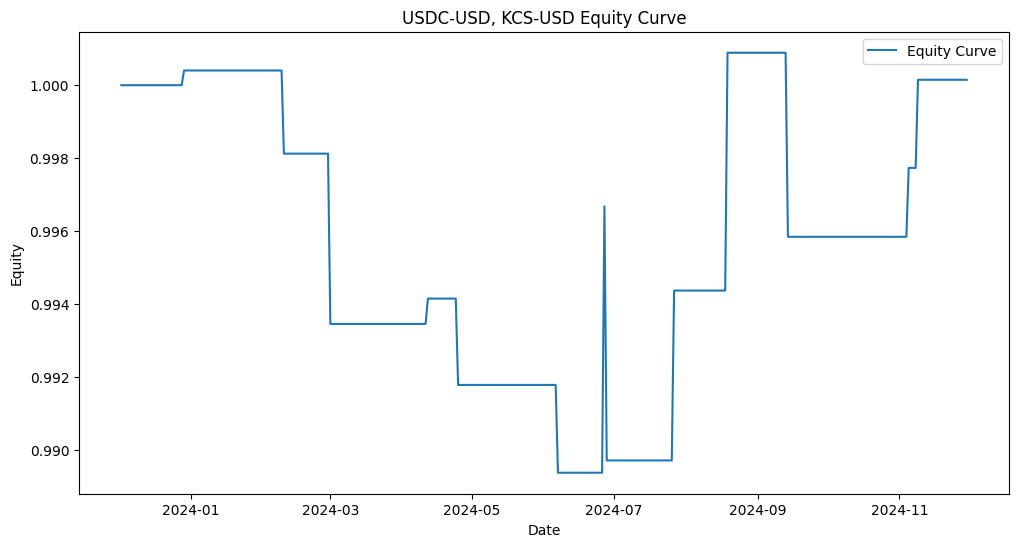

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

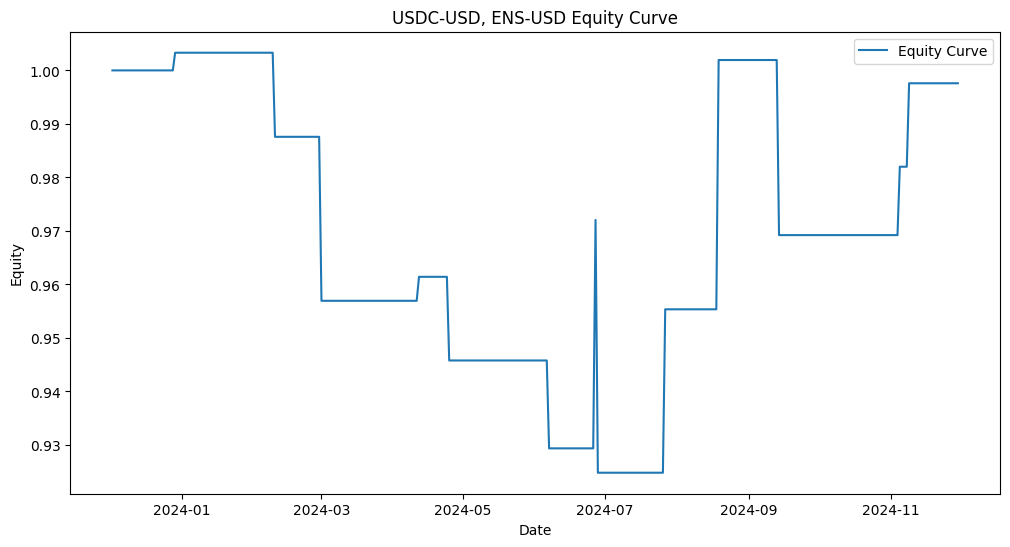

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

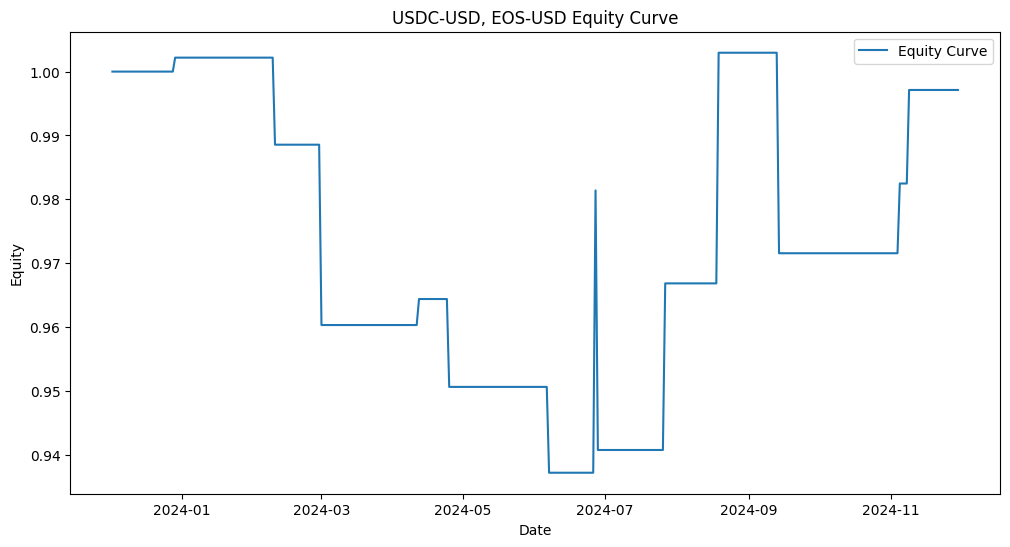

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

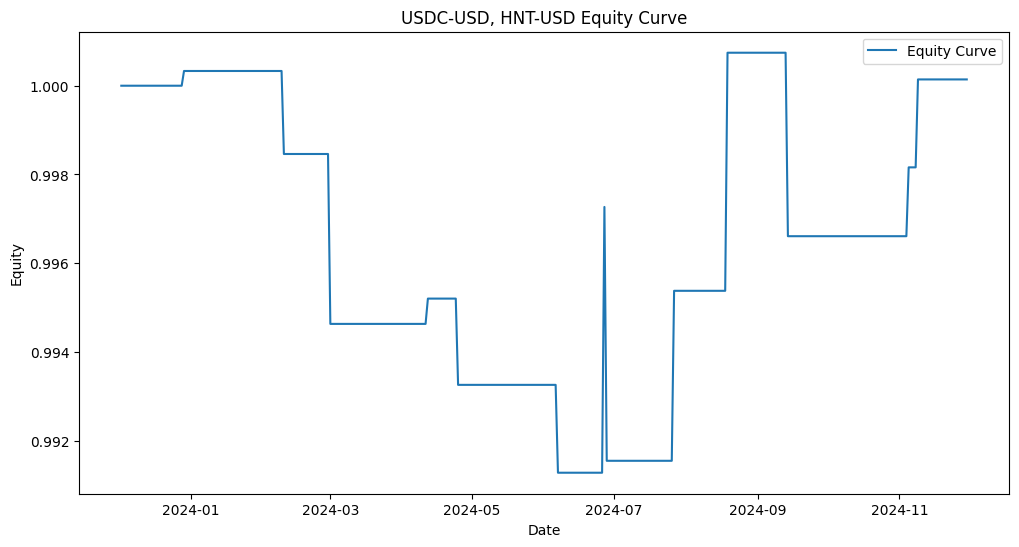

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

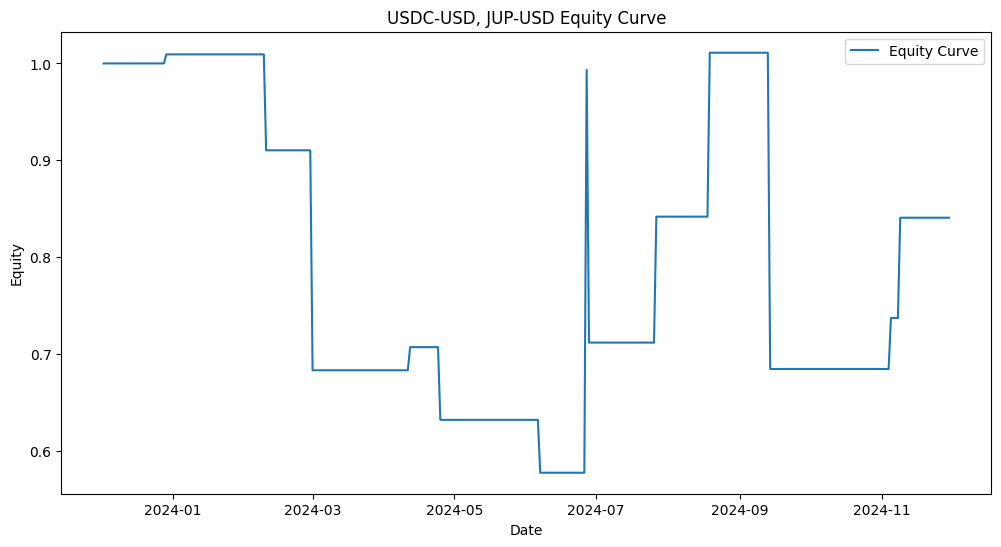

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

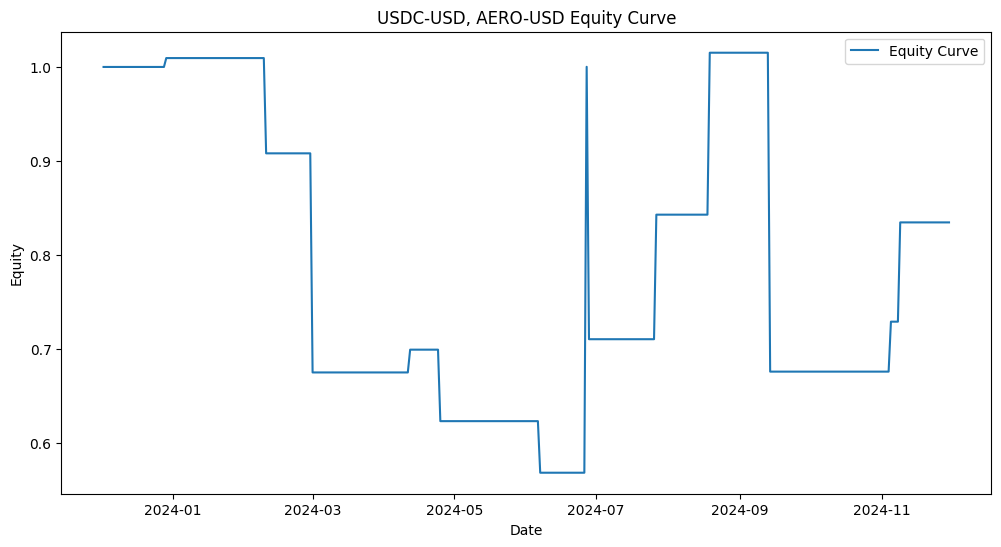

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

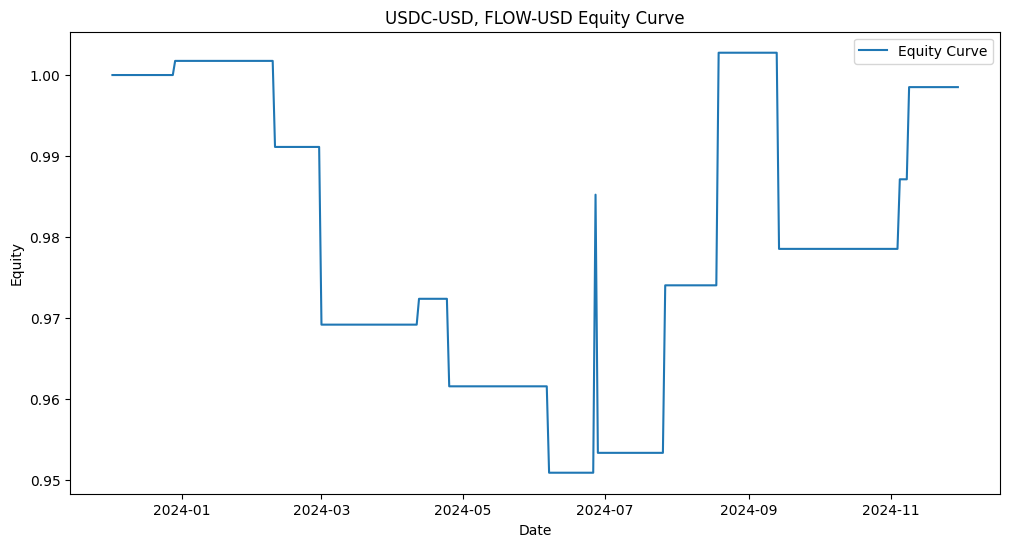

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

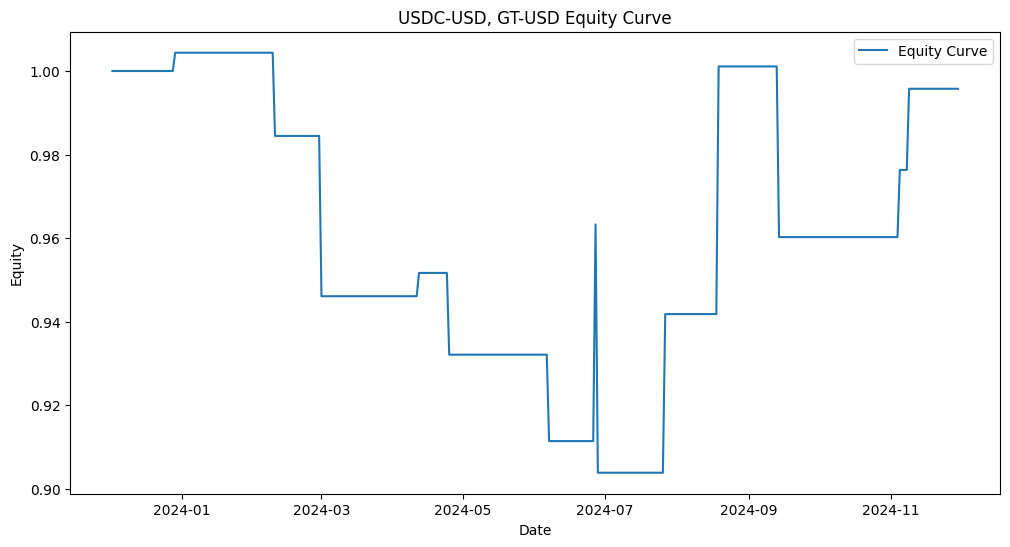

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

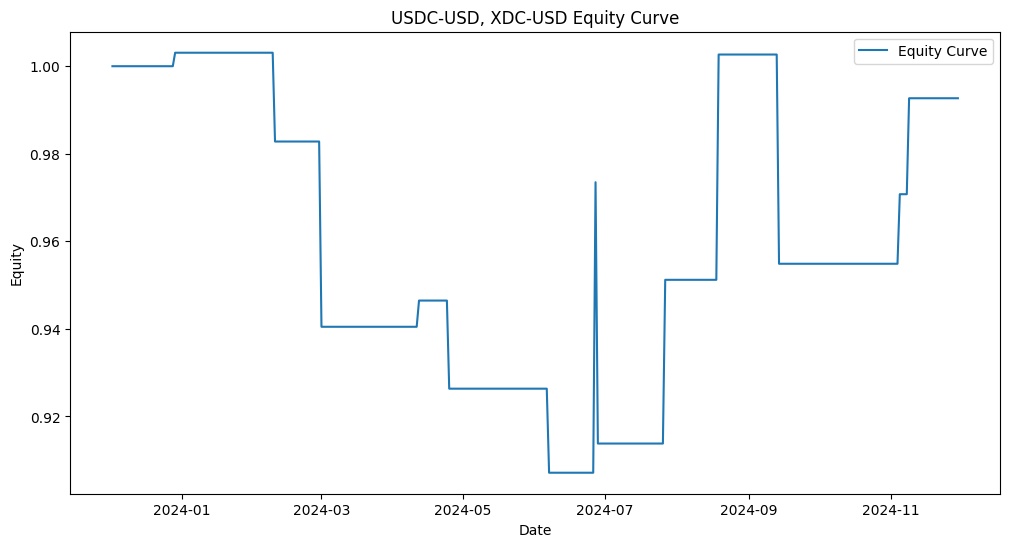

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

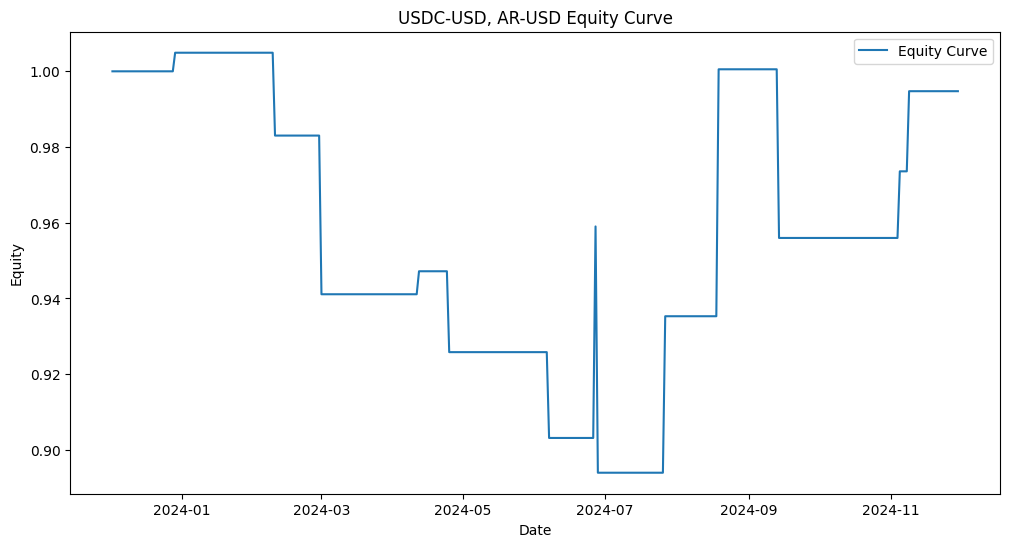

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

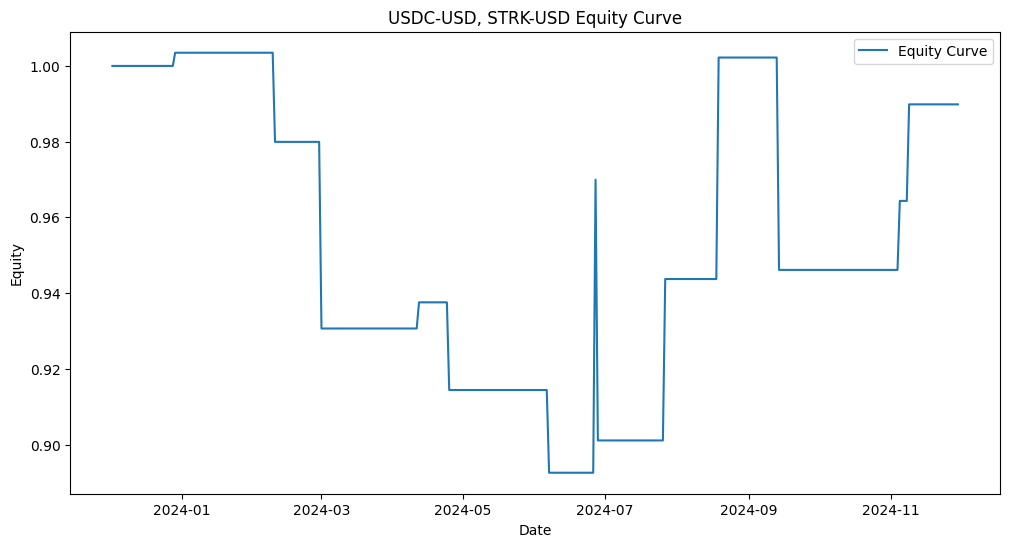

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

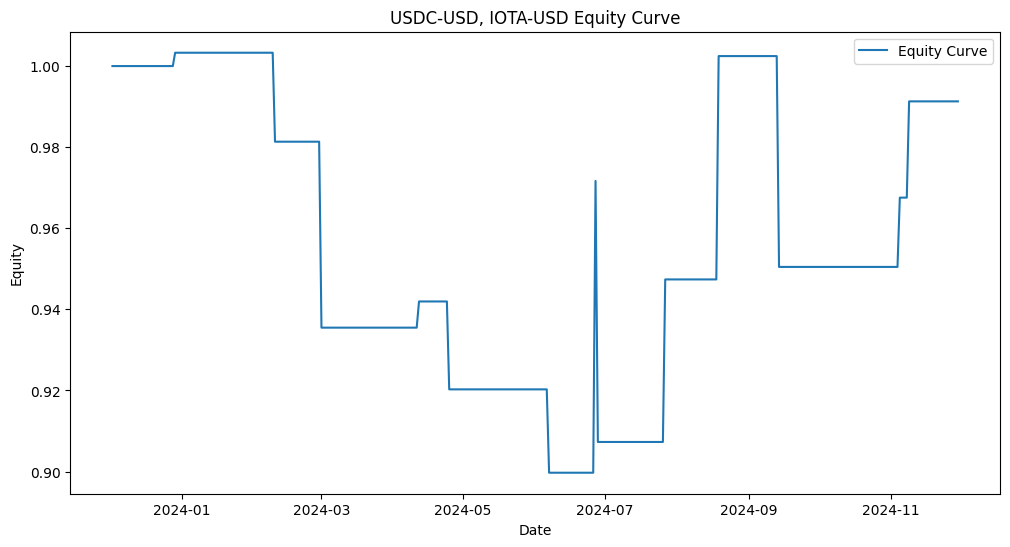

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

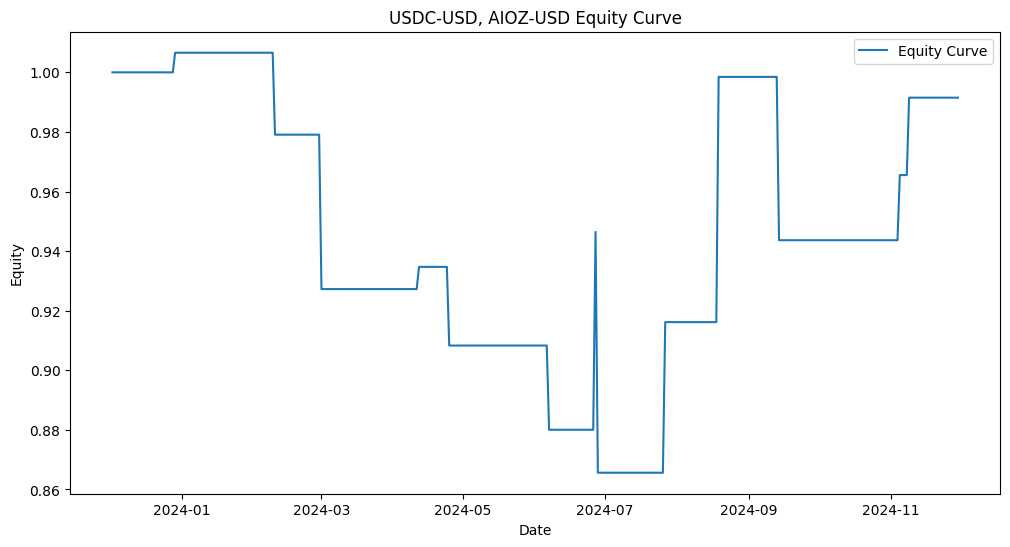

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

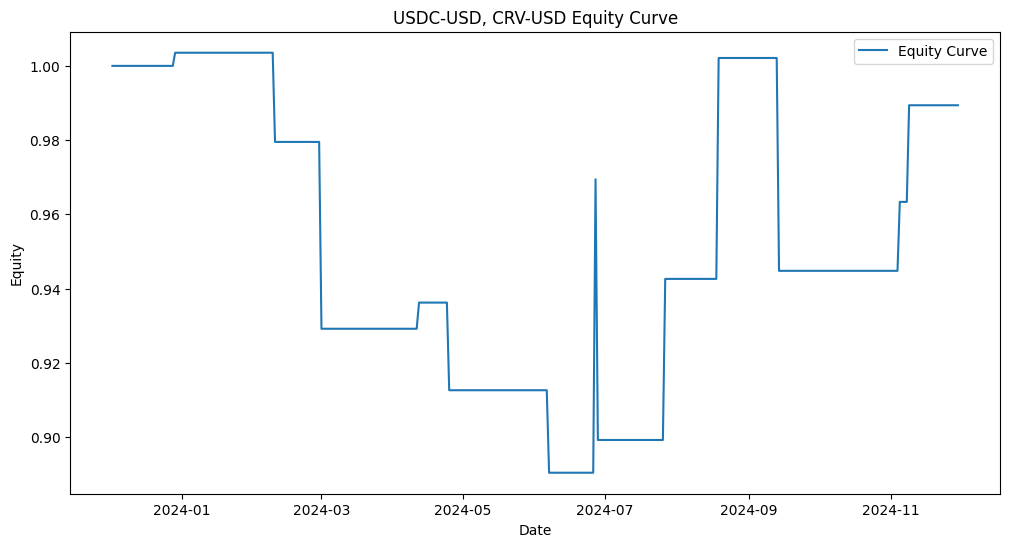

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

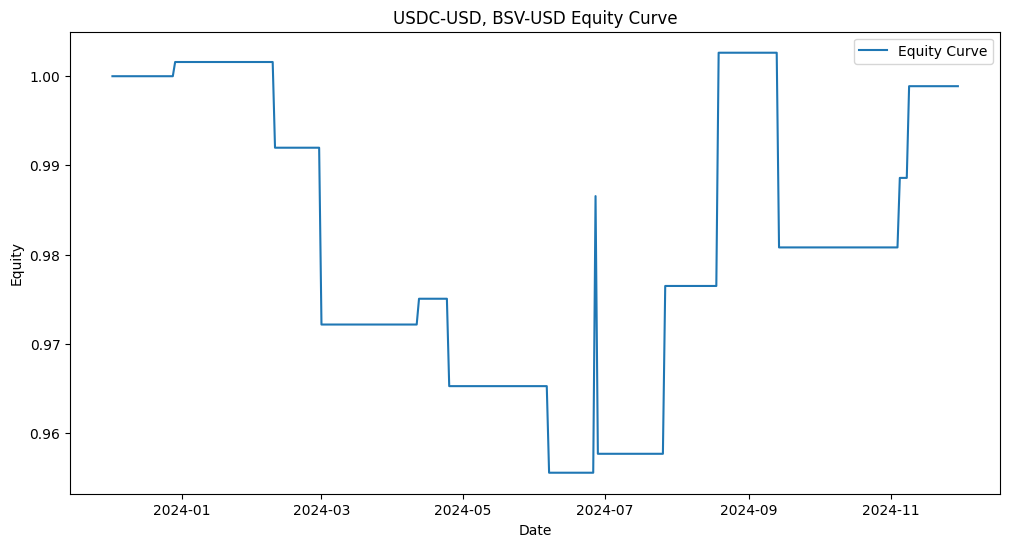

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

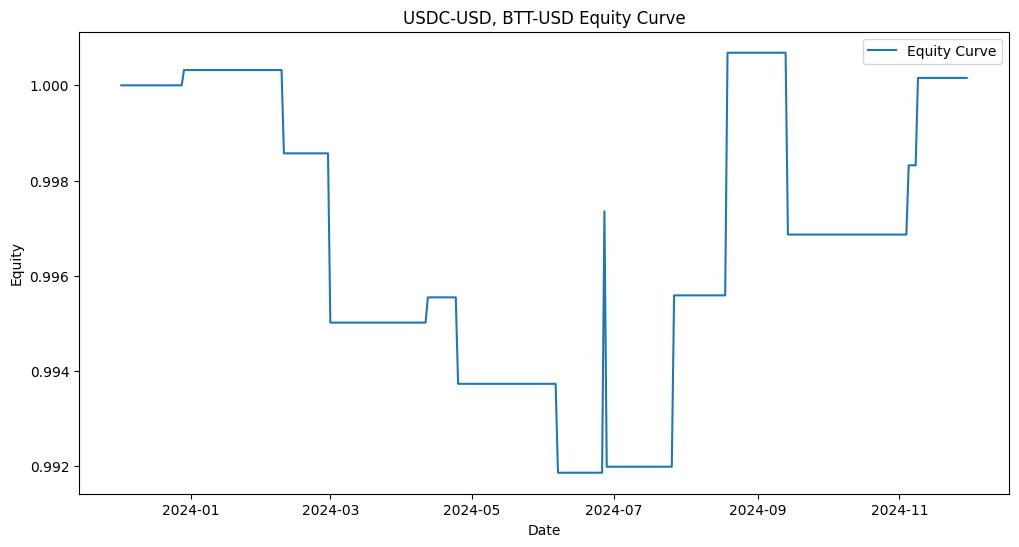

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

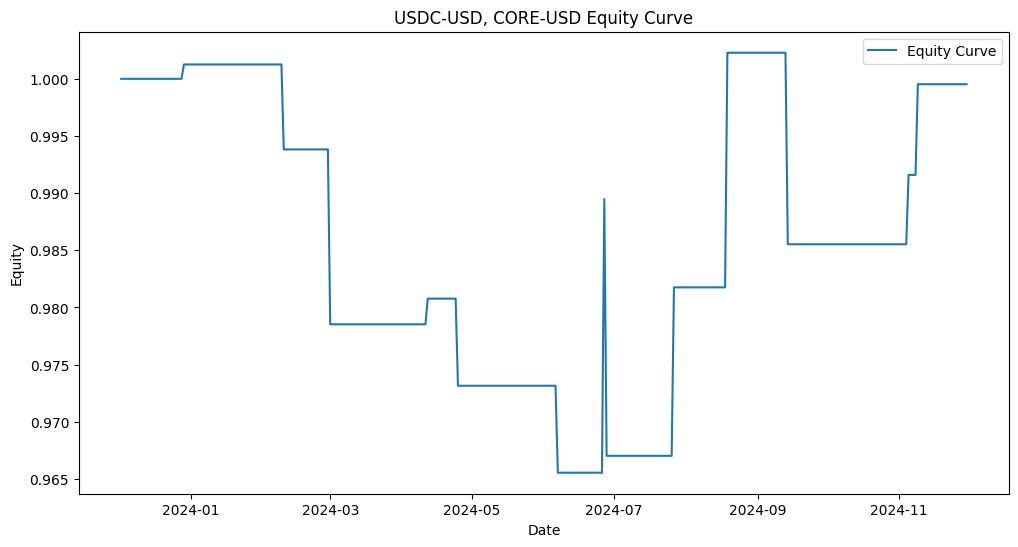

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

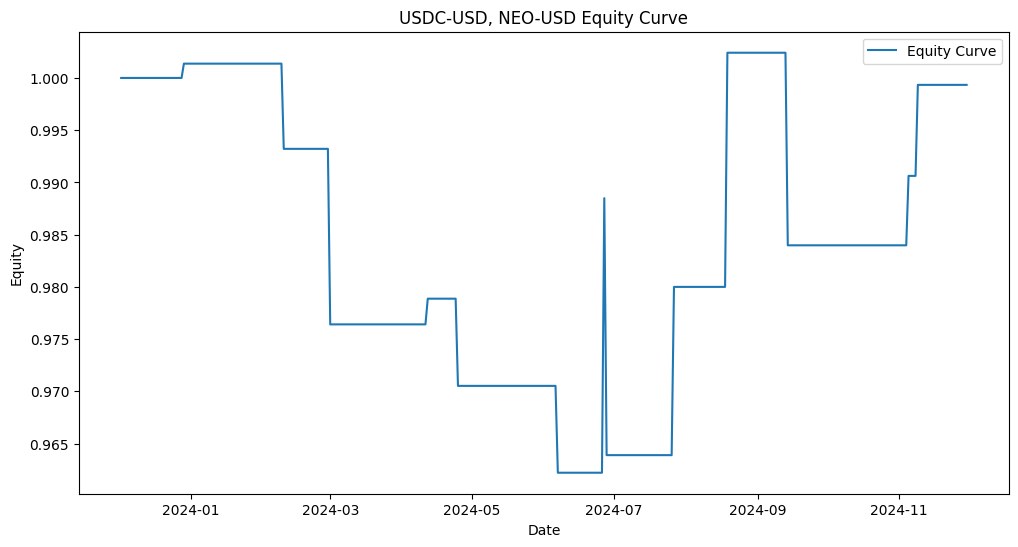

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

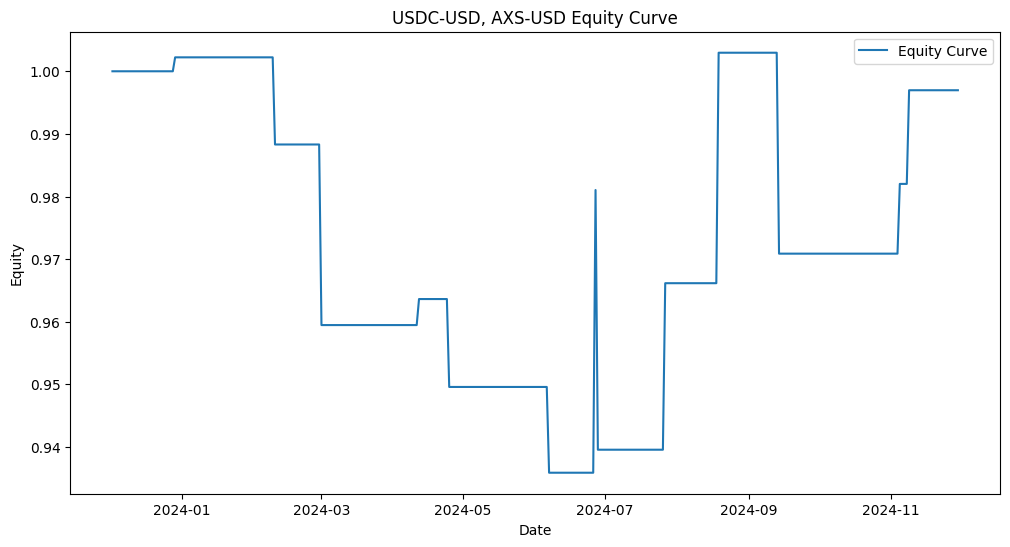

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

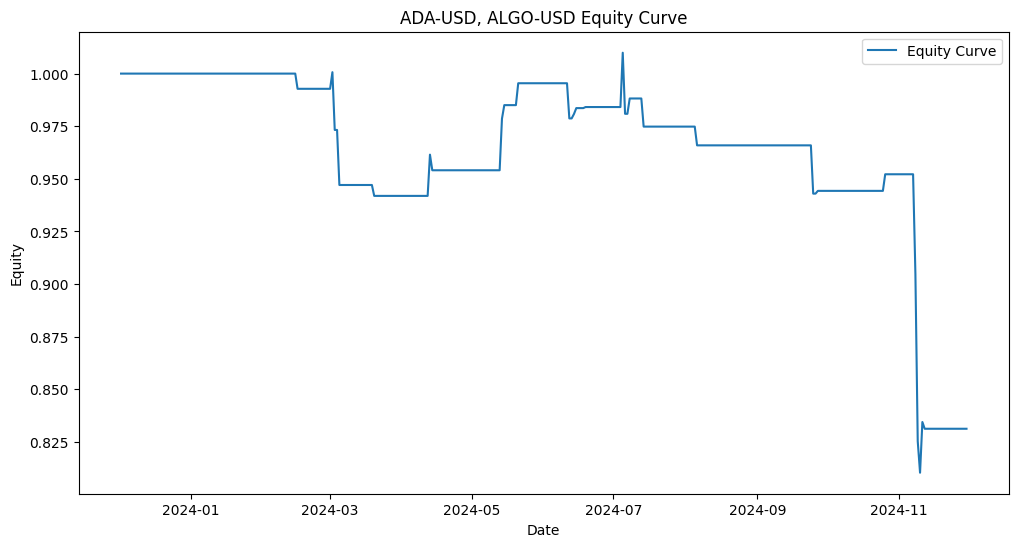

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

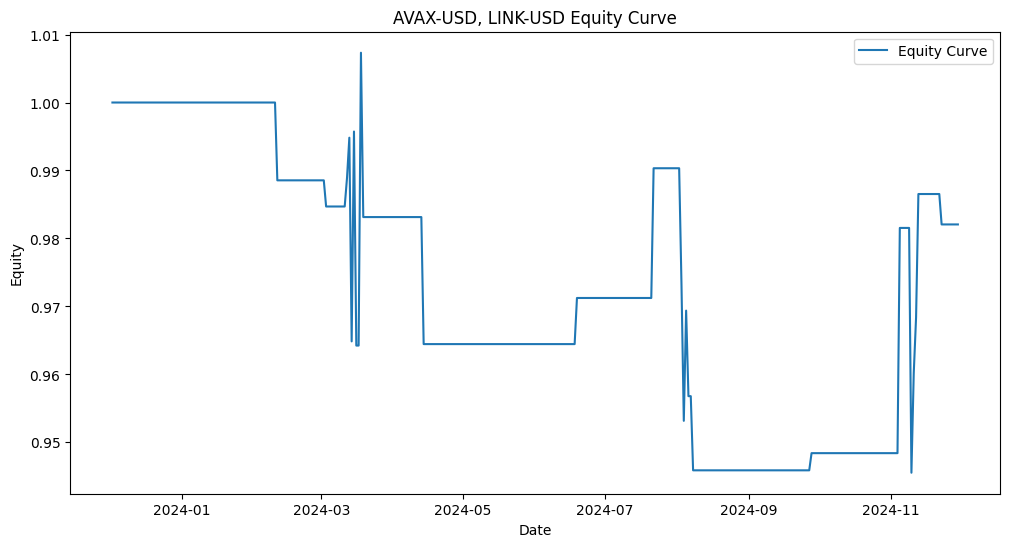

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

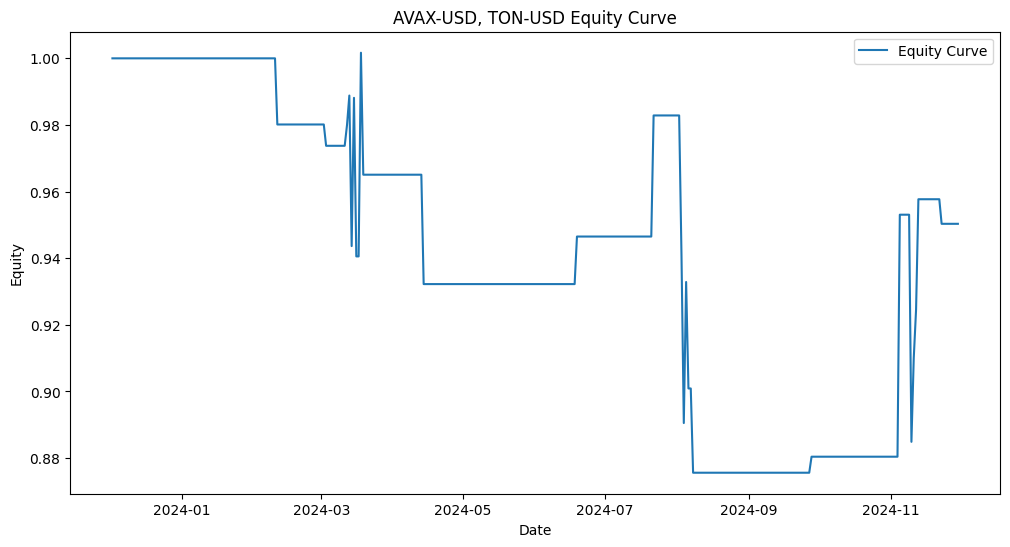

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

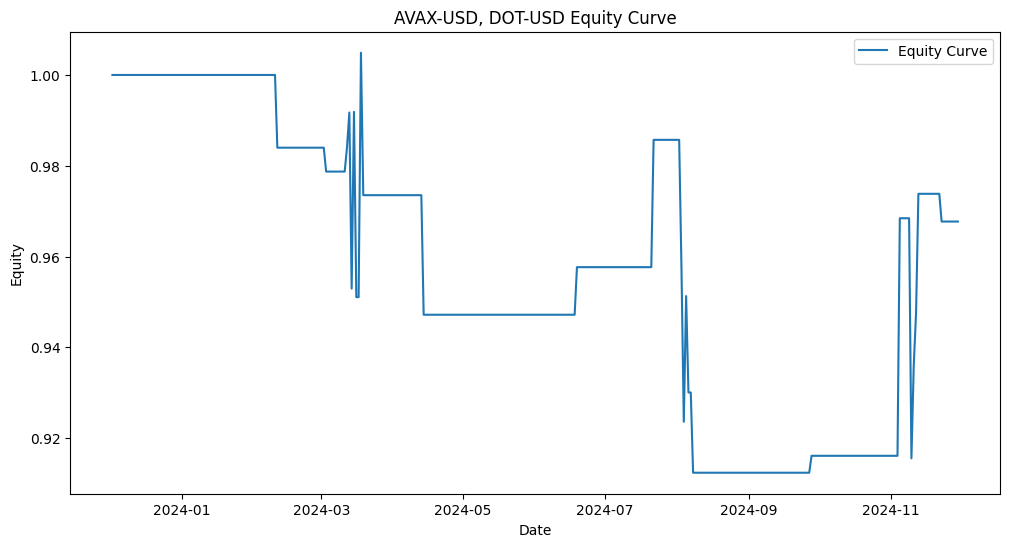

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

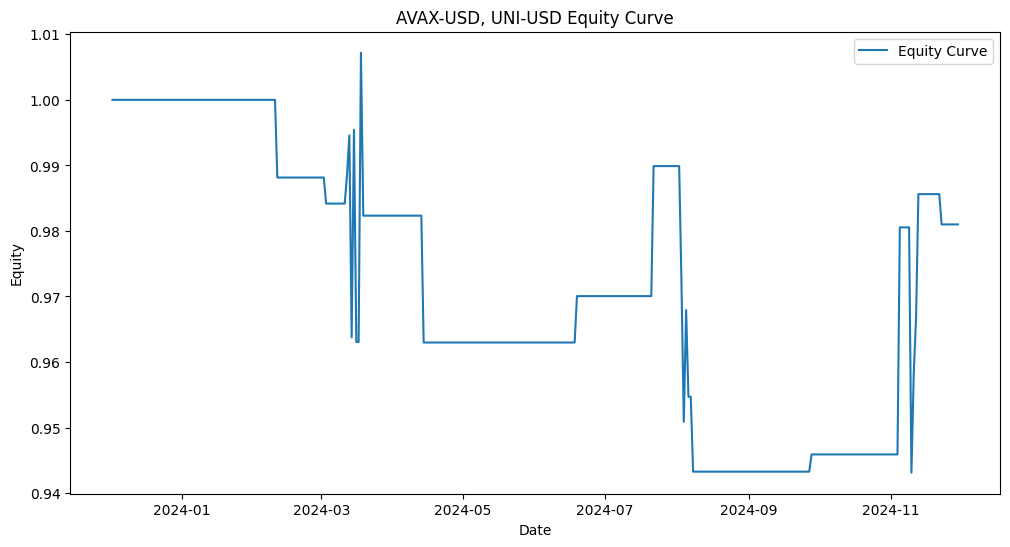

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

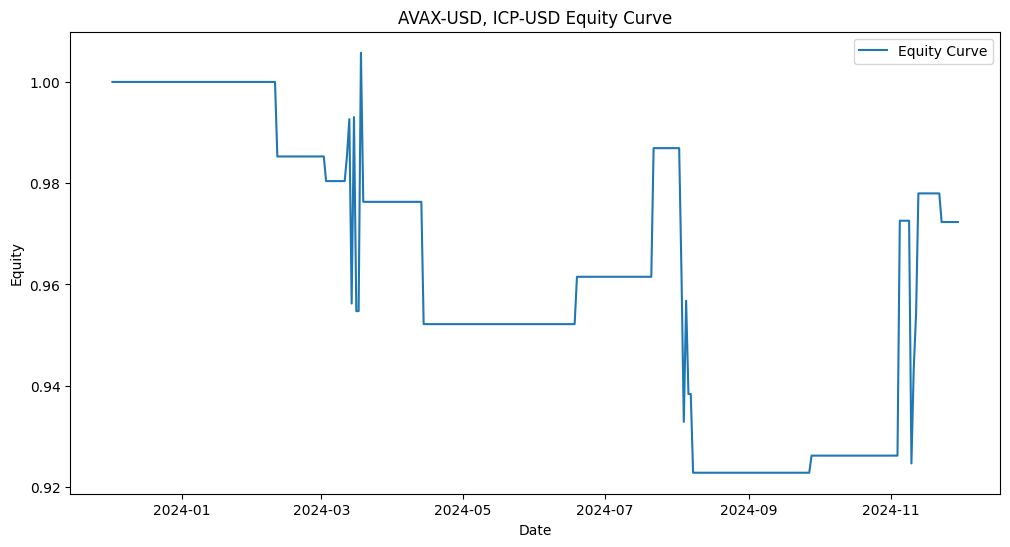

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

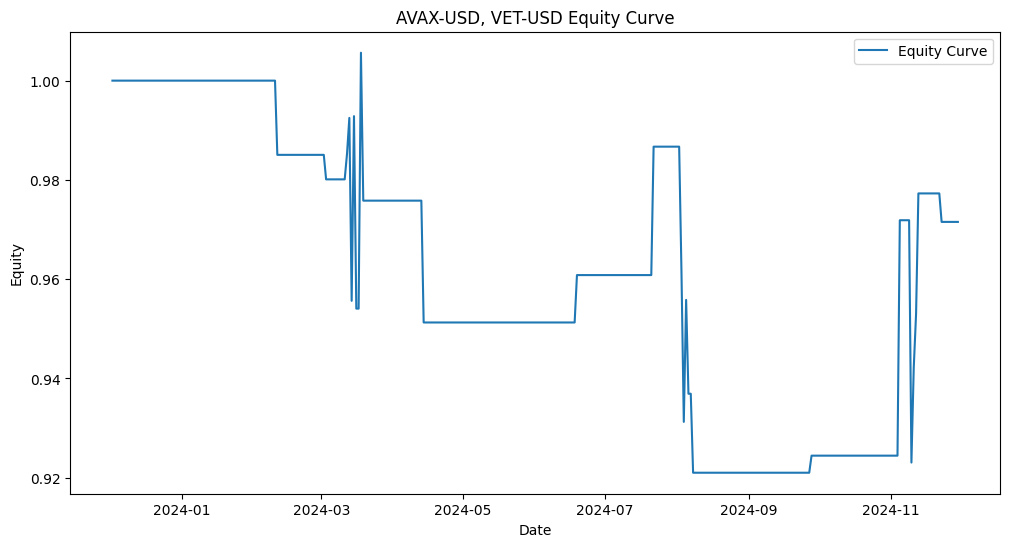

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

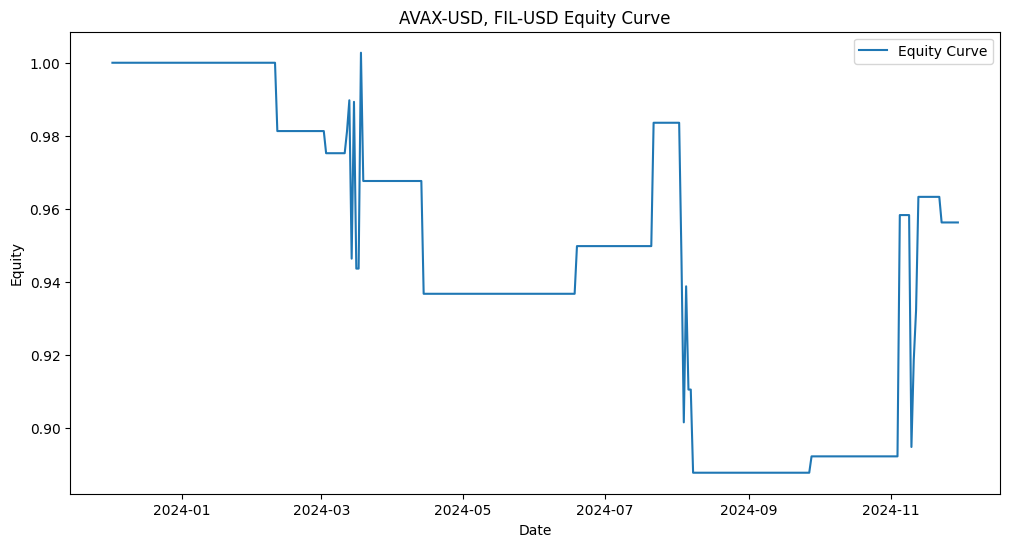

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

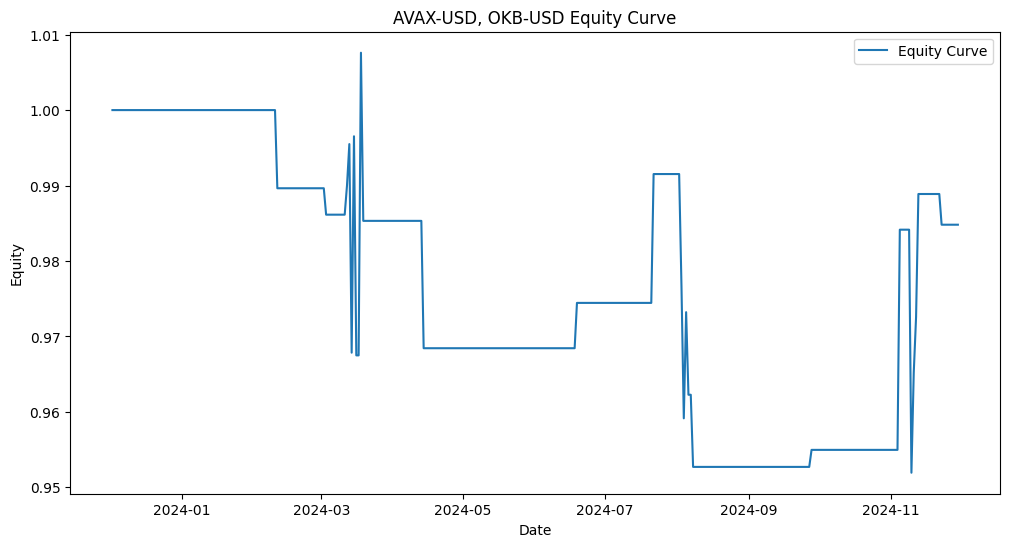

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

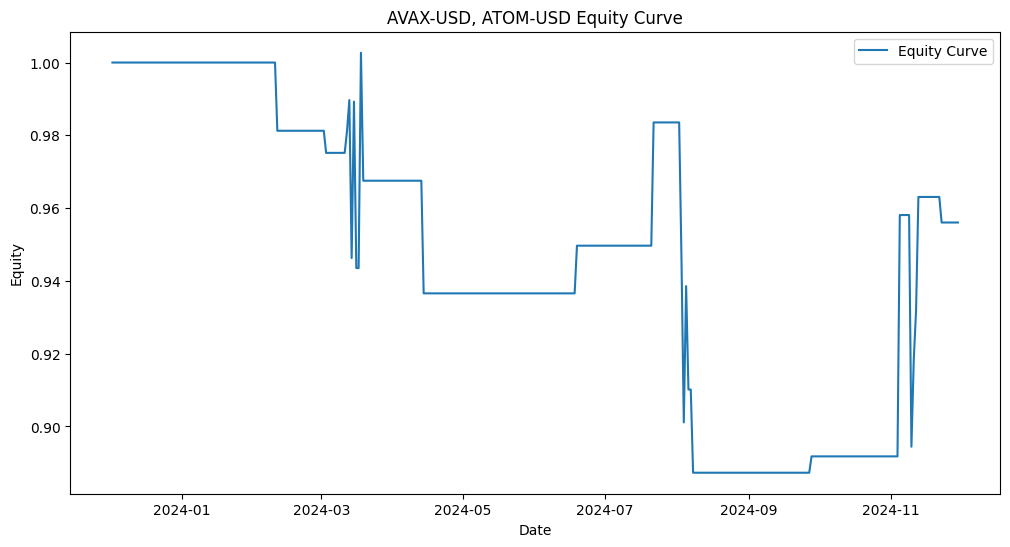

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

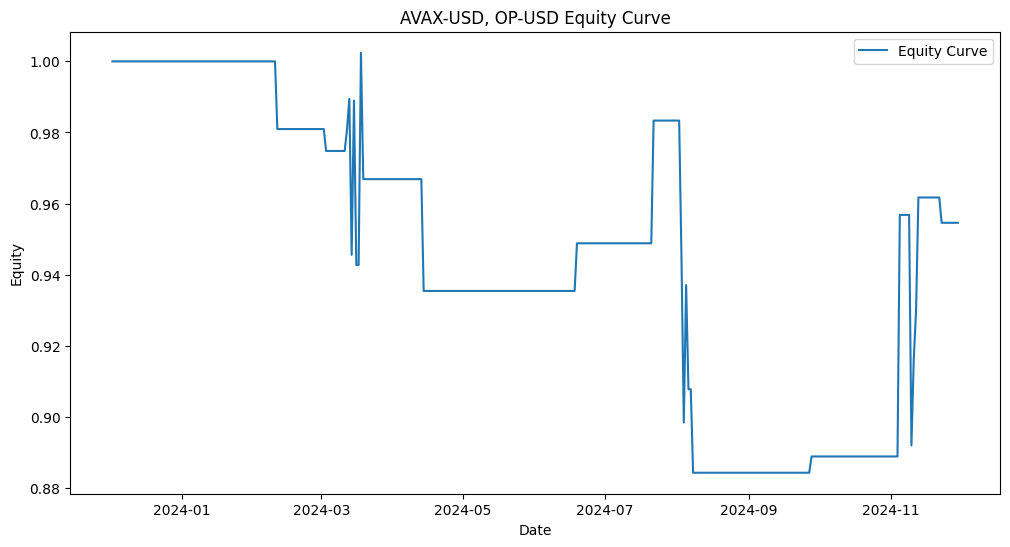

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

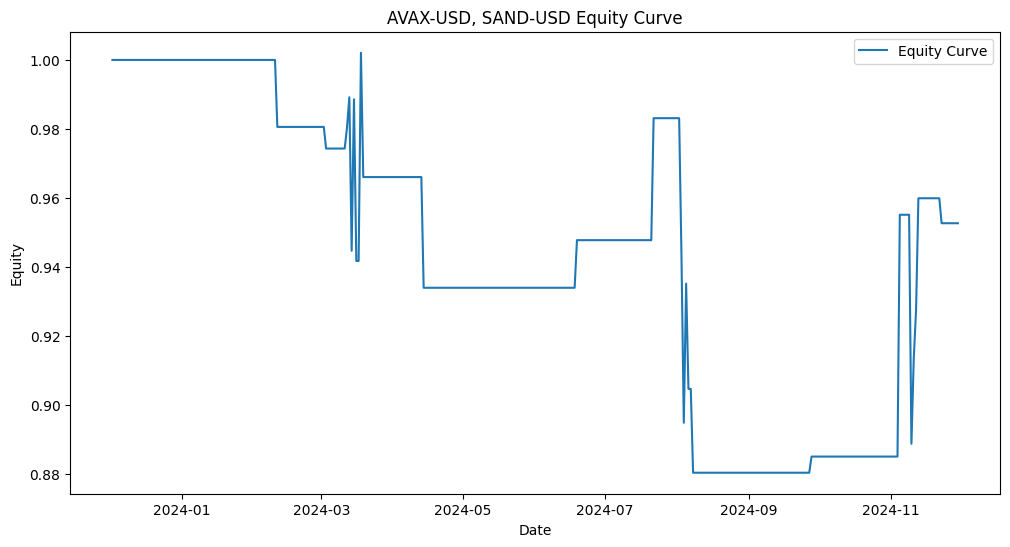

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

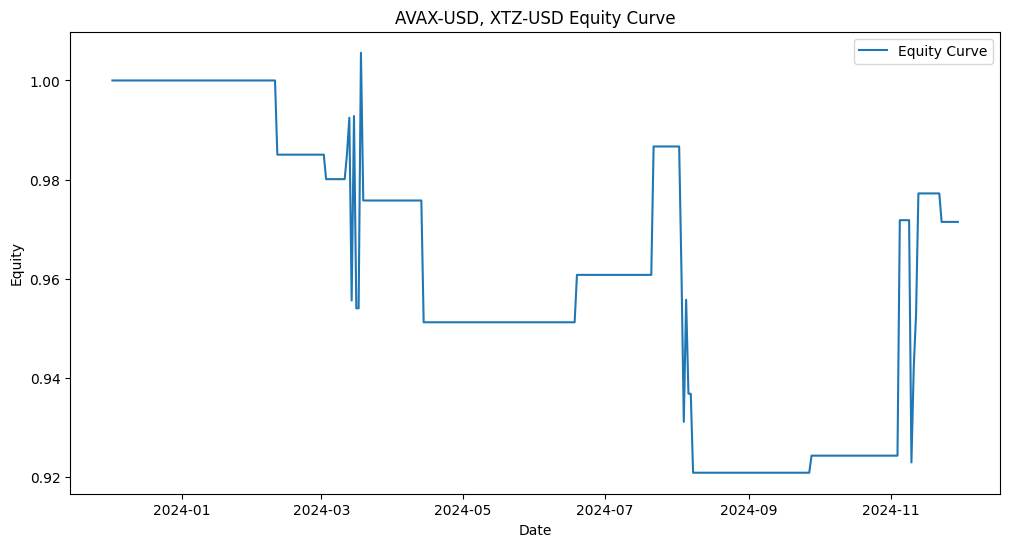

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

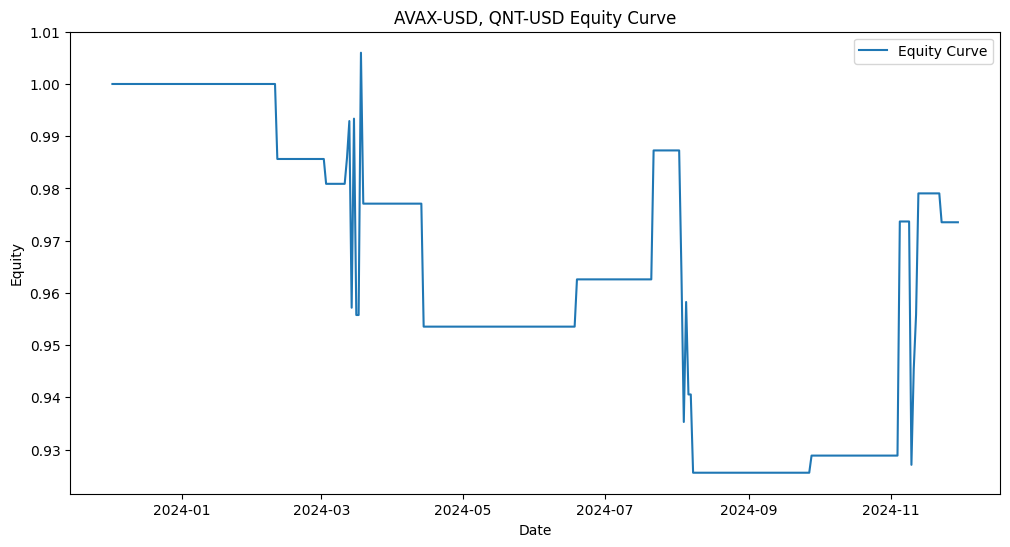

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

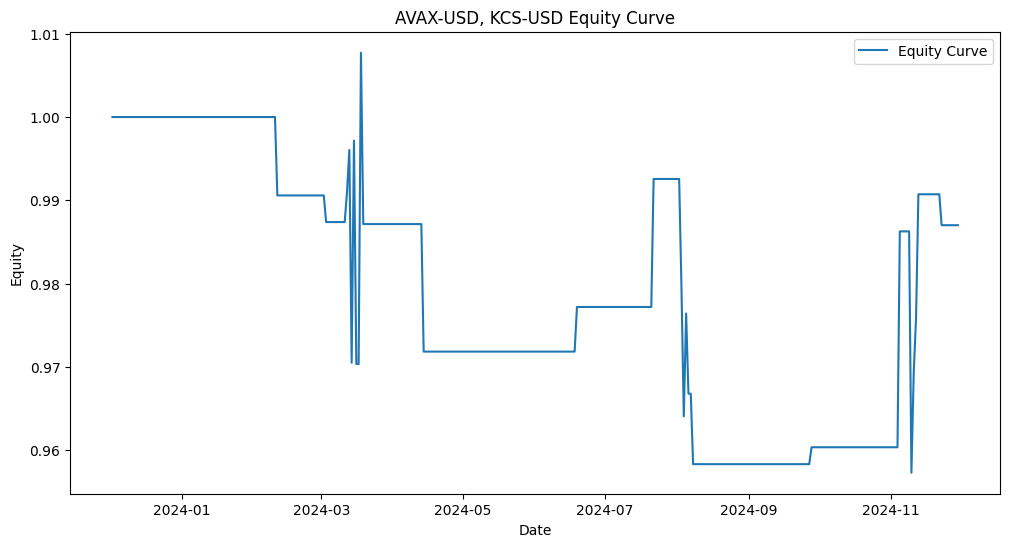

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

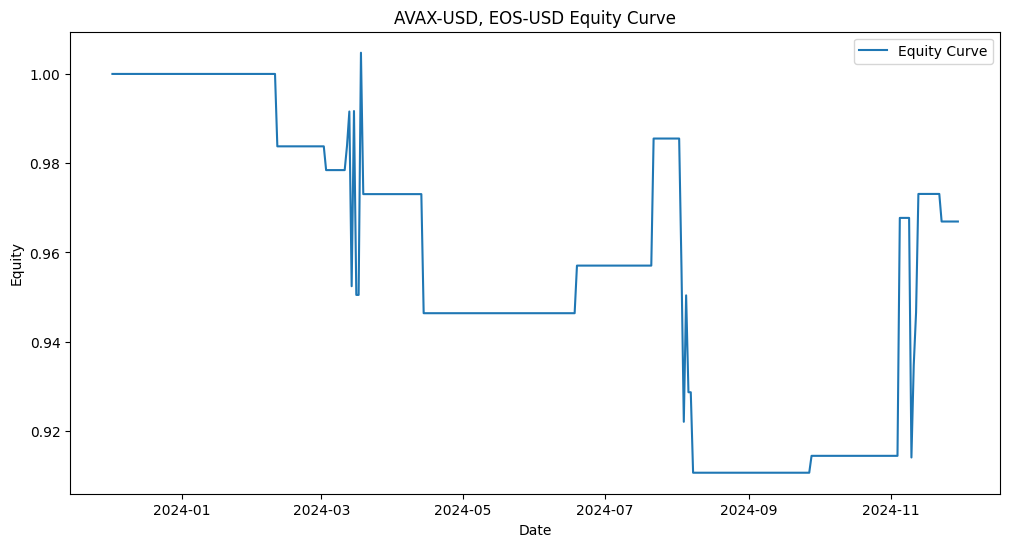

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

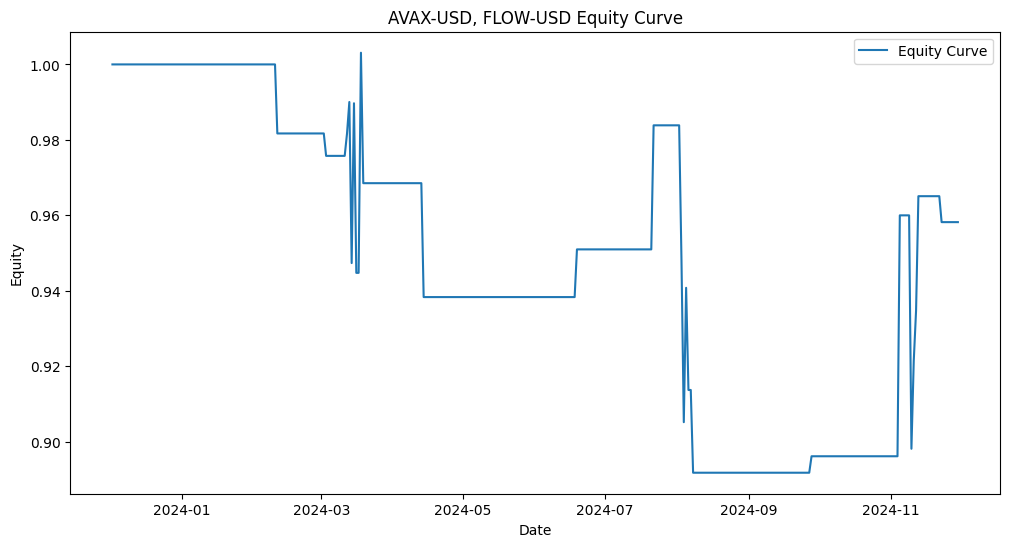

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

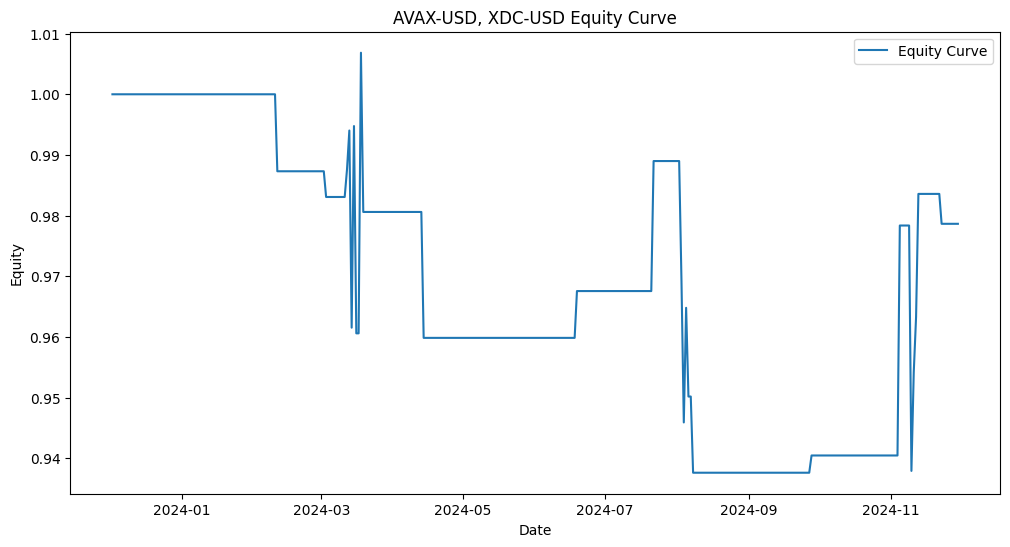

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

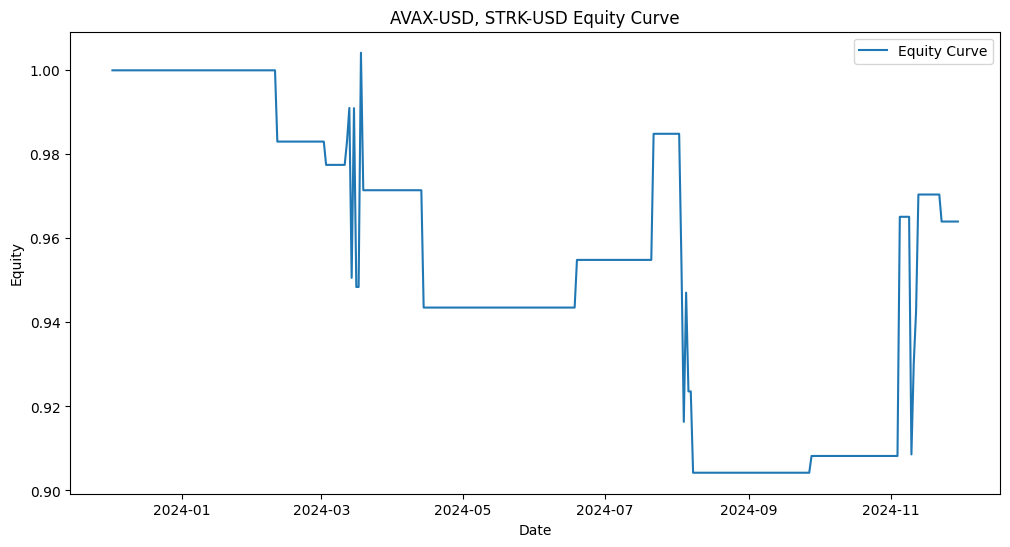

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

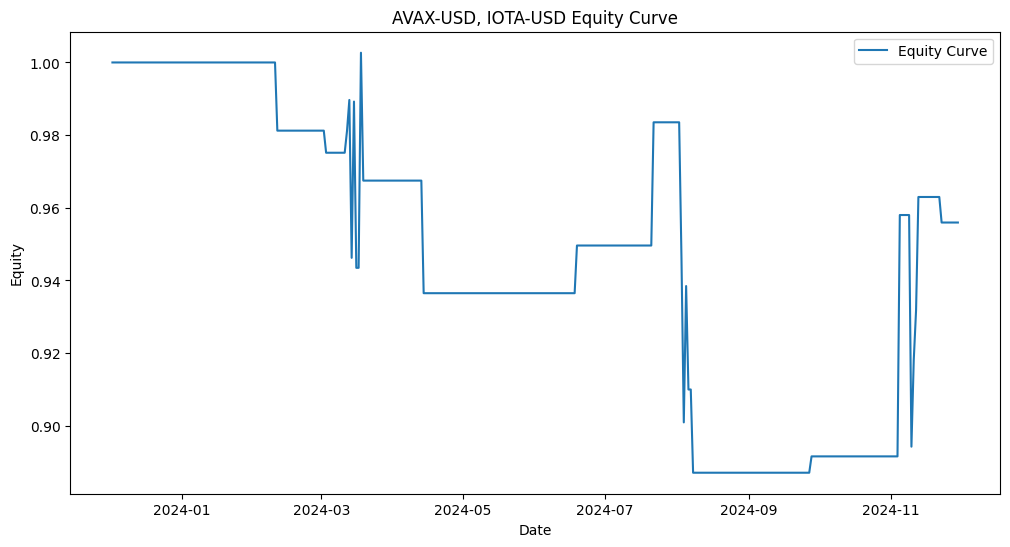

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

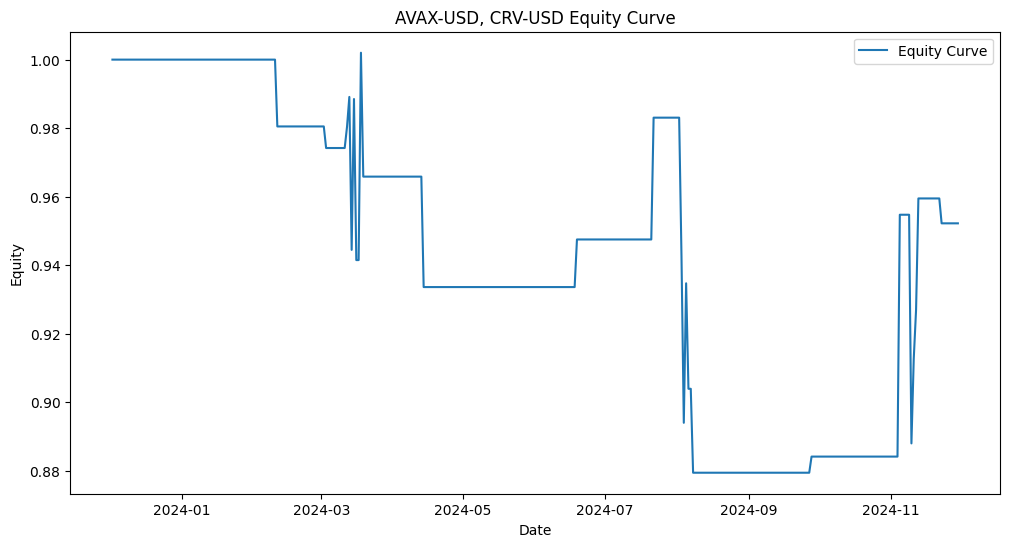

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

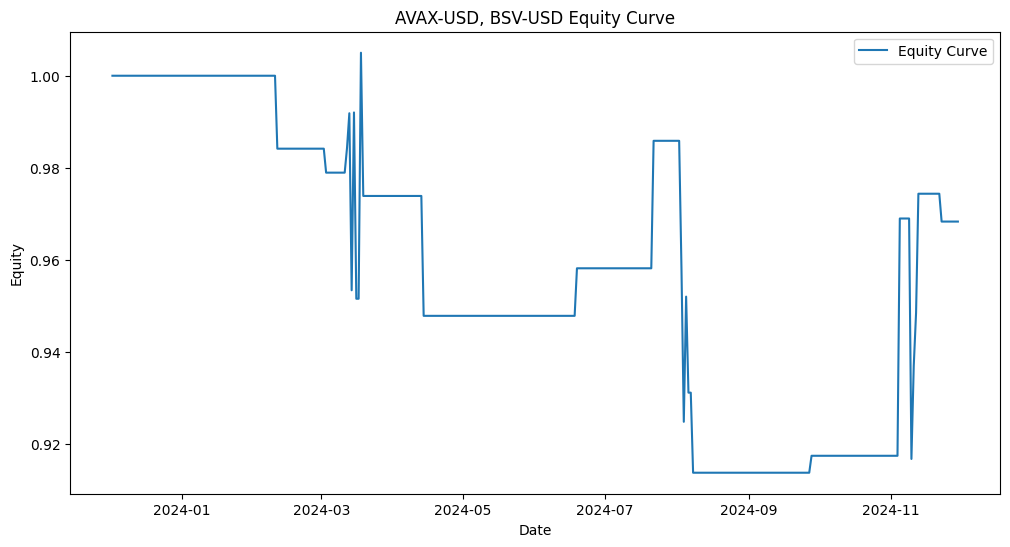

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

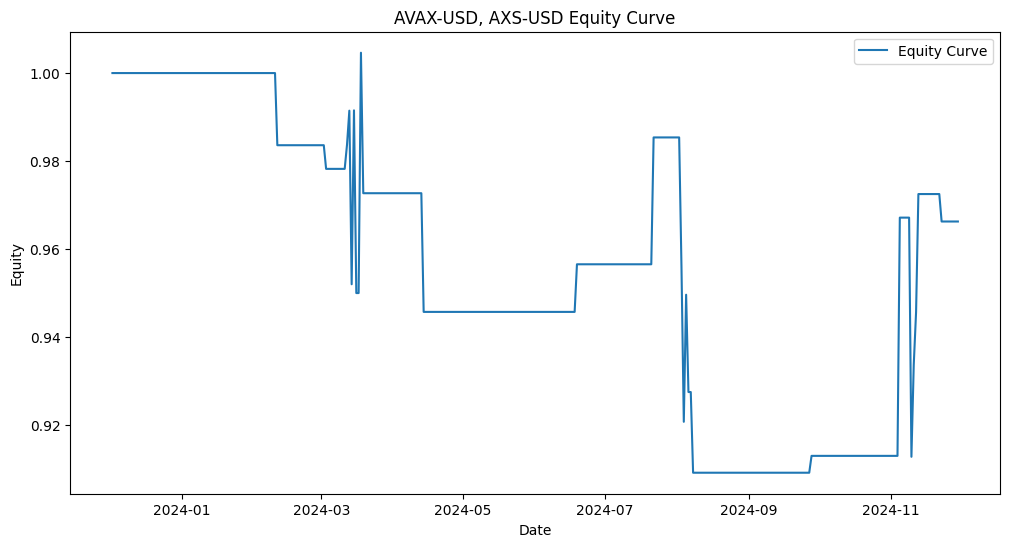

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

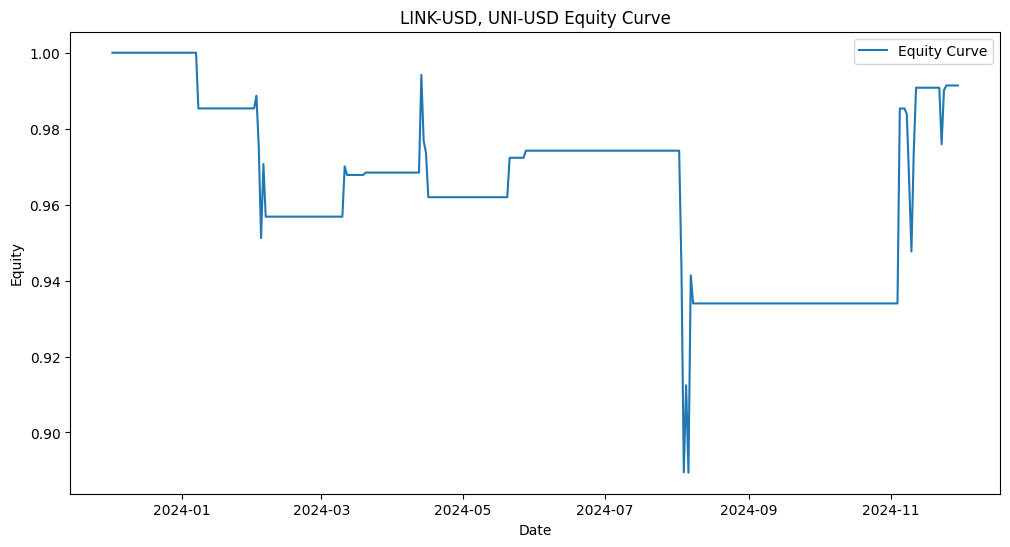

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

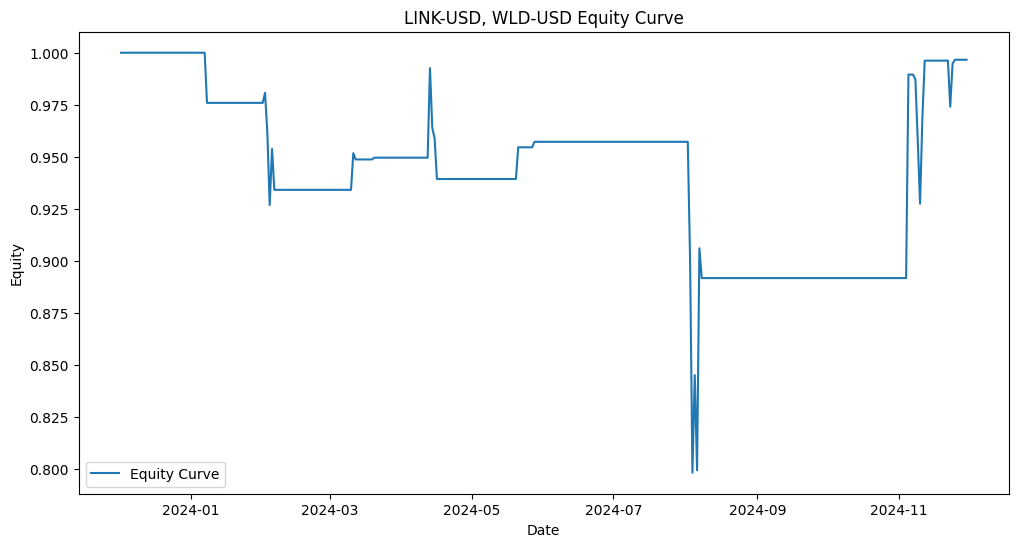

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

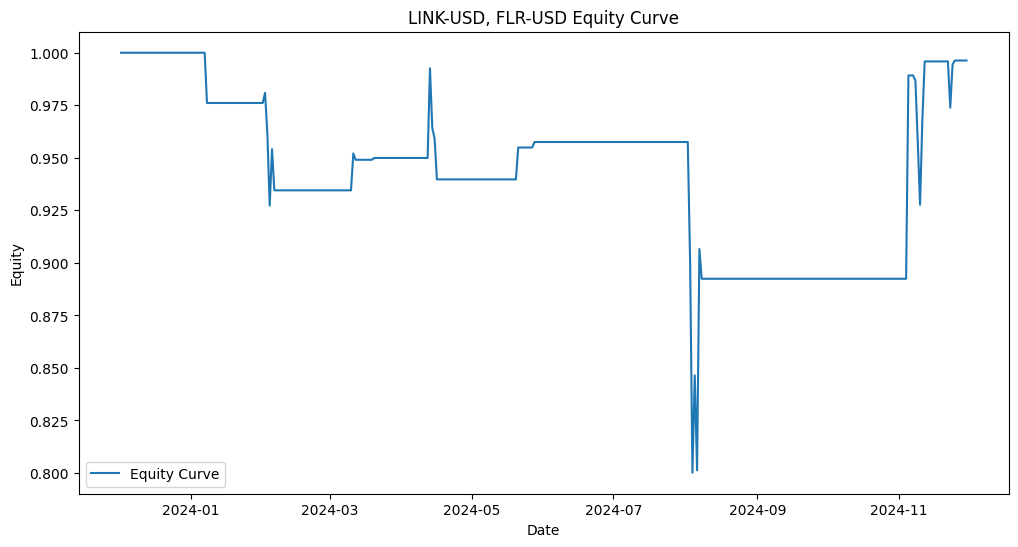

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

KeyboardInterrupt: 

In [66]:
results = []
for crypto_1, crypto_2, coeffs, combined in combined_series:
    half_life = half_life_series[(crypto_1, crypto_2)]
    look_back = max(20, int(half_life))

    positions = simulate_trading_strategy(combined, look_back)
    equity_curve = plot_equity_curve(crypto_1, crypto_2, combined, positions)

    returns = combined.pct_change().shift(-1).fillna(0)
    strategy_returns = positions.shift(1) * returns
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    results.append({
        'crypto_pair': (crypto_1, crypto_2),
        'sharpe_ratio': sharpe_ratio,
        'equity_curve': equity_curve
    })

# Print the results
for result in results:
    crypto_pair = result['crypto_pair']
    sharpe_ratio = result['sharpe_ratio']
    print(f"Crypto Pair: {crypto_pair}, Sharpe Ratio: {sharpe_ratio}")


# Part 6 ()

Combination 1: Coefficients = [ 0.00371024  0.02944428 -0.07803077]
Combination 2: Coefficients = [ 2.08956228e-05  7.87416982e+00 -8.97420599e-03]
Combination 3: Coefficients = [-3.27556605e-07  9.30913533e-01 -1.00920661e+00]


<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

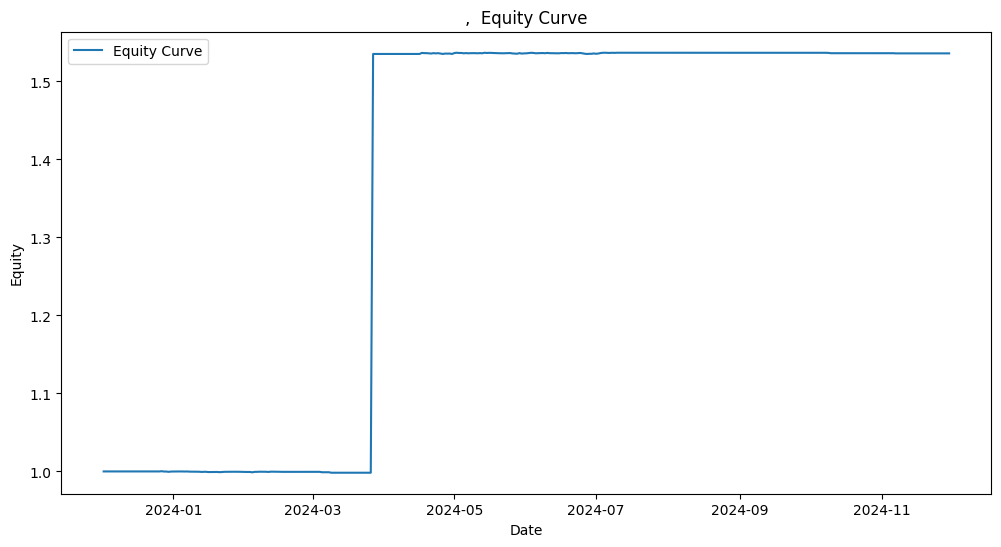

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

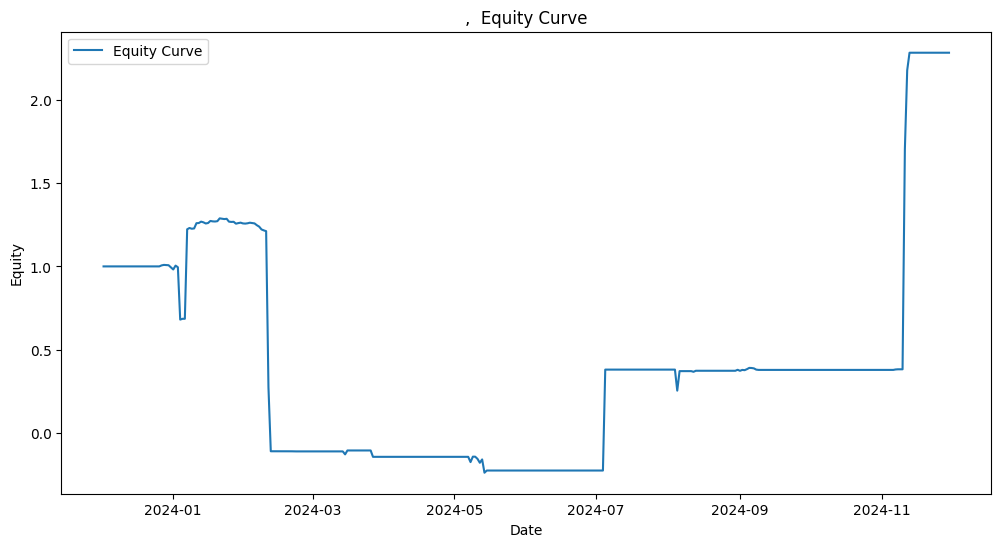

<ipython-input-62-76152d025d21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] > ema[i] + 2 * sd[i]:
<ipython-input-62-76152d025d21>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] > ema[i] + 3 * sd[i]:
<ipython-input-62-76152d025d21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif series[i] < ema[i] - 2 * sd[i]:
<ipython-input-62-76152d025d21>:13: FutureWarning: Series.__getitem__ treating keys

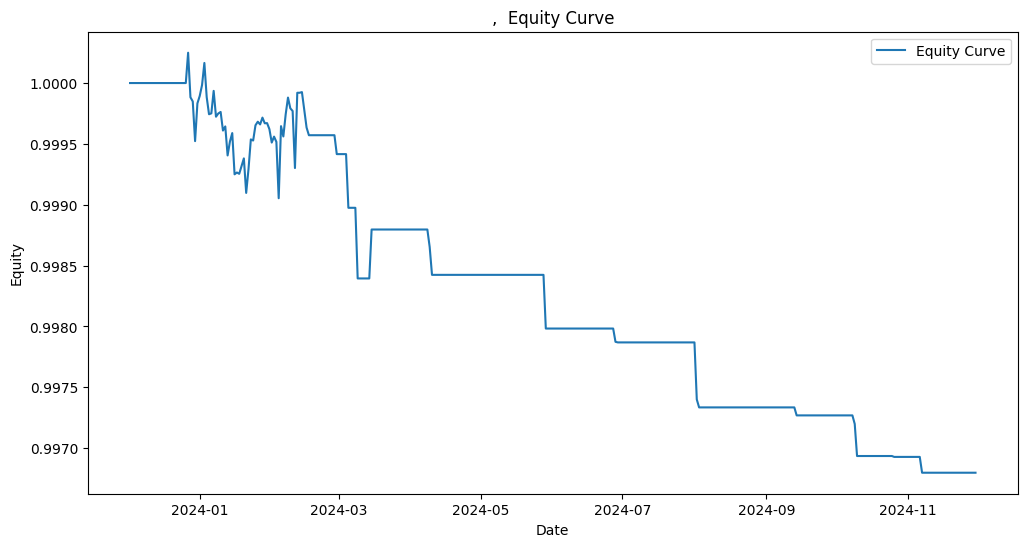

Series: Combination_1, Sharpe Ratio: 0.8291062392302229
Series: Combination_2, Sharpe Ratio: 0.08471459078158913
Series: Combination_3, Sharpe Ratio: -1.3938644921488605


In [69]:
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Function to perform Johansen test
def johansen_test(data, det_order=-1, k_ar_diff=1):
    result = coint_johansen(data, det_order, k_ar_diff)
    return result

# Identify three price series with the lowest Hurst Exponent
three_lowest_hurst_series = sorted(hurst_exponents_sorted, key=lambda x: x[1])[:3]

# Fetch the data for these series
three_series_data = crypto_data[[crypto for crypto, hurst in three_lowest_hurst_series]]

# Perform Johansen test to find cointegrated pairs
johansen_result = johansen_test(three_series_data)

# Report the coefficients
def report_coefficients(johansen_result):
    eigenvectors = johansen_result.evec
    for idx, coef in enumerate(eigenvectors.T):
        print(f"Combination {idx+1}: Coefficients = {coef}")

report_coefficients(johansen_result)

# Create new combined stationary series using the coefficients
combined_stationary_series = pd.DataFrame(index=three_series_data.index)
for idx, coef in enumerate(johansen_result.evec.T):
    combined_stationary_series[f'Combination_{idx+1}'] = (coef * three_series_data).sum(axis=1)

# Calculate Hurst Exponent for these new series and sort
hurst_exponents_combined = []
for col in combined_stationary_series.columns:
    series = combined_stationary_series[col].dropna()
    hurst_value = hurst_exponent(series)
    hurst_exponents_combined.append((col, hurst_value))

hurst_exponents_combined_sorted = sorted(hurst_exponents_combined, key=lambda x: x[1])

# Apply the trading strategy and calculate performance metrics
results_combined = []
for col, hurst_value in hurst_exponents_combined_sorted:
    series = combined_stationary_series[col].dropna()
    half_life = half_life_series.get(col, 20)  # Placeholder, assuming half_life_series is defined
    look_back = max(20, int(half_life))

    positions = simulate_trading_strategy(series, look_back)
    equity_curve = plot_equity_curve("", "", series, positions)

    returns = series.pct_change().shift(-1).fillna(0)
    strategy_returns = positions.shift(1) * returns
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    results_combined.append({
        'series': col,
        'sharpe_ratio': sharpe_ratio,
        'equity_curve': equity_curve
    })

# Print the results
for result in results_combined:
    series = result['series']
    sharpe_ratio = result['sharpe_ratio']
    print(f"Series: {series}, Sharpe Ratio: {sharpe_ratio}")
